In [1]:
# setup
import os
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# local utils
# !find . -name \*.pyc -delete
from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline


expName = 'cifar-MLP_v7.0'
batchSize = 100

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)

In [2]:
# setup and load CIFAR dataset
trainloader, testloader, classes = setup_cifar_data_mlp(batchSize)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Load pre-trained network
modelPath = './data/cifar-MLP_v6.3/cifar-MLP_v6.3-0/net-trained.dat'
num_filters = 1000

net = MLP(input_dim=3072, fc1_dim=num_filters, fc2_dim=100)
net.load_state_dict(torch.load(modelPath))
net

MLP (
  (fc1): Linear (3072 -> 1000)
  (fc2): Linear (1000 -> 100)
  (fc3): Linear (100 -> 10)
)

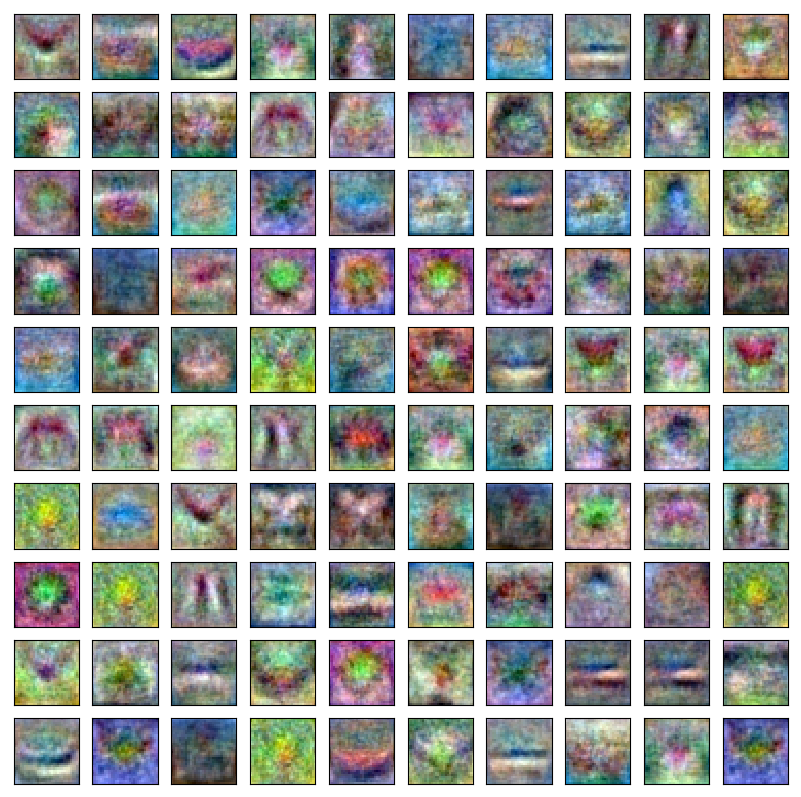

In [41]:
# Visualize 100 weights
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy() # filters
w.shape

f = vis_linear_weights(w)

In [4]:
p = next(net.parameters())
p.data.size()

torch.Size([1000, 3072])

In [5]:
params = net.parameters()
p1 = params.next() # layer 1 weights
print p1.data.size()
p2 = params.next() # layer 1 biases
print p2.data.size()

p3 = params.next() # layer 2 weights
print p3.data.size()


torch.Size([1000, 3072])
torch.Size([1000])
torch.Size([100, 1000])


In [6]:
# add a new column to layer 1 weights
sz = p1.data.size()
new_col = torch.ones(1, sz[1])
p1.data = torch.cat((p1.data, new_col),0)
print p1.data.size()


torch.Size([1001, 3072])


In [7]:
# add a bias term
p2.data = torch.cat((p2.data, torch.ones(1)), 0)
print p2.data.size()

torch.Size([1001])


In [8]:
# add new row to layer 2 weights
p3.data = torch.cat((p3.data, torch.ones(100,1)),1)
print p3.data.size()


torch.Size([100, 1001])


In [18]:
net.parameters().next().size()

torch.Size([1001, 3072])

In [3]:
# Train a MLP with dim-w1=50 to convergence


%run run_cifar_mlp.py cifar-ML_v7.0.1 \
--w1 50 \
--numEpochs 100 \
--doTrainPlot true 

0
1
Files already downloaded and verified
Files already downloaded and verified



  0%|          | 0/100 [00:00<?, ?it/s]

Resuming training from saved checkpoint.


epoch:  15 batch:    50 loss: 1.447 accu: 0.496 lr: 0.006177
epoch:  15 batch:   100 loss: 1.441 accu: 0.502 lr: 0.006177
epoch:  15 batch:   150 loss: 1.465 accu: 0.492 lr: 0.006177
epoch:  15 batch:   200 loss: 1.473 accu: 0.489 lr: 0.006177
epoch:  15 batch:   250 loss: 1.480 accu: 0.486 lr: 0.006177
epoch:  15 batch:   300 loss: 1.464 accu: 0.493 lr: 0.006177
epoch:  15 batch:   350 loss: 1.487 accu: 0.486 lr: 0.006177
epoch:  15 batch:   400 loss: 1.462 accu: 0.496 lr: 0.006177
epoch:  15 batch:   450 loss: 1.475 accu: 0.492 lr: 0.006177
epoch:  15 batch:   500 loss: 1.512 accu: 0.480 lr: 0.006177




 16%|█▌        | 16/100 [00:12<01:07,  1.25it/s]

epoch:  16 batch:    50 loss: 1.457 accu: 0.495 lr: 0.005559
epoch:  16 batch:   100 loss: 1.443 accu: 0.492 lr: 0.005559
epoch:  16 batch:   150 loss: 1.452 accu: 0.508 lr: 0.005559
epoch:  16 batch:   200 loss: 1.452 accu: 0.491 lr: 0.005559
epoch:  16 batch:   250 loss: 1.472 accu: 0.488 lr: 0.005559
epoch:  16 batch:   300 loss: 1.476 accu: 0.486 lr: 0.005559
epoch:  16 batch:   350 loss: 1.467 accu: 0.501 lr: 0.005559
epoch:  16 batch:   400 loss: 1.465 accu: 0.501 lr: 0.005559
epoch:  16 batch:   450 loss: 1.463 accu: 0.490 lr: 0.005559
epoch:  16 batch:   500 loss: 1.473 accu: 0.484 lr: 0.005559



 17%|█▋        | 17/100 [00:25<06:07,  4.43s/it]

epoch:  17 batch:    50 loss: 1.446 accu: 0.504 lr: 0.005003
epoch:  17 batch:   100 loss: 1.429 accu: 0.499 lr: 0.005003
epoch:  17 batch:   150 loss: 1.466 accu: 0.497 lr: 0.005003
epoch:  17 batch:   200 loss: 1.462 accu: 0.491 lr: 0.005003
epoch:  17 batch:   250 loss: 1.456 accu: 0.487 lr: 0.005003
epoch:  17 batch:   300 loss: 1.461 accu: 0.495 lr: 0.005003
epoch:  17 batch:   350 loss: 1.439 accu: 0.506 lr: 0.005003
epoch:  17 batch:   400 loss: 1.453 accu: 0.501 lr: 0.005003
epoch:  17 batch:   450 loss: 1.466 accu: 0.499 lr: 0.005003
epoch:  17 batch:   500 loss: 1.473 accu: 0.493 lr: 0.005003



 18%|█▊        | 18/100 [00:40<10:26,  7.64s/it]

epoch:  18 batch:    50 loss: 1.444 accu: 0.502 lr: 0.004503
epoch:  18 batch:   100 loss: 1.440 accu: 0.496 lr: 0.004503
epoch:  18 batch:   150 loss: 1.463 accu: 0.494 lr: 0.004503
epoch:  18 batch:   200 loss: 1.436 accu: 0.504 lr: 0.004503
epoch:  18 batch:   250 loss: 1.439 accu: 0.501 lr: 0.004503
epoch:  18 batch:   300 loss: 1.456 accu: 0.497 lr: 0.004503
epoch:  18 batch:   350 loss: 1.452 accu: 0.499 lr: 0.004503
epoch:  18 batch:   400 loss: 1.435 accu: 0.504 lr: 0.004503
epoch:  18 batch:   450 loss: 1.459 accu: 0.497 lr: 0.004503
epoch:  18 batch:   500 loss: 1.458 accu: 0.503 lr: 0.004503



 19%|█▉        | 19/100 [00:53<12:27,  9.23s/it]

epoch:  19 batch:    50 loss: 1.439 accu: 0.513 lr: 0.004053
epoch:  19 batch:   100 loss: 1.436 accu: 0.500 lr: 0.004053
epoch:  19 batch:   150 loss: 1.441 accu: 0.500 lr: 0.004053
epoch:  19 batch:   200 loss: 1.476 accu: 0.486 lr: 0.004053
epoch:  19 batch:   250 loss: 1.454 accu: 0.494 lr: 0.004053
epoch:  19 batch:   300 loss: 1.435 accu: 0.509 lr: 0.004053
epoch:  19 batch:   350 loss: 1.442 accu: 0.511 lr: 0.004053
epoch:  19 batch:   400 loss: 1.439 accu: 0.506 lr: 0.004053
epoch:  19 batch:   450 loss: 1.439 accu: 0.505 lr: 0.004053
epoch:  19 batch:   500 loss: 1.433 accu: 0.507 lr: 0.004053



 20%|██        | 20/100 [01:05<13:28, 10.10s/it]

epoch:  20 batch:    50 loss: 1.436 accu: 0.503 lr: 0.003647
epoch:  20 batch:   100 loss: 1.424 accu: 0.506 lr: 0.003647
epoch:  20 batch:   150 loss: 1.416 accu: 0.507 lr: 0.003647
epoch:  20 batch:   200 loss: 1.431 accu: 0.506 lr: 0.003647
epoch:  20 batch:   250 loss: 1.411 accu: 0.517 lr: 0.003647
epoch:  20 batch:   300 loss: 1.437 accu: 0.506 lr: 0.003647
epoch:  20 batch:   350 loss: 1.461 accu: 0.488 lr: 0.003647
epoch:  20 batch:   400 loss: 1.434 accu: 0.506 lr: 0.003647
epoch:  20 batch:   450 loss: 1.453 accu: 0.492 lr: 0.003647
epoch:  20 batch:   500 loss: 1.449 accu: 0.501 lr: 0.003647



 21%|██        | 21/100 [01:21<15:25, 11.71s/it]

epoch:  21 batch:    50 loss: 1.446 accu: 0.503 lr: 0.003283
epoch:  21 batch:   100 loss: 1.416 accu: 0.510 lr: 0.003283
epoch:  21 batch:   150 loss: 1.414 accu: 0.518 lr: 0.003283
epoch:  21 batch:   200 loss: 1.437 accu: 0.499 lr: 0.003283
epoch:  21 batch:   250 loss: 1.425 accu: 0.500 lr: 0.003283
epoch:  21 batch:   300 loss: 1.433 accu: 0.506 lr: 0.003283
epoch:  21 batch:   350 loss: 1.451 accu: 0.488 lr: 0.003283
epoch:  21 batch:   400 loss: 1.421 accu: 0.507 lr: 0.003283
epoch:  21 batch:   450 loss: 1.420 accu: 0.514 lr: 0.003283
epoch:  21 batch:   500 loss: 1.431 accu: 0.503 lr: 0.003283



 22%|██▏       | 22/100 [01:36<16:25, 12.63s/it]

epoch:  22 batch:    50 loss: 1.429 accu: 0.501 lr: 0.002954
epoch:  22 batch:   100 loss: 1.390 accu: 0.514 lr: 0.002954
epoch:  22 batch:   150 loss: 1.407 accu: 0.510 lr: 0.002954
epoch:  22 batch:   200 loss: 1.426 accu: 0.504 lr: 0.002954
epoch:  22 batch:   250 loss: 1.434 accu: 0.502 lr: 0.002954
epoch:  22 batch:   300 loss: 1.433 accu: 0.512 lr: 0.002954
epoch:  22 batch:   350 loss: 1.409 accu: 0.518 lr: 0.002954
epoch:  22 batch:   400 loss: 1.429 accu: 0.519 lr: 0.002954
epoch:  22 batch:   450 loss: 1.437 accu: 0.502 lr: 0.002954
epoch:  22 batch:   500 loss: 1.428 accu: 0.508 lr: 0.002954



 23%|██▎       | 23/100 [01:49<16:36, 12.95s/it]

epoch:  23 batch:    50 loss: 1.420 accu: 0.506 lr: 0.002659
epoch:  23 batch:   100 loss: 1.420 accu: 0.503 lr: 0.002659
epoch:  23 batch:   150 loss: 1.400 accu: 0.516 lr: 0.002659
epoch:  23 batch:   200 loss: 1.408 accu: 0.524 lr: 0.002659
epoch:  23 batch:   250 loss: 1.417 accu: 0.509 lr: 0.002659
epoch:  23 batch:   300 loss: 1.424 accu: 0.510 lr: 0.002659
epoch:  23 batch:   350 loss: 1.434 accu: 0.496 lr: 0.002659
epoch:  23 batch:   400 loss: 1.409 accu: 0.516 lr: 0.002659
epoch:  23 batch:   450 loss: 1.425 accu: 0.509 lr: 0.002659
epoch:  23 batch:   500 loss: 1.430 accu: 0.497 lr: 0.002659



 24%|██▍       | 24/100 [02:02<16:27, 12.99s/it]

epoch:  24 batch:    50 loss: 1.381 accu: 0.525 lr: 0.002393
epoch:  24 batch:   100 loss: 1.396 accu: 0.513 lr: 0.002393
epoch:  24 batch:   150 loss: 1.393 accu: 0.518 lr: 0.002393
epoch:  24 batch:   200 loss: 1.420 accu: 0.510 lr: 0.002393
epoch:  24 batch:   250 loss: 1.414 accu: 0.513 lr: 0.002393
epoch:  24 batch:   300 loss: 1.436 accu: 0.506 lr: 0.002393
epoch:  24 batch:   350 loss: 1.404 accu: 0.522 lr: 0.002393
epoch:  24 batch:   400 loss: 1.442 accu: 0.496 lr: 0.002393
epoch:  24 batch:   450 loss: 1.435 accu: 0.498 lr: 0.002393
epoch:  24 batch:   500 loss: 1.411 accu: 0.515 lr: 0.002393



 25%|██▌       | 25/100 [02:17<16:58, 13.58s/it]

epoch:  25 batch:    50 loss: 1.415 accu: 0.516 lr: 0.002154
epoch:  25 batch:   100 loss: 1.417 accu: 0.506 lr: 0.002154
epoch:  25 batch:   150 loss: 1.425 accu: 0.504 lr: 0.002154
epoch:  25 batch:   200 loss: 1.419 accu: 0.505 lr: 0.002154
epoch:  25 batch:   250 loss: 1.396 accu: 0.521 lr: 0.002154
epoch:  25 batch:   300 loss: 1.421 accu: 0.515 lr: 0.002154
epoch:  25 batch:   350 loss: 1.417 accu: 0.516 lr: 0.002154
epoch:  25 batch:   400 loss: 1.398 accu: 0.518 lr: 0.002154
epoch:  25 batch:   450 loss: 1.385 accu: 0.510 lr: 0.002154
epoch:  25 batch:   500 loss: 1.396 accu: 0.518 lr: 0.002154



 26%|██▌       | 26/100 [02:31<16:41, 13.54s/it]

epoch:  26 batch:    50 loss: 1.389 accu: 0.516 lr: 0.001938
epoch:  26 batch:   100 loss: 1.374 accu: 0.523 lr: 0.001938
epoch:  26 batch:   150 loss: 1.401 accu: 0.522 lr: 0.001938
epoch:  26 batch:   200 loss: 1.422 accu: 0.505 lr: 0.001938
epoch:  26 batch:   250 loss: 1.409 accu: 0.518 lr: 0.001938
epoch:  26 batch:   300 loss: 1.400 accu: 0.521 lr: 0.001938
epoch:  26 batch:   350 loss: 1.407 accu: 0.520 lr: 0.001938
epoch:  26 batch:   400 loss: 1.401 accu: 0.510 lr: 0.001938
epoch:  26 batch:   450 loss: 1.422 accu: 0.505 lr: 0.001938
epoch:  26 batch:   500 loss: 1.416 accu: 0.511 lr: 0.001938



 27%|██▋       | 27/100 [02:44<16:13, 13.34s/it]

epoch:  27 batch:    50 loss: 1.392 accu: 0.516 lr: 0.001744
epoch:  27 batch:   100 loss: 1.385 accu: 0.516 lr: 0.001744
epoch:  27 batch:   150 loss: 1.402 accu: 0.507 lr: 0.001744
epoch:  27 batch:   200 loss: 1.426 accu: 0.517 lr: 0.001744
epoch:  27 batch:   250 loss: 1.409 accu: 0.519 lr: 0.001744
epoch:  27 batch:   300 loss: 1.399 accu: 0.524 lr: 0.001744
epoch:  27 batch:   350 loss: 1.393 accu: 0.515 lr: 0.001744
epoch:  27 batch:   400 loss: 1.399 accu: 0.517 lr: 0.001744
epoch:  27 batch:   450 loss: 1.401 accu: 0.514 lr: 0.001744
epoch:  27 batch:   500 loss: 1.406 accu: 0.513 lr: 0.001744



 28%|██▊       | 28/100 [02:58<16:12, 13.51s/it]

epoch:  28 batch:    50 loss: 1.369 accu: 0.530 lr: 0.001570
epoch:  28 batch:   100 loss: 1.402 accu: 0.512 lr: 0.001570
epoch:  28 batch:   150 loss: 1.395 accu: 0.521 lr: 0.001570
epoch:  28 batch:   200 loss: 1.403 accu: 0.517 lr: 0.001570
epoch:  28 batch:   250 loss: 1.397 accu: 0.525 lr: 0.001570
epoch:  28 batch:   300 loss: 1.403 accu: 0.517 lr: 0.001570
epoch:  28 batch:   350 loss: 1.383 accu: 0.524 lr: 0.001570
epoch:  28 batch:   400 loss: 1.410 accu: 0.509 lr: 0.001570
epoch:  28 batch:   450 loss: 1.390 accu: 0.513 lr: 0.001570
epoch:  28 batch:   500 loss: 1.418 accu: 0.510 lr: 0.001570



 29%|██▉       | 29/100 [03:10<15:43, 13.29s/it]

epoch:  29 batch:    50 loss: 1.390 accu: 0.519 lr: 0.001413
epoch:  29 batch:   100 loss: 1.377 accu: 0.531 lr: 0.001413
epoch:  29 batch:   150 loss: 1.352 accu: 0.527 lr: 0.001413
epoch:  29 batch:   200 loss: 1.380 accu: 0.519 lr: 0.001413
epoch:  29 batch:   250 loss: 1.393 accu: 0.516 lr: 0.001413
epoch:  29 batch:   300 loss: 1.404 accu: 0.519 lr: 0.001413
epoch:  29 batch:   350 loss: 1.408 accu: 0.506 lr: 0.001413
epoch:  29 batch:   400 loss: 1.392 accu: 0.520 lr: 0.001413
epoch:  29 batch:   450 loss: 1.408 accu: 0.516 lr: 0.001413
epoch:  29 batch:   500 loss: 1.427 accu: 0.499 lr: 0.001413



 30%|███       | 30/100 [03:23<15:19, 13.14s/it]

epoch:  30 batch:    50 loss: 1.380 accu: 0.531 lr: 0.001272
epoch:  30 batch:   100 loss: 1.378 accu: 0.522 lr: 0.001272
epoch:  30 batch:   150 loss: 1.401 accu: 0.517 lr: 0.001272
epoch:  30 batch:   200 loss: 1.379 accu: 0.529 lr: 0.001272
epoch:  30 batch:   250 loss: 1.405 accu: 0.519 lr: 0.001272
epoch:  30 batch:   300 loss: 1.392 accu: 0.519 lr: 0.001272
epoch:  30 batch:   350 loss: 1.395 accu: 0.517 lr: 0.001272
epoch:  30 batch:   400 loss: 1.400 accu: 0.512 lr: 0.001272
epoch:  30 batch:   450 loss: 1.385 accu: 0.523 lr: 0.001272
epoch:  30 batch:   500 loss: 1.401 accu: 0.509 lr: 0.001272



 31%|███       | 31/100 [03:38<15:37, 13.59s/it]

epoch:  31 batch:    50 loss: 1.366 accu: 0.532 lr: 0.001145
epoch:  31 batch:   100 loss: 1.388 accu: 0.521 lr: 0.001145
epoch:  31 batch:   150 loss: 1.393 accu: 0.526 lr: 0.001145
epoch:  31 batch:   200 loss: 1.375 accu: 0.516 lr: 0.001145
epoch:  31 batch:   250 loss: 1.384 accu: 0.520 lr: 0.001145
epoch:  31 batch:   300 loss: 1.393 accu: 0.520 lr: 0.001145
epoch:  31 batch:   350 loss: 1.400 accu: 0.513 lr: 0.001145
epoch:  31 batch:   400 loss: 1.398 accu: 0.517 lr: 0.001145
epoch:  31 batch:   450 loss: 1.397 accu: 0.515 lr: 0.001145
epoch:  31 batch:   500 loss: 1.385 accu: 0.523 lr: 0.001145



 32%|███▏      | 32/100 [03:53<16:02, 14.15s/it]

epoch:  32 batch:    50 loss: 1.365 accu: 0.522 lr: 0.001030
epoch:  32 batch:   100 loss: 1.380 accu: 0.527 lr: 0.001030
epoch:  32 batch:   150 loss: 1.361 accu: 0.529 lr: 0.001030
epoch:  32 batch:   200 loss: 1.393 accu: 0.524 lr: 0.001030
epoch:  32 batch:   250 loss: 1.379 accu: 0.522 lr: 0.001030
epoch:  32 batch:   300 loss: 1.396 accu: 0.517 lr: 0.001030
epoch:  32 batch:   350 loss: 1.398 accu: 0.515 lr: 0.001030
epoch:  32 batch:   400 loss: 1.388 accu: 0.514 lr: 0.001030
epoch:  32 batch:   450 loss: 1.391 accu: 0.519 lr: 0.001030
epoch:  32 batch:   500 loss: 1.393 accu: 0.520 lr: 0.001030



 33%|███▎      | 33/100 [04:08<16:00, 14.34s/it]

epoch:  33 batch:    50 loss: 1.378 accu: 0.528 lr: 0.000927
epoch:  33 batch:   100 loss: 1.383 accu: 0.514 lr: 0.000927
epoch:  33 batch:   150 loss: 1.364 accu: 0.539 lr: 0.000927
epoch:  33 batch:   200 loss: 1.387 accu: 0.514 lr: 0.000927
epoch:  33 batch:   250 loss: 1.382 accu: 0.527 lr: 0.000927
epoch:  33 batch:   300 loss: 1.384 accu: 0.527 lr: 0.000927
epoch:  33 batch:   350 loss: 1.383 accu: 0.526 lr: 0.000927
epoch:  33 batch:   400 loss: 1.393 accu: 0.521 lr: 0.000927
epoch:  33 batch:   450 loss: 1.383 accu: 0.520 lr: 0.000927
epoch:  33 batch:   500 loss: 1.391 accu: 0.517 lr: 0.000927



 34%|███▍      | 34/100 [04:22<15:34, 14.16s/it]

epoch:  34 batch:    50 loss: 1.367 accu: 0.529 lr: 0.000834
epoch:  34 batch:   100 loss: 1.398 accu: 0.517 lr: 0.000834
epoch:  34 batch:   150 loss: 1.361 accu: 0.531 lr: 0.000834
epoch:  34 batch:   200 loss: 1.397 accu: 0.519 lr: 0.000834
epoch:  34 batch:   250 loss: 1.376 accu: 0.521 lr: 0.000834
epoch:  34 batch:   300 loss: 1.383 accu: 0.519 lr: 0.000834
epoch:  34 batch:   350 loss: 1.367 accu: 0.529 lr: 0.000834
epoch:  34 batch:   400 loss: 1.388 accu: 0.519 lr: 0.000834
epoch:  34 batch:   450 loss: 1.392 accu: 0.521 lr: 0.000834
epoch:  34 batch:   500 loss: 1.376 accu: 0.523 lr: 0.000834



 35%|███▌      | 35/100 [04:36<15:26, 14.25s/it]

epoch:  35 batch:    50 loss: 1.371 accu: 0.529 lr: 0.000751
epoch:  35 batch:   100 loss: 1.372 accu: 0.527 lr: 0.000751
epoch:  35 batch:   150 loss: 1.357 accu: 0.539 lr: 0.000751
epoch:  35 batch:   200 loss: 1.379 accu: 0.521 lr: 0.000751
epoch:  35 batch:   250 loss: 1.369 accu: 0.527 lr: 0.000751
epoch:  35 batch:   300 loss: 1.359 accu: 0.522 lr: 0.000751
epoch:  35 batch:   350 loss: 1.387 accu: 0.515 lr: 0.000751
epoch:  35 batch:   400 loss: 1.405 accu: 0.510 lr: 0.000751
epoch:  35 batch:   450 loss: 1.394 accu: 0.521 lr: 0.000751
epoch:  35 batch:   500 loss: 1.386 accu: 0.523 lr: 0.000751



 36%|███▌      | 36/100 [04:49<14:44, 13.83s/it]

epoch:  36 batch:    50 loss: 1.374 accu: 0.523 lr: 0.000676
epoch:  36 batch:   100 loss: 1.377 accu: 0.522 lr: 0.000676
epoch:  36 batch:   150 loss: 1.349 accu: 0.533 lr: 0.000676
epoch:  36 batch:   200 loss: 1.378 accu: 0.529 lr: 0.000676
epoch:  36 batch:   250 loss: 1.368 accu: 0.526 lr: 0.000676
epoch:  36 batch:   300 loss: 1.379 accu: 0.516 lr: 0.000676
epoch:  36 batch:   350 loss: 1.376 accu: 0.523 lr: 0.000676
epoch:  36 batch:   400 loss: 1.377 accu: 0.530 lr: 0.000676
epoch:  36 batch:   450 loss: 1.391 accu: 0.516 lr: 0.000676
epoch:  36 batch:   500 loss: 1.397 accu: 0.521 lr: 0.000676



 37%|███▋      | 37/100 [05:04<14:48, 14.10s/it]

epoch:  37 batch:    50 loss: 1.369 accu: 0.535 lr: 0.000608
epoch:  37 batch:   100 loss: 1.351 accu: 0.539 lr: 0.000608
epoch:  37 batch:   150 loss: 1.391 accu: 0.519 lr: 0.000608
epoch:  37 batch:   200 loss: 1.373 accu: 0.534 lr: 0.000608
epoch:  37 batch:   250 loss: 1.370 accu: 0.519 lr: 0.000608
epoch:  37 batch:   300 loss: 1.377 accu: 0.517 lr: 0.000608
epoch:  37 batch:   350 loss: 1.382 accu: 0.525 lr: 0.000608
epoch:  37 batch:   400 loss: 1.360 accu: 0.530 lr: 0.000608
epoch:  37 batch:   450 loss: 1.386 accu: 0.523 lr: 0.000608
epoch:  37 batch:   500 loss: 1.390 accu: 0.518 lr: 0.000608



 38%|███▊      | 38/100 [05:17<14:12, 13.76s/it]

epoch:  38 batch:    50 loss: 1.378 accu: 0.521 lr: 0.000547
epoch:  38 batch:   100 loss: 1.371 accu: 0.531 lr: 0.000547
epoch:  38 batch:   150 loss: 1.364 accu: 0.529 lr: 0.000547
epoch:  38 batch:   200 loss: 1.383 accu: 0.518 lr: 0.000547
epoch:  38 batch:   250 loss: 1.360 accu: 0.521 lr: 0.000547
epoch:  38 batch:   300 loss: 1.373 accu: 0.528 lr: 0.000547
epoch:  38 batch:   350 loss: 1.362 accu: 0.542 lr: 0.000547
epoch:  38 batch:   400 loss: 1.372 accu: 0.527 lr: 0.000547
epoch:  38 batch:   450 loss: 1.382 accu: 0.520 lr: 0.000547
epoch:  38 batch:   500 loss: 1.389 accu: 0.518 lr: 0.000547



 39%|███▉      | 39/100 [05:32<14:30, 14.27s/it]

epoch:  39 batch:    50 loss: 1.374 accu: 0.523 lr: 0.000493
epoch:  39 batch:   100 loss: 1.366 accu: 0.535 lr: 0.000493
epoch:  39 batch:   150 loss: 1.364 accu: 0.529 lr: 0.000493
epoch:  39 batch:   200 loss: 1.385 accu: 0.522 lr: 0.000493
epoch:  39 batch:   250 loss: 1.356 accu: 0.517 lr: 0.000493
epoch:  39 batch:   300 loss: 1.367 accu: 0.525 lr: 0.000493
epoch:  39 batch:   350 loss: 1.362 accu: 0.526 lr: 0.000493
epoch:  39 batch:   400 loss: 1.378 accu: 0.528 lr: 0.000493
epoch:  39 batch:   450 loss: 1.384 accu: 0.525 lr: 0.000493
epoch:  39 batch:   500 loss: 1.379 accu: 0.533 lr: 0.000493



 40%|████      | 40/100 [05:47<14:30, 14.51s/it]

epoch:  40 batch:    50 loss: 1.369 accu: 0.525 lr: 0.000443
epoch:  40 batch:   100 loss: 1.363 accu: 0.535 lr: 0.000443
epoch:  40 batch:   150 loss: 1.373 accu: 0.533 lr: 0.000443
epoch:  40 batch:   200 loss: 1.373 accu: 0.524 lr: 0.000443
epoch:  40 batch:   250 loss: 1.381 accu: 0.520 lr: 0.000443
epoch:  40 batch:   300 loss: 1.372 accu: 0.526 lr: 0.000443
epoch:  40 batch:   350 loss: 1.380 accu: 0.527 lr: 0.000443
epoch:  40 batch:   400 loss: 1.357 accu: 0.532 lr: 0.000443
epoch:  40 batch:   450 loss: 1.373 accu: 0.515 lr: 0.000443
epoch:  40 batch:   500 loss: 1.364 accu: 0.528 lr: 0.000443



 41%|████      | 41/100 [06:00<13:37, 13.86s/it]

epoch:  41 batch:    50 loss: 1.367 accu: 0.531 lr: 0.000399
epoch:  41 batch:   100 loss: 1.361 accu: 0.532 lr: 0.000399
epoch:  41 batch:   150 loss: 1.367 accu: 0.528 lr: 0.000399
epoch:  41 batch:   200 loss: 1.357 accu: 0.532 lr: 0.000399
epoch:  41 batch:   250 loss: 1.375 accu: 0.533 lr: 0.000399
epoch:  41 batch:   300 loss: 1.366 accu: 0.525 lr: 0.000399
epoch:  41 batch:   350 loss: 1.391 accu: 0.516 lr: 0.000399
epoch:  41 batch:   400 loss: 1.350 accu: 0.533 lr: 0.000399
epoch:  41 batch:   450 loss: 1.378 accu: 0.521 lr: 0.000399
epoch:  41 batch:   500 loss: 1.378 accu: 0.514 lr: 0.000399



 42%|████▏     | 42/100 [06:14<13:32, 14.02s/it]

epoch:  42 batch:    50 loss: 1.356 accu: 0.522 lr: 0.000359
epoch:  42 batch:   100 loss: 1.377 accu: 0.523 lr: 0.000359
epoch:  42 batch:   150 loss: 1.370 accu: 0.528 lr: 0.000359
epoch:  42 batch:   200 loss: 1.363 accu: 0.534 lr: 0.000359
epoch:  42 batch:   250 loss: 1.356 accu: 0.532 lr: 0.000359
epoch:  42 batch:   300 loss: 1.362 accu: 0.534 lr: 0.000359
epoch:  42 batch:   350 loss: 1.354 accu: 0.540 lr: 0.000359
epoch:  42 batch:   400 loss: 1.388 accu: 0.522 lr: 0.000359
epoch:  42 batch:   450 loss: 1.383 accu: 0.510 lr: 0.000359
epoch:  42 batch:   500 loss: 1.373 accu: 0.525 lr: 0.000359



 43%|████▎     | 43/100 [06:28<13:17, 13.98s/it]

epoch:  43 batch:    50 loss: 1.372 accu: 0.533 lr: 0.000323
epoch:  43 batch:   100 loss: 1.375 accu: 0.522 lr: 0.000323
epoch:  43 batch:   150 loss: 1.356 accu: 0.532 lr: 0.000323
epoch:  43 batch:   200 loss: 1.368 accu: 0.518 lr: 0.000323
epoch:  43 batch:   250 loss: 1.344 accu: 0.539 lr: 0.000323
epoch:  43 batch:   300 loss: 1.390 accu: 0.520 lr: 0.000323
epoch:  43 batch:   350 loss: 1.373 accu: 0.527 lr: 0.000323
epoch:  43 batch:   400 loss: 1.381 accu: 0.525 lr: 0.000323
epoch:  43 batch:   450 loss: 1.350 accu: 0.529 lr: 0.000323
epoch:  43 batch:   500 loss: 1.363 accu: 0.527 lr: 0.000323



 44%|████▍     | 44/100 [06:43<13:15, 14.21s/it]

epoch:  44 batch:    50 loss: 1.378 accu: 0.523 lr: 0.000291
epoch:  44 batch:   100 loss: 1.370 accu: 0.525 lr: 0.000291
epoch:  44 batch:   150 loss: 1.360 accu: 0.529 lr: 0.000291
epoch:  44 batch:   200 loss: 1.358 accu: 0.521 lr: 0.000291
epoch:  44 batch:   250 loss: 1.364 accu: 0.535 lr: 0.000291
epoch:  44 batch:   300 loss: 1.357 accu: 0.533 lr: 0.000291
epoch:  44 batch:   350 loss: 1.359 accu: 0.528 lr: 0.000291
epoch:  44 batch:   400 loss: 1.375 accu: 0.532 lr: 0.000291
epoch:  44 batch:   450 loss: 1.370 accu: 0.526 lr: 0.000291
epoch:  44 batch:   500 loss: 1.372 accu: 0.532 lr: 0.000291



 45%|████▌     | 45/100 [06:56<12:44, 13.90s/it]

epoch:  45 batch:    50 loss: 1.364 accu: 0.533 lr: 0.000262
epoch:  45 batch:   100 loss: 1.367 accu: 0.531 lr: 0.000262
epoch:  45 batch:   150 loss: 1.386 accu: 0.518 lr: 0.000262
epoch:  45 batch:   200 loss: 1.352 accu: 0.538 lr: 0.000262
epoch:  45 batch:   250 loss: 1.346 accu: 0.544 lr: 0.000262
epoch:  45 batch:   300 loss: 1.378 accu: 0.517 lr: 0.000262
epoch:  45 batch:   350 loss: 1.341 accu: 0.535 lr: 0.000262
epoch:  45 batch:   400 loss: 1.392 accu: 0.515 lr: 0.000262
epoch:  45 batch:   450 loss: 1.360 accu: 0.533 lr: 0.000262
epoch:  45 batch:   500 loss: 1.370 accu: 0.519 lr: 0.000262



 46%|████▌     | 46/100 [07:10<12:27, 13.84s/it]

epoch:  46 batch:    50 loss: 1.371 accu: 0.525 lr: 0.000236
epoch:  46 batch:   100 loss: 1.361 accu: 0.536 lr: 0.000236
epoch:  46 batch:   150 loss: 1.374 accu: 0.520 lr: 0.000236
epoch:  46 batch:   200 loss: 1.359 accu: 0.523 lr: 0.000236
epoch:  46 batch:   250 loss: 1.352 accu: 0.539 lr: 0.000236
epoch:  46 batch:   300 loss: 1.349 accu: 0.536 lr: 0.000236
epoch:  46 batch:   350 loss: 1.369 accu: 0.532 lr: 0.000236
epoch:  46 batch:   400 loss: 1.364 accu: 0.528 lr: 0.000236
epoch:  46 batch:   450 loss: 1.375 accu: 0.519 lr: 0.000236
epoch:  46 batch:   500 loss: 1.372 accu: 0.529 lr: 0.000236



 47%|████▋     | 47/100 [07:23<12:04, 13.68s/it]

epoch:  47 batch:    50 loss: 1.354 accu: 0.538 lr: 0.000212
epoch:  47 batch:   100 loss: 1.367 accu: 0.525 lr: 0.000212
epoch:  47 batch:   150 loss: 1.363 accu: 0.530 lr: 0.000212
epoch:  47 batch:   200 loss: 1.390 accu: 0.517 lr: 0.000212
epoch:  47 batch:   250 loss: 1.363 accu: 0.527 lr: 0.000212
epoch:  47 batch:   300 loss: 1.371 accu: 0.527 lr: 0.000212
epoch:  47 batch:   350 loss: 1.361 accu: 0.537 lr: 0.000212
epoch:  47 batch:   400 loss: 1.367 accu: 0.527 lr: 0.000212
epoch:  47 batch:   450 loss: 1.346 accu: 0.533 lr: 0.000212
epoch:  47 batch:   500 loss: 1.357 accu: 0.529 lr: 0.000212



 48%|████▊     | 48/100 [07:36<11:41, 13.48s/it]

epoch:  48 batch:    50 loss: 1.350 accu: 0.537 lr: 0.000191
epoch:  48 batch:   100 loss: 1.363 accu: 0.532 lr: 0.000191
epoch:  48 batch:   150 loss: 1.354 accu: 0.538 lr: 0.000191
epoch:  48 batch:   200 loss: 1.361 accu: 0.532 lr: 0.000191
epoch:  48 batch:   250 loss: 1.388 accu: 0.527 lr: 0.000191
epoch:  48 batch:   300 loss: 1.353 accu: 0.526 lr: 0.000191
epoch:  48 batch:   350 loss: 1.371 accu: 0.524 lr: 0.000191
epoch:  48 batch:   400 loss: 1.376 accu: 0.517 lr: 0.000191
epoch:  48 batch:   450 loss: 1.359 accu: 0.525 lr: 0.000191
epoch:  48 batch:   500 loss: 1.359 accu: 0.527 lr: 0.000191



 49%|████▉     | 49/100 [07:50<11:31, 13.55s/it]

epoch:  49 batch:    50 loss: 1.345 accu: 0.529 lr: 0.000172
epoch:  49 batch:   100 loss: 1.366 accu: 0.521 lr: 0.000172
epoch:  49 batch:   150 loss: 1.347 accu: 0.531 lr: 0.000172
epoch:  49 batch:   200 loss: 1.361 accu: 0.532 lr: 0.000172
epoch:  49 batch:   250 loss: 1.352 accu: 0.537 lr: 0.000172
epoch:  49 batch:   300 loss: 1.370 accu: 0.537 lr: 0.000172
epoch:  49 batch:   350 loss: 1.369 accu: 0.529 lr: 0.000172
epoch:  49 batch:   400 loss: 1.369 accu: 0.527 lr: 0.000172
epoch:  49 batch:   450 loss: 1.383 accu: 0.524 lr: 0.000172
epoch:  49 batch:   500 loss: 1.366 accu: 0.527 lr: 0.000172



 50%|█████     | 50/100 [08:03<11:09, 13.39s/it]

epoch:  50 batch:    50 loss: 1.350 accu: 0.544 lr: 0.000155
epoch:  50 batch:   100 loss: 1.379 accu: 0.518 lr: 0.000155
epoch:  50 batch:   150 loss: 1.344 accu: 0.541 lr: 0.000155
epoch:  50 batch:   200 loss: 1.372 accu: 0.524 lr: 0.000155
epoch:  50 batch:   250 loss: 1.369 accu: 0.525 lr: 0.000155
epoch:  50 batch:   300 loss: 1.359 accu: 0.531 lr: 0.000155
epoch:  50 batch:   350 loss: 1.363 accu: 0.523 lr: 0.000155
epoch:  50 batch:   400 loss: 1.376 accu: 0.524 lr: 0.000155
epoch:  50 batch:   450 loss: 1.353 accu: 0.536 lr: 0.000155
epoch:  50 batch:   500 loss: 1.359 accu: 0.530 lr: 0.000155



 51%|█████     | 51/100 [08:18<11:18, 13.84s/it]

epoch:  51 batch:    50 loss: 1.363 accu: 0.521 lr: 0.000139
epoch:  51 batch:   100 loss: 1.356 accu: 0.538 lr: 0.000139
epoch:  51 batch:   150 loss: 1.371 accu: 0.529 lr: 0.000139
epoch:  51 batch:   200 loss: 1.355 accu: 0.536 lr: 0.000139
epoch:  51 batch:   250 loss: 1.381 accu: 0.520 lr: 0.000139
epoch:  51 batch:   300 loss: 1.349 accu: 0.530 lr: 0.000139
epoch:  51 batch:   350 loss: 1.355 accu: 0.531 lr: 0.000139
epoch:  51 batch:   400 loss: 1.347 accu: 0.535 lr: 0.000139
epoch:  51 batch:   450 loss: 1.382 accu: 0.522 lr: 0.000139
epoch:  51 batch:   500 loss: 1.360 accu: 0.537 lr: 0.000139



 52%|█████▏    | 52/100 [08:30<10:49, 13.53s/it]

epoch:  52 batch:    50 loss: 1.364 accu: 0.534 lr: 0.000125
epoch:  52 batch:   100 loss: 1.367 accu: 0.525 lr: 0.000125
epoch:  52 batch:   150 loss: 1.344 accu: 0.533 lr: 0.000125
epoch:  52 batch:   200 loss: 1.359 accu: 0.529 lr: 0.000125
epoch:  52 batch:   250 loss: 1.364 accu: 0.537 lr: 0.000125
epoch:  52 batch:   300 loss: 1.383 accu: 0.524 lr: 0.000125
epoch:  52 batch:   350 loss: 1.362 accu: 0.510 lr: 0.000125
epoch:  52 batch:   400 loss: 1.351 accu: 0.536 lr: 0.000125
epoch:  52 batch:   450 loss: 1.365 accu: 0.529 lr: 0.000125
epoch:  52 batch:   500 loss: 1.354 accu: 0.539 lr: 0.000125



 53%|█████▎    | 53/100 [08:44<10:34, 13.49s/it]

epoch:  53 batch:    50 loss: 1.382 accu: 0.527 lr: 0.000113
epoch:  53 batch:   100 loss: 1.374 accu: 0.520 lr: 0.000113
epoch:  53 batch:   150 loss: 1.364 accu: 0.531 lr: 0.000113
epoch:  53 batch:   200 loss: 1.380 accu: 0.535 lr: 0.000113
epoch:  53 batch:   250 loss: 1.342 accu: 0.533 lr: 0.000113
epoch:  53 batch:   300 loss: 1.359 accu: 0.525 lr: 0.000113
epoch:  53 batch:   350 loss: 1.335 accu: 0.538 lr: 0.000113
epoch:  53 batch:   400 loss: 1.351 accu: 0.524 lr: 0.000113
epoch:  53 batch:   450 loss: 1.370 accu: 0.525 lr: 0.000113
epoch:  53 batch:   500 loss: 1.353 accu: 0.535 lr: 0.000113



 54%|█████▍    | 54/100 [08:58<10:25, 13.61s/it]

epoch:  54 batch:    50 loss: 1.356 accu: 0.532 lr: 0.000101
epoch:  54 batch:   100 loss: 1.365 accu: 0.524 lr: 0.000101
epoch:  54 batch:   150 loss: 1.347 accu: 0.533 lr: 0.000101
epoch:  54 batch:   200 loss: 1.366 accu: 0.527 lr: 0.000101
epoch:  54 batch:   250 loss: 1.357 accu: 0.532 lr: 0.000101
epoch:  54 batch:   300 loss: 1.364 accu: 0.528 lr: 0.000101
epoch:  54 batch:   350 loss: 1.368 accu: 0.533 lr: 0.000101
epoch:  54 batch:   400 loss: 1.355 accu: 0.530 lr: 0.000101
epoch:  54 batch:   450 loss: 1.353 accu: 0.536 lr: 0.000101
epoch:  54 batch:   500 loss: 1.377 accu: 0.525 lr: 0.000101



 55%|█████▌    | 55/100 [09:10<10:00, 13.33s/it]

epoch:  55 batch:    50 loss: 1.360 accu: 0.532 lr: 0.000091
epoch:  55 batch:   100 loss: 1.358 accu: 0.525 lr: 0.000091
epoch:  55 batch:   150 loss: 1.341 accu: 0.541 lr: 0.000091
epoch:  55 batch:   200 loss: 1.370 accu: 0.527 lr: 0.000091
epoch:  55 batch:   250 loss: 1.366 accu: 0.528 lr: 0.000091
epoch:  55 batch:   300 loss: 1.359 accu: 0.538 lr: 0.000091
epoch:  55 batch:   350 loss: 1.375 accu: 0.531 lr: 0.000091
epoch:  55 batch:   400 loss: 1.377 accu: 0.518 lr: 0.000091
epoch:  55 batch:   450 loss: 1.349 accu: 0.526 lr: 0.000091
epoch:  55 batch:   500 loss: 1.349 accu: 0.532 lr: 0.000091



 56%|█████▌    | 56/100 [09:26<10:11, 13.90s/it]

epoch:  56 batch:    50 loss: 1.378 accu: 0.523 lr: 0.000082
epoch:  56 batch:   100 loss: 1.376 accu: 0.532 lr: 0.000082
epoch:  56 batch:   150 loss: 1.344 accu: 0.539 lr: 0.000082
epoch:  56 batch:   200 loss: 1.362 accu: 0.532 lr: 0.000082
epoch:  56 batch:   250 loss: 1.353 accu: 0.540 lr: 0.000082
epoch:  56 batch:   300 loss: 1.351 accu: 0.539 lr: 0.000082
epoch:  56 batch:   350 loss: 1.375 accu: 0.518 lr: 0.000082
epoch:  56 batch:   400 loss: 1.362 accu: 0.518 lr: 0.000082
epoch:  56 batch:   450 loss: 1.349 accu: 0.530 lr: 0.000082
epoch:  56 batch:   500 loss: 1.350 accu: 0.536 lr: 0.000082



 57%|█████▋    | 57/100 [09:40<10:04, 14.06s/it]

epoch:  57 batch:    50 loss: 1.369 accu: 0.525 lr: 0.000074
epoch:  57 batch:   100 loss: 1.375 accu: 0.523 lr: 0.000074
epoch:  57 batch:   150 loss: 1.366 accu: 0.521 lr: 0.000074
epoch:  57 batch:   200 loss: 1.350 accu: 0.527 lr: 0.000074
epoch:  57 batch:   250 loss: 1.346 accu: 0.536 lr: 0.000074
epoch:  57 batch:   300 loss: 1.370 accu: 0.528 lr: 0.000074
epoch:  57 batch:   350 loss: 1.351 accu: 0.545 lr: 0.000074
epoch:  57 batch:   400 loss: 1.344 accu: 0.541 lr: 0.000074
epoch:  57 batch:   450 loss: 1.360 accu: 0.529 lr: 0.000074
epoch:  57 batch:   500 loss: 1.369 accu: 0.528 lr: 0.000074



 58%|█████▊    | 58/100 [09:54<09:53, 14.14s/it]

epoch:  58 batch:    50 loss: 1.372 accu: 0.528 lr: 0.000067
epoch:  58 batch:   100 loss: 1.365 accu: 0.525 lr: 0.000067
epoch:  58 batch:   150 loss: 1.343 accu: 0.540 lr: 0.000067
epoch:  58 batch:   200 loss: 1.360 accu: 0.534 lr: 0.000067
epoch:  58 batch:   250 loss: 1.370 accu: 0.527 lr: 0.000067
epoch:  58 batch:   300 loss: 1.353 accu: 0.529 lr: 0.000067
epoch:  58 batch:   350 loss: 1.355 accu: 0.535 lr: 0.000067
epoch:  58 batch:   400 loss: 1.348 accu: 0.532 lr: 0.000067
epoch:  58 batch:   450 loss: 1.363 accu: 0.526 lr: 0.000067
epoch:  58 batch:   500 loss: 1.366 accu: 0.527 lr: 0.000067



 59%|█████▉    | 59/100 [10:10<09:54, 14.50s/it]

epoch:  59 batch:    50 loss: 1.347 accu: 0.530 lr: 0.000060
epoch:  59 batch:   100 loss: 1.373 accu: 0.518 lr: 0.000060
epoch:  59 batch:   150 loss: 1.348 accu: 0.542 lr: 0.000060
epoch:  59 batch:   200 loss: 1.383 accu: 0.525 lr: 0.000060
epoch:  59 batch:   250 loss: 1.353 accu: 0.534 lr: 0.000060
epoch:  59 batch:   300 loss: 1.362 accu: 0.531 lr: 0.000060
epoch:  59 batch:   350 loss: 1.336 accu: 0.533 lr: 0.000060
epoch:  59 batch:   400 loss: 1.370 accu: 0.531 lr: 0.000060
epoch:  59 batch:   450 loss: 1.362 accu: 0.531 lr: 0.000060
epoch:  59 batch:   500 loss: 1.358 accu: 0.529 lr: 0.000060



 60%|██████    | 60/100 [10:22<09:19, 13.98s/it]

epoch:  60 batch:    50 loss: 1.362 accu: 0.523 lr: 0.000054
epoch:  60 batch:   100 loss: 1.373 accu: 0.524 lr: 0.000054
epoch:  60 batch:   150 loss: 1.362 accu: 0.527 lr: 0.000054
epoch:  60 batch:   200 loss: 1.358 accu: 0.535 lr: 0.000054
epoch:  60 batch:   250 loss: 1.351 accu: 0.540 lr: 0.000054
epoch:  60 batch:   300 loss: 1.348 accu: 0.527 lr: 0.000054
epoch:  60 batch:   350 loss: 1.347 accu: 0.538 lr: 0.000054
epoch:  60 batch:   400 loss: 1.366 accu: 0.534 lr: 0.000054
epoch:  60 batch:   450 loss: 1.367 accu: 0.524 lr: 0.000054
epoch:  60 batch:   500 loss: 1.357 accu: 0.539 lr: 0.000054



 61%|██████    | 61/100 [10:36<08:55, 13.73s/it]

epoch:  61 batch:    50 loss: 1.344 accu: 0.533 lr: 0.000049
epoch:  61 batch:   100 loss: 1.379 accu: 0.522 lr: 0.000049
epoch:  61 batch:   150 loss: 1.361 accu: 0.528 lr: 0.000049
epoch:  61 batch:   200 loss: 1.364 accu: 0.530 lr: 0.000049
epoch:  61 batch:   250 loss: 1.354 accu: 0.532 lr: 0.000049
epoch:  61 batch:   300 loss: 1.362 accu: 0.526 lr: 0.000049
epoch:  61 batch:   350 loss: 1.359 accu: 0.539 lr: 0.000049
epoch:  61 batch:   400 loss: 1.336 accu: 0.543 lr: 0.000049
epoch:  61 batch:   450 loss: 1.375 accu: 0.523 lr: 0.000049
epoch:  61 batch:   500 loss: 1.356 accu: 0.532 lr: 0.000049



 62%|██████▏   | 62/100 [10:50<08:52, 14.02s/it]

epoch:  62 batch:    50 loss: 1.358 accu: 0.533 lr: 0.000044
epoch:  62 batch:   100 loss: 1.355 accu: 0.538 lr: 0.000044
epoch:  62 batch:   150 loss: 1.340 accu: 0.541 lr: 0.000044
epoch:  62 batch:   200 loss: 1.354 accu: 0.532 lr: 0.000044
epoch:  62 batch:   250 loss: 1.362 accu: 0.529 lr: 0.000044
epoch:  62 batch:   300 loss: 1.356 accu: 0.530 lr: 0.000044
epoch:  62 batch:   350 loss: 1.365 accu: 0.532 lr: 0.000044
epoch:  62 batch:   400 loss: 1.369 accu: 0.516 lr: 0.000044
epoch:  62 batch:   450 loss: 1.355 accu: 0.535 lr: 0.000044
epoch:  62 batch:   500 loss: 1.374 accu: 0.522 lr: 0.000044



 63%|██████▎   | 63/100 [11:06<08:53, 14.41s/it]

epoch:  63 batch:    50 loss: 1.367 accu: 0.527 lr: 0.000039
epoch:  63 batch:   100 loss: 1.371 accu: 0.525 lr: 0.000039
epoch:  63 batch:   150 loss: 1.353 accu: 0.543 lr: 0.000039
epoch:  63 batch:   200 loss: 1.374 accu: 0.522 lr: 0.000039
epoch:  63 batch:   250 loss: 1.352 accu: 0.532 lr: 0.000039
epoch:  63 batch:   300 loss: 1.355 accu: 0.532 lr: 0.000039
epoch:  63 batch:   350 loss: 1.366 accu: 0.536 lr: 0.000039
epoch:  63 batch:   400 loss: 1.354 accu: 0.530 lr: 0.000039
epoch:  63 batch:   450 loss: 1.346 accu: 0.530 lr: 0.000039
epoch:  63 batch:   500 loss: 1.348 accu: 0.534 lr: 0.000039



 64%|██████▍   | 64/100 [11:21<08:49, 14.70s/it]

epoch:  64 batch:    50 loss: 1.363 accu: 0.535 lr: 0.000035
epoch:  64 batch:   100 loss: 1.377 accu: 0.518 lr: 0.000035
epoch:  64 batch:   150 loss: 1.352 accu: 0.535 lr: 0.000035
epoch:  64 batch:   200 loss: 1.359 accu: 0.531 lr: 0.000035
epoch:  64 batch:   250 loss: 1.358 accu: 0.536 lr: 0.000035
epoch:  64 batch:   300 loss: 1.367 accu: 0.534 lr: 0.000035
epoch:  64 batch:   350 loss: 1.337 accu: 0.542 lr: 0.000035
epoch:  64 batch:   400 loss: 1.327 accu: 0.542 lr: 0.000035
epoch:  64 batch:   450 loss: 1.368 accu: 0.518 lr: 0.000035
epoch:  64 batch:   500 loss: 1.378 accu: 0.521 lr: 0.000035



 65%|██████▌   | 65/100 [11:34<08:15, 14.15s/it]

epoch:  65 batch:    50 loss: 1.347 accu: 0.538 lr: 0.000032
epoch:  65 batch:   100 loss: 1.369 accu: 0.524 lr: 0.000032
epoch:  65 batch:   150 loss: 1.354 accu: 0.543 lr: 0.000032
epoch:  65 batch:   200 loss: 1.363 accu: 0.537 lr: 0.000032
epoch:  65 batch:   250 loss: 1.362 accu: 0.529 lr: 0.000032
epoch:  65 batch:   300 loss: 1.358 accu: 0.532 lr: 0.000032
epoch:  65 batch:   350 loss: 1.352 accu: 0.533 lr: 0.000032
epoch:  65 batch:   400 loss: 1.365 accu: 0.523 lr: 0.000032
epoch:  65 batch:   450 loss: 1.351 accu: 0.527 lr: 0.000032
epoch:  65 batch:   500 loss: 1.364 accu: 0.521 lr: 0.000032



 66%|██████▌   | 66/100 [11:48<08:06, 14.30s/it]

epoch:  66 batch:    50 loss: 1.363 accu: 0.528 lr: 0.000029
epoch:  66 batch:   100 loss: 1.344 accu: 0.534 lr: 0.000029
epoch:  66 batch:   150 loss: 1.355 accu: 0.536 lr: 0.000029
epoch:  66 batch:   200 loss: 1.359 accu: 0.537 lr: 0.000029
epoch:  66 batch:   250 loss: 1.390 accu: 0.521 lr: 0.000029
epoch:  66 batch:   300 loss: 1.355 accu: 0.528 lr: 0.000029
epoch:  66 batch:   350 loss: 1.330 accu: 0.536 lr: 0.000029
epoch:  66 batch:   400 loss: 1.358 accu: 0.534 lr: 0.000029
epoch:  66 batch:   450 loss: 1.366 accu: 0.530 lr: 0.000029
epoch:  66 batch:   500 loss: 1.366 accu: 0.530 lr: 0.000029



 67%|██████▋   | 67/100 [12:01<07:37, 13.86s/it]

epoch:  67 batch:    50 loss: 1.348 accu: 0.531 lr: 0.000026
epoch:  67 batch:   100 loss: 1.365 accu: 0.531 lr: 0.000026
epoch:  67 batch:   150 loss: 1.372 accu: 0.528 lr: 0.000026
epoch:  67 batch:   200 loss: 1.333 accu: 0.543 lr: 0.000026
epoch:  67 batch:   250 loss: 1.357 accu: 0.535 lr: 0.000026
epoch:  67 batch:   300 loss: 1.377 accu: 0.521 lr: 0.000026
epoch:  67 batch:   350 loss: 1.365 accu: 0.526 lr: 0.000026
epoch:  67 batch:   400 loss: 1.349 accu: 0.533 lr: 0.000026
epoch:  67 batch:   450 loss: 1.371 accu: 0.528 lr: 0.000026
epoch:  67 batch:   500 loss: 1.346 accu: 0.534 lr: 0.000026



 68%|██████▊   | 68/100 [12:17<07:42, 14.45s/it]

epoch:  68 batch:    50 loss: 1.342 accu: 0.538 lr: 0.000023
epoch:  68 batch:   100 loss: 1.368 accu: 0.525 lr: 0.000023
epoch:  68 batch:   150 loss: 1.359 accu: 0.528 lr: 0.000023
epoch:  68 batch:   200 loss: 1.365 accu: 0.530 lr: 0.000023
epoch:  68 batch:   250 loss: 1.357 accu: 0.533 lr: 0.000023
epoch:  68 batch:   300 loss: 1.367 accu: 0.534 lr: 0.000023
epoch:  68 batch:   350 loss: 1.342 accu: 0.535 lr: 0.000023
epoch:  68 batch:   400 loss: 1.374 accu: 0.521 lr: 0.000023
epoch:  68 batch:   450 loss: 1.361 accu: 0.537 lr: 0.000023
epoch:  68 batch:   500 loss: 1.347 accu: 0.529 lr: 0.000023



 69%|██████▉   | 69/100 [12:33<07:38, 14.78s/it]

epoch:  69 batch:    50 loss: 1.350 accu: 0.531 lr: 0.000021
epoch:  69 batch:   100 loss: 1.361 accu: 0.528 lr: 0.000021
epoch:  69 batch:   150 loss: 1.345 accu: 0.540 lr: 0.000021
epoch:  69 batch:   200 loss: 1.372 accu: 0.529 lr: 0.000021
epoch:  69 batch:   250 loss: 1.353 accu: 0.534 lr: 0.000021
epoch:  69 batch:   300 loss: 1.355 accu: 0.532 lr: 0.000021
epoch:  69 batch:   350 loss: 1.366 accu: 0.528 lr: 0.000021
epoch:  69 batch:   400 loss: 1.358 accu: 0.533 lr: 0.000021
epoch:  69 batch:   450 loss: 1.367 accu: 0.529 lr: 0.000021
epoch:  69 batch:   500 loss: 1.356 accu: 0.531 lr: 0.000021



 70%|███████   | 70/100 [12:46<07:06, 14.22s/it]

epoch:  70 batch:    50 loss: 1.361 accu: 0.528 lr: 0.000019
epoch:  70 batch:   100 loss: 1.354 accu: 0.529 lr: 0.000019
epoch:  70 batch:   150 loss: 1.358 accu: 0.537 lr: 0.000019
epoch:  70 batch:   200 loss: 1.341 accu: 0.545 lr: 0.000019
epoch:  70 batch:   250 loss: 1.342 accu: 0.533 lr: 0.000019
epoch:  70 batch:   300 loss: 1.370 accu: 0.533 lr: 0.000019
epoch:  70 batch:   350 loss: 1.339 accu: 0.535 lr: 0.000019
epoch:  70 batch:   400 loss: 1.367 accu: 0.518 lr: 0.000019
epoch:  70 batch:   450 loss: 1.380 accu: 0.519 lr: 0.000019
epoch:  70 batch:   500 loss: 1.367 accu: 0.532 lr: 0.000019



 71%|███████   | 71/100 [13:01<07:01, 14.53s/it]

epoch:  71 batch:    50 loss: 1.357 accu: 0.528 lr: 0.000017
epoch:  71 batch:   100 loss: 1.352 accu: 0.534 lr: 0.000017
epoch:  71 batch:   150 loss: 1.375 accu: 0.524 lr: 0.000017
epoch:  71 batch:   200 loss: 1.352 accu: 0.530 lr: 0.000017
epoch:  71 batch:   250 loss: 1.347 accu: 0.548 lr: 0.000017
epoch:  71 batch:   300 loss: 1.358 accu: 0.529 lr: 0.000017
epoch:  71 batch:   350 loss: 1.347 accu: 0.532 lr: 0.000017
epoch:  71 batch:   400 loss: 1.378 accu: 0.522 lr: 0.000017
epoch:  71 batch:   450 loss: 1.361 accu: 0.533 lr: 0.000017
epoch:  71 batch:   500 loss: 1.353 accu: 0.532 lr: 0.000017



 72%|███████▏  | 72/100 [13:13<06:30, 13.96s/it]

epoch:  72 batch:    50 loss: 1.355 accu: 0.532 lr: 0.000015
epoch:  72 batch:   100 loss: 1.378 accu: 0.521 lr: 0.000015
epoch:  72 batch:   150 loss: 1.369 accu: 0.526 lr: 0.000015
epoch:  72 batch:   200 loss: 1.355 accu: 0.526 lr: 0.000015
epoch:  72 batch:   250 loss: 1.360 accu: 0.538 lr: 0.000015
epoch:  72 batch:   300 loss: 1.335 accu: 0.542 lr: 0.000015
epoch:  72 batch:   350 loss: 1.362 accu: 0.525 lr: 0.000015
epoch:  72 batch:   400 loss: 1.357 accu: 0.534 lr: 0.000015
epoch:  72 batch:   450 loss: 1.356 accu: 0.530 lr: 0.000015
epoch:  72 batch:   500 loss: 1.354 accu: 0.539 lr: 0.000015



 73%|███████▎  | 73/100 [13:27<06:14, 13.88s/it]

epoch:  73 batch:    50 loss: 1.356 accu: 0.528 lr: 0.000014
epoch:  73 batch:   100 loss: 1.386 accu: 0.522 lr: 0.000014
epoch:  73 batch:   150 loss: 1.351 accu: 0.535 lr: 0.000014
epoch:  73 batch:   200 loss: 1.355 accu: 0.532 lr: 0.000014
epoch:  73 batch:   250 loss: 1.378 accu: 0.525 lr: 0.000014
epoch:  73 batch:   300 loss: 1.337 accu: 0.543 lr: 0.000014
epoch:  73 batch:   350 loss: 1.351 accu: 0.529 lr: 0.000014
epoch:  73 batch:   400 loss: 1.358 accu: 0.533 lr: 0.000014
epoch:  73 batch:   450 loss: 1.350 accu: 0.529 lr: 0.000014
epoch:  73 batch:   500 loss: 1.357 accu: 0.537 lr: 0.000014



 74%|███████▍  | 74/100 [13:42<06:07, 14.12s/it]

epoch:  74 batch:    50 loss: 1.348 accu: 0.537 lr: 0.000012
epoch:  74 batch:   100 loss: 1.374 accu: 0.519 lr: 0.000012
epoch:  74 batch:   150 loss: 1.360 accu: 0.531 lr: 0.000012
epoch:  74 batch:   200 loss: 1.362 accu: 0.532 lr: 0.000012
epoch:  74 batch:   250 loss: 1.357 accu: 0.536 lr: 0.000012
epoch:  74 batch:   300 loss: 1.369 accu: 0.521 lr: 0.000012
epoch:  74 batch:   350 loss: 1.362 accu: 0.525 lr: 0.000012
epoch:  74 batch:   400 loss: 1.366 accu: 0.540 lr: 0.000012
epoch:  74 batch:   450 loss: 1.335 accu: 0.541 lr: 0.000012
epoch:  74 batch:   500 loss: 1.345 accu: 0.531 lr: 0.000012



 75%|███████▌  | 75/100 [13:55<05:42, 13.71s/it]

epoch:  75 batch:    50 loss: 1.351 accu: 0.528 lr: 0.000011
epoch:  75 batch:   100 loss: 1.368 accu: 0.514 lr: 0.000011
epoch:  75 batch:   150 loss: 1.360 accu: 0.523 lr: 0.000011
epoch:  75 batch:   200 loss: 1.358 accu: 0.539 lr: 0.000011
epoch:  75 batch:   250 loss: 1.359 accu: 0.529 lr: 0.000011
epoch:  75 batch:   300 loss: 1.359 accu: 0.525 lr: 0.000011
epoch:  75 batch:   350 loss: 1.361 accu: 0.539 lr: 0.000011
epoch:  75 batch:   400 loss: 1.358 accu: 0.544 lr: 0.000011
epoch:  75 batch:   450 loss: 1.348 accu: 0.538 lr: 0.000011
epoch:  75 batch:   500 loss: 1.357 accu: 0.534 lr: 0.000011



 76%|███████▌  | 76/100 [14:09<05:35, 13.97s/it]

epoch:  76 batch:    50 loss: 1.343 accu: 0.544 lr: 0.000010
epoch:  76 batch:   100 loss: 1.365 accu: 0.525 lr: 0.000010
epoch:  76 batch:   150 loss: 1.369 accu: 0.526 lr: 0.000010
epoch:  76 batch:   200 loss: 1.352 accu: 0.528 lr: 0.000010
epoch:  76 batch:   250 loss: 1.352 accu: 0.538 lr: 0.000010
epoch:  76 batch:   300 loss: 1.375 accu: 0.534 lr: 0.000010
epoch:  76 batch:   350 loss: 1.340 accu: 0.542 lr: 0.000010
epoch:  76 batch:   400 loss: 1.354 accu: 0.525 lr: 0.000010
epoch:  76 batch:   450 loss: 1.352 accu: 0.528 lr: 0.000010
epoch:  76 batch:   500 loss: 1.377 accu: 0.523 lr: 0.000010



 77%|███████▋  | 77/100 [14:24<05:27, 14.23s/it]

epoch:  77 batch:    50 loss: 1.361 accu: 0.522 lr: 0.000009
epoch:  77 batch:   100 loss: 1.362 accu: 0.528 lr: 0.000009
epoch:  77 batch:   150 loss: 1.363 accu: 0.541 lr: 0.000009
epoch:  77 batch:   200 loss: 1.365 accu: 0.519 lr: 0.000009
epoch:  77 batch:   250 loss: 1.358 accu: 0.540 lr: 0.000009
epoch:  77 batch:   300 loss: 1.378 accu: 0.525 lr: 0.000009
epoch:  77 batch:   350 loss: 1.346 accu: 0.536 lr: 0.000009
epoch:  77 batch:   400 loss: 1.357 accu: 0.533 lr: 0.000009
epoch:  77 batch:   450 loss: 1.339 accu: 0.536 lr: 0.000009
epoch:  77 batch:   500 loss: 1.348 accu: 0.534 lr: 0.000009



 78%|███████▊  | 78/100 [14:38<05:10, 14.13s/it]

epoch:  78 batch:    50 loss: 1.375 accu: 0.522 lr: 0.000008
epoch:  78 batch:   100 loss: 1.376 accu: 0.529 lr: 0.000008
epoch:  78 batch:   150 loss: 1.355 accu: 0.533 lr: 0.000008
epoch:  78 batch:   200 loss: 1.334 accu: 0.545 lr: 0.000008
epoch:  78 batch:   250 loss: 1.354 accu: 0.531 lr: 0.000008
epoch:  78 batch:   300 loss: 1.360 accu: 0.526 lr: 0.000008
epoch:  78 batch:   350 loss: 1.368 accu: 0.521 lr: 0.000008
epoch:  78 batch:   400 loss: 1.357 accu: 0.539 lr: 0.000008
epoch:  78 batch:   450 loss: 1.336 accu: 0.541 lr: 0.000008
epoch:  78 batch:   500 loss: 1.362 accu: 0.528 lr: 0.000008



 79%|███████▉  | 79/100 [14:53<05:05, 14.54s/it]

epoch:  79 batch:    50 loss: 1.360 accu: 0.530 lr: 0.000007
epoch:  79 batch:   100 loss: 1.352 accu: 0.530 lr: 0.000007
epoch:  79 batch:   150 loss: 1.346 accu: 0.544 lr: 0.000007
epoch:  79 batch:   200 loss: 1.351 accu: 0.533 lr: 0.000007
epoch:  79 batch:   250 loss: 1.378 accu: 0.526 lr: 0.000007
epoch:  79 batch:   300 loss: 1.364 accu: 0.531 lr: 0.000007
epoch:  79 batch:   350 loss: 1.369 accu: 0.532 lr: 0.000007
epoch:  79 batch:   400 loss: 1.339 accu: 0.538 lr: 0.000007
epoch:  79 batch:   450 loss: 1.361 accu: 0.521 lr: 0.000007
epoch:  79 batch:   500 loss: 1.355 accu: 0.528 lr: 0.000007



 80%|████████  | 80/100 [15:07<04:46, 14.32s/it]

epoch:  80 batch:    50 loss: 1.364 accu: 0.528 lr: 0.000007
epoch:  80 batch:   100 loss: 1.374 accu: 0.525 lr: 0.000007
epoch:  80 batch:   150 loss: 1.354 accu: 0.520 lr: 0.000007
epoch:  80 batch:   200 loss: 1.338 accu: 0.539 lr: 0.000007
epoch:  80 batch:   250 loss: 1.361 accu: 0.540 lr: 0.000007
epoch:  80 batch:   300 loss: 1.345 accu: 0.544 lr: 0.000007
epoch:  80 batch:   350 loss: 1.364 accu: 0.527 lr: 0.000007
epoch:  80 batch:   400 loss: 1.356 accu: 0.525 lr: 0.000007
epoch:  80 batch:   450 loss: 1.374 accu: 0.527 lr: 0.000007
epoch:  80 batch:   500 loss: 1.346 accu: 0.538 lr: 0.000007



 81%|████████  | 81/100 [15:21<04:28, 14.13s/it]

epoch:  81 batch:    50 loss: 1.341 accu: 0.538 lr: 0.000006
epoch:  81 batch:   100 loss: 1.359 accu: 0.534 lr: 0.000006
epoch:  81 batch:   150 loss: 1.352 accu: 0.540 lr: 0.000006
epoch:  81 batch:   200 loss: 1.380 accu: 0.524 lr: 0.000006
epoch:  81 batch:   250 loss: 1.336 accu: 0.534 lr: 0.000006
epoch:  81 batch:   300 loss: 1.378 accu: 0.523 lr: 0.000006
epoch:  81 batch:   350 loss: 1.356 accu: 0.530 lr: 0.000006
epoch:  81 batch:   400 loss: 1.357 accu: 0.532 lr: 0.000006
epoch:  81 batch:   450 loss: 1.355 accu: 0.531 lr: 0.000006
epoch:  81 batch:   500 loss: 1.362 accu: 0.526 lr: 0.000006



 82%|████████▏ | 82/100 [15:34<04:06, 13.71s/it]

epoch:  82 batch:    50 loss: 1.362 accu: 0.530 lr: 0.000005
epoch:  82 batch:   100 loss: 1.361 accu: 0.533 lr: 0.000005
epoch:  82 batch:   150 loss: 1.364 accu: 0.529 lr: 0.000005
epoch:  82 batch:   200 loss: 1.333 accu: 0.546 lr: 0.000005
epoch:  82 batch:   250 loss: 1.341 accu: 0.535 lr: 0.000005
epoch:  82 batch:   300 loss: 1.366 accu: 0.513 lr: 0.000005
epoch:  82 batch:   350 loss: 1.354 accu: 0.534 lr: 0.000005
epoch:  82 batch:   400 loss: 1.372 accu: 0.532 lr: 0.000005
epoch:  82 batch:   450 loss: 1.360 accu: 0.530 lr: 0.000005
epoch:  82 batch:   500 loss: 1.363 accu: 0.530 lr: 0.000005



 83%|████████▎ | 83/100 [15:46<03:47, 13.36s/it]

epoch:  83 batch:    50 loss: 1.337 accu: 0.540 lr: 0.000005
epoch:  83 batch:   100 loss: 1.360 accu: 0.537 lr: 0.000005
epoch:  83 batch:   150 loss: 1.333 accu: 0.538 lr: 0.000005
epoch:  83 batch:   200 loss: 1.364 accu: 0.533 lr: 0.000005
epoch:  83 batch:   250 loss: 1.364 accu: 0.532 lr: 0.000005
epoch:  83 batch:   300 loss: 1.365 accu: 0.523 lr: 0.000005
epoch:  83 batch:   350 loss: 1.352 accu: 0.532 lr: 0.000005
epoch:  83 batch:   400 loss: 1.375 accu: 0.525 lr: 0.000005
epoch:  83 batch:   450 loss: 1.371 accu: 0.520 lr: 0.000005
epoch:  83 batch:   500 loss: 1.355 accu: 0.535 lr: 0.000005



 84%|████████▍ | 84/100 [16:00<03:34, 13.43s/it]

epoch:  84 batch:    50 loss: 1.357 accu: 0.527 lr: 0.000004
epoch:  84 batch:   100 loss: 1.343 accu: 0.542 lr: 0.000004
epoch:  84 batch:   150 loss: 1.383 accu: 0.520 lr: 0.000004
epoch:  84 batch:   200 loss: 1.368 accu: 0.531 lr: 0.000004
epoch:  84 batch:   250 loss: 1.356 accu: 0.533 lr: 0.000004
epoch:  84 batch:   300 loss: 1.357 accu: 0.530 lr: 0.000004
epoch:  84 batch:   350 loss: 1.370 accu: 0.524 lr: 0.000004
epoch:  84 batch:   400 loss: 1.351 accu: 0.529 lr: 0.000004
epoch:  84 batch:   450 loss: 1.352 accu: 0.535 lr: 0.000004
epoch:  84 batch:   500 loss: 1.338 accu: 0.541 lr: 0.000004



 85%|████████▌ | 85/100 [16:13<03:19, 13.31s/it]

epoch:  85 batch:    50 loss: 1.345 accu: 0.537 lr: 0.000004
epoch:  85 batch:   100 loss: 1.363 accu: 0.532 lr: 0.000004
epoch:  85 batch:   150 loss: 1.350 accu: 0.533 lr: 0.000004
epoch:  85 batch:   200 loss: 1.356 accu: 0.534 lr: 0.000004
epoch:  85 batch:   250 loss: 1.357 accu: 0.537 lr: 0.000004
epoch:  85 batch:   300 loss: 1.371 accu: 0.521 lr: 0.000004
epoch:  85 batch:   350 loss: 1.343 accu: 0.536 lr: 0.000004
epoch:  85 batch:   400 loss: 1.375 accu: 0.517 lr: 0.000004
epoch:  85 batch:   450 loss: 1.363 accu: 0.527 lr: 0.000004
epoch:  85 batch:   500 loss: 1.351 accu: 0.536 lr: 0.000004



 86%|████████▌ | 86/100 [16:26<03:06, 13.29s/it]

epoch:  86 batch:    50 loss: 1.373 accu: 0.525 lr: 0.000003
epoch:  86 batch:   100 loss: 1.352 accu: 0.531 lr: 0.000003
epoch:  86 batch:   150 loss: 1.336 accu: 0.532 lr: 0.000003
epoch:  86 batch:   200 loss: 1.372 accu: 0.520 lr: 0.000003
epoch:  86 batch:   250 loss: 1.366 accu: 0.538 lr: 0.000003
epoch:  86 batch:   300 loss: 1.360 accu: 0.538 lr: 0.000003
epoch:  86 batch:   350 loss: 1.362 accu: 0.524 lr: 0.000003
epoch:  86 batch:   400 loss: 1.338 accu: 0.536 lr: 0.000003
epoch:  86 batch:   450 loss: 1.368 accu: 0.528 lr: 0.000003
epoch:  86 batch:   500 loss: 1.349 accu: 0.541 lr: 0.000003



 87%|████████▋ | 87/100 [16:39<02:52, 13.26s/it]

epoch:  87 batch:    50 loss: 1.343 accu: 0.538 lr: 0.000003
epoch:  87 batch:   100 loss: 1.356 accu: 0.544 lr: 0.000003
epoch:  87 batch:   150 loss: 1.358 accu: 0.523 lr: 0.000003
epoch:  87 batch:   200 loss: 1.370 accu: 0.525 lr: 0.000003
epoch:  87 batch:   250 loss: 1.341 accu: 0.544 lr: 0.000003
epoch:  87 batch:   300 loss: 1.345 accu: 0.534 lr: 0.000003
epoch:  87 batch:   350 loss: 1.364 accu: 0.520 lr: 0.000003
epoch:  87 batch:   400 loss: 1.357 accu: 0.528 lr: 0.000003
epoch:  87 batch:   450 loss: 1.386 accu: 0.516 lr: 0.000003
epoch:  87 batch:   500 loss: 1.354 accu: 0.541 lr: 0.000003



 88%|████████▊ | 88/100 [16:53<02:40, 13.36s/it]

epoch:  88 batch:    50 loss: 1.357 accu: 0.528 lr: 0.000003
epoch:  88 batch:   100 loss: 1.346 accu: 0.545 lr: 0.000003
epoch:  88 batch:   150 loss: 1.356 accu: 0.529 lr: 0.000003
epoch:  88 batch:   200 loss: 1.345 accu: 0.533 lr: 0.000003
epoch:  88 batch:   250 loss: 1.362 accu: 0.531 lr: 0.000003
epoch:  88 batch:   300 loss: 1.362 accu: 0.534 lr: 0.000003
epoch:  88 batch:   350 loss: 1.360 accu: 0.534 lr: 0.000003
epoch:  88 batch:   400 loss: 1.369 accu: 0.528 lr: 0.000003
epoch:  88 batch:   450 loss: 1.351 accu: 0.533 lr: 0.000003
epoch:  88 batch:   500 loss: 1.368 accu: 0.518 lr: 0.000003



 89%|████████▉ | 89/100 [17:06<02:25, 13.22s/it]

epoch:  89 batch:    50 loss: 1.362 accu: 0.529 lr: 0.000003
epoch:  89 batch:   100 loss: 1.345 accu: 0.532 lr: 0.000003
epoch:  89 batch:   150 loss: 1.344 accu: 0.533 lr: 0.000003
epoch:  89 batch:   200 loss: 1.346 accu: 0.542 lr: 0.000003
epoch:  89 batch:   250 loss: 1.357 accu: 0.532 lr: 0.000003
epoch:  89 batch:   300 loss: 1.386 accu: 0.520 lr: 0.000003
epoch:  89 batch:   350 loss: 1.352 accu: 0.527 lr: 0.000003
epoch:  89 batch:   400 loss: 1.355 accu: 0.537 lr: 0.000003
epoch:  89 batch:   450 loss: 1.361 accu: 0.533 lr: 0.000003
epoch:  89 batch:   500 loss: 1.367 accu: 0.527 lr: 0.000003



 90%|█████████ | 90/100 [17:20<02:14, 13.42s/it]

epoch:  90 batch:    50 loss: 1.342 accu: 0.533 lr: 0.000002
epoch:  90 batch:   100 loss: 1.334 accu: 0.545 lr: 0.000002
epoch:  90 batch:   150 loss: 1.346 accu: 0.541 lr: 0.000002
epoch:  90 batch:   200 loss: 1.360 accu: 0.531 lr: 0.000002
epoch:  90 batch:   250 loss: 1.386 accu: 0.515 lr: 0.000002
epoch:  90 batch:   300 loss: 1.353 accu: 0.527 lr: 0.000002
epoch:  90 batch:   350 loss: 1.360 accu: 0.530 lr: 0.000002
epoch:  90 batch:   400 loss: 1.350 accu: 0.530 lr: 0.000002
epoch:  90 batch:   450 loss: 1.387 accu: 0.523 lr: 0.000002
epoch:  90 batch:   500 loss: 1.356 accu: 0.538 lr: 0.000002



 91%|█████████ | 91/100 [17:34<02:02, 13.64s/it]

epoch:  91 batch:    50 loss: 1.363 accu: 0.520 lr: 0.000002
epoch:  91 batch:   100 loss: 1.359 accu: 0.533 lr: 0.000002
epoch:  91 batch:   150 loss: 1.360 accu: 0.536 lr: 0.000002
epoch:  91 batch:   200 loss: 1.348 accu: 0.532 lr: 0.000002
epoch:  91 batch:   250 loss: 1.379 accu: 0.521 lr: 0.000002
epoch:  91 batch:   300 loss: 1.351 accu: 0.534 lr: 0.000002
epoch:  91 batch:   350 loss: 1.346 accu: 0.536 lr: 0.000002
epoch:  91 batch:   400 loss: 1.368 accu: 0.528 lr: 0.000002
epoch:  91 batch:   450 loss: 1.345 accu: 0.541 lr: 0.000002
epoch:  91 batch:   500 loss: 1.355 accu: 0.530 lr: 0.000002



 92%|█████████▏| 92/100 [17:47<01:48, 13.55s/it]

epoch:  92 batch:    50 loss: 1.352 accu: 0.534 lr: 0.000002
epoch:  92 batch:   100 loss: 1.362 accu: 0.533 lr: 0.000002
epoch:  92 batch:   150 loss: 1.371 accu: 0.513 lr: 0.000002
epoch:  92 batch:   200 loss: 1.356 accu: 0.526 lr: 0.000002
epoch:  92 batch:   250 loss: 1.361 accu: 0.528 lr: 0.000002
epoch:  92 batch:   300 loss: 1.359 accu: 0.534 lr: 0.000002
epoch:  92 batch:   350 loss: 1.379 accu: 0.530 lr: 0.000002
epoch:  92 batch:   400 loss: 1.345 accu: 0.546 lr: 0.000002
epoch:  92 batch:   450 loss: 1.362 accu: 0.526 lr: 0.000002
epoch:  92 batch:   500 loss: 1.329 accu: 0.544 lr: 0.000002



 93%|█████████▎| 93/100 [18:00<01:32, 13.26s/it]

epoch:  93 batch:    50 loss: 1.363 accu: 0.529 lr: 0.000002
epoch:  93 batch:   100 loss: 1.358 accu: 0.537 lr: 0.000002
epoch:  93 batch:   150 loss: 1.354 accu: 0.532 lr: 0.000002
epoch:  93 batch:   200 loss: 1.348 accu: 0.532 lr: 0.000002
epoch:  93 batch:   250 loss: 1.353 accu: 0.531 lr: 0.000002
epoch:  93 batch:   300 loss: 1.360 accu: 0.525 lr: 0.000002
epoch:  93 batch:   350 loss: 1.367 accu: 0.526 lr: 0.000002
epoch:  93 batch:   400 loss: 1.352 accu: 0.534 lr: 0.000002
epoch:  93 batch:   450 loss: 1.364 accu: 0.533 lr: 0.000002
epoch:  93 batch:   500 loss: 1.354 accu: 0.532 lr: 0.000002



 94%|█████████▍| 94/100 [18:14<01:21, 13.50s/it]

epoch:  94 batch:    50 loss: 1.361 accu: 0.534 lr: 0.000001
epoch:  94 batch:   100 loss: 1.349 accu: 0.537 lr: 0.000001
epoch:  94 batch:   150 loss: 1.343 accu: 0.527 lr: 0.000001
epoch:  94 batch:   200 loss: 1.371 accu: 0.521 lr: 0.000001
epoch:  94 batch:   250 loss: 1.357 accu: 0.539 lr: 0.000001
epoch:  94 batch:   300 loss: 1.363 accu: 0.535 lr: 0.000001
epoch:  94 batch:   350 loss: 1.359 accu: 0.535 lr: 0.000001
epoch:  94 batch:   400 loss: 1.353 accu: 0.530 lr: 0.000001
epoch:  94 batch:   450 loss: 1.356 accu: 0.531 lr: 0.000001
epoch:  94 batch:   500 loss: 1.363 accu: 0.524 lr: 0.000001



 95%|█████████▌| 95/100 [18:29<01:10, 14.06s/it]

epoch:  95 batch:    50 loss: 1.357 accu: 0.532 lr: 0.000001
epoch:  95 batch:   100 loss: 1.352 accu: 0.534 lr: 0.000001
epoch:  95 batch:   150 loss: 1.365 accu: 0.528 lr: 0.000001
epoch:  95 batch:   200 loss: 1.356 accu: 0.530 lr: 0.000001
epoch:  95 batch:   250 loss: 1.332 accu: 0.538 lr: 0.000001
epoch:  95 batch:   300 loss: 1.377 accu: 0.517 lr: 0.000001
epoch:  95 batch:   350 loss: 1.356 accu: 0.538 lr: 0.000001
epoch:  95 batch:   400 loss: 1.354 accu: 0.536 lr: 0.000001
epoch:  95 batch:   450 loss: 1.371 accu: 0.526 lr: 0.000001
epoch:  95 batch:   500 loss: 1.354 accu: 0.533 lr: 0.000001



 96%|█████████▌| 96/100 [18:44<00:57, 14.34s/it]

epoch:  96 batch:    50 loss: 1.351 accu: 0.536 lr: 0.000001
epoch:  96 batch:   100 loss: 1.363 accu: 0.527 lr: 0.000001
epoch:  96 batch:   150 loss: 1.345 accu: 0.540 lr: 0.000001
epoch:  96 batch:   200 loss: 1.339 accu: 0.543 lr: 0.000001
epoch:  96 batch:   250 loss: 1.356 accu: 0.529 lr: 0.000001
epoch:  96 batch:   300 loss: 1.364 accu: 0.524 lr: 0.000001
epoch:  96 batch:   350 loss: 1.349 accu: 0.526 lr: 0.000001
epoch:  96 batch:   400 loss: 1.361 accu: 0.528 lr: 0.000001
epoch:  96 batch:   450 loss: 1.362 accu: 0.535 lr: 0.000001
epoch:  96 batch:   500 loss: 1.383 accu: 0.525 lr: 0.000001



 97%|█████████▋| 97/100 [18:58<00:42, 14.28s/it]

epoch:  97 batch:    50 loss: 1.366 accu: 0.527 lr: 0.000001
epoch:  97 batch:   100 loss: 1.352 accu: 0.535 lr: 0.000001
epoch:  97 batch:   150 loss: 1.381 accu: 0.526 lr: 0.000001
epoch:  97 batch:   200 loss: 1.352 accu: 0.527 lr: 0.000001
epoch:  97 batch:   250 loss: 1.368 accu: 0.529 lr: 0.000001
epoch:  97 batch:   300 loss: 1.367 accu: 0.524 lr: 0.000001
epoch:  97 batch:   350 loss: 1.323 accu: 0.551 lr: 0.000001
epoch:  97 batch:   400 loss: 1.346 accu: 0.537 lr: 0.000001
epoch:  97 batch:   450 loss: 1.352 accu: 0.533 lr: 0.000001
epoch:  97 batch:   500 loss: 1.369 accu: 0.525 lr: 0.000001



 98%|█████████▊| 98/100 [19:10<00:27, 13.61s/it]

epoch:  98 batch:    50 loss: 1.380 accu: 0.530 lr: 0.000001
epoch:  98 batch:   100 loss: 1.357 accu: 0.522 lr: 0.000001
epoch:  98 batch:   150 loss: 1.354 accu: 0.539 lr: 0.000001
epoch:  98 batch:   200 loss: 1.360 accu: 0.532 lr: 0.000001
epoch:  98 batch:   250 loss: 1.349 accu: 0.535 lr: 0.000001
epoch:  98 batch:   300 loss: 1.336 accu: 0.542 lr: 0.000001
epoch:  98 batch:   350 loss: 1.361 accu: 0.530 lr: 0.000001
epoch:  98 batch:   400 loss: 1.358 accu: 0.532 lr: 0.000001
epoch:  98 batch:   450 loss: 1.353 accu: 0.532 lr: 0.000001
epoch:  98 batch:   500 loss: 1.366 accu: 0.519 lr: 0.000001



 99%|█████████▉| 99/100 [19:26<00:14, 14.16s/it]

epoch:  99 batch:    50 loss: 1.340 accu: 0.538 lr: 0.000001
epoch:  99 batch:   100 loss: 1.379 accu: 0.530 lr: 0.000001
epoch:  99 batch:   150 loss: 1.363 accu: 0.528 lr: 0.000001
epoch:  99 batch:   200 loss: 1.373 accu: 0.528 lr: 0.000001
epoch:  99 batch:   250 loss: 1.345 accu: 0.529 lr: 0.000001
epoch:  99 batch:   300 loss: 1.363 accu: 0.531 lr: 0.000001
epoch:  99 batch:   350 loss: 1.356 accu: 0.535 lr: 0.000001
epoch:  99 batch:   400 loss: 1.355 accu: 0.532 lr: 0.000001
epoch:  99 batch:   450 loss: 1.361 accu: 0.527 lr: 0.000001
epoch:  99 batch:   500 loss: 1.340 accu: 0.533 lr: 0.000001



100%|██████████| 100/100 [19:39<00:00, 13.88s/it]

Finished Training


In [1]:
%run run_cifar_mlp.py cifar-ML_v7.0.4 \
--w1 50 \
--fixFilterList 10 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

10
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
MLP (
  (fc1): Linear (3072 -> 50)
  (fc2): Linear (50 -> 100)
  (fc3): Linear (100 -> 10)
)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.530 accu: 0.478 lr: 0.030000
epoch:   0 batch:   100 loss: 1.574 accu: 0.465 lr: 0.030000
epoch:   0 batch:   150 loss: 1.609 accu: 0.452 lr: 0.030000
epoch:   0 batch:   200 loss: 1.636 accu: 0.439 lr: 0.030000
epoch:   0 batch:   250 loss: 1.630 accu: 0.435 lr: 0.030000
epoch:   0 batch:   300 loss: 1.641 accu: 0.444 lr: 0.030000
epoch:   0 batch:   350 loss: 1.645 accu: 0.439 lr: 0.030000
epoch:   0 batch:   400 loss: 1.623 accu: 0.454 lr: 0.030000
epoch:   0 batch:   450 loss: 1.639 accu: 0.435 lr: 0.030000
epoch:   0 batch:   500 loss: 1.678 accu: 0.425 lr: 0.030000


 10%|█         | 1/10 [00:40<06:07, 40.85s/it]

epoch:   1 batch:    50 loss: 1.617 accu: 0.437 lr: 0.027000
epoch:   1 batch:   100 loss: 1.607 accu: 0.440 lr: 0.027000
epoch:   1 batch:   150 loss: 1.626 accu: 0.442 lr: 0.027000
epoch:   1 batch:   200 loss: 1.627 accu: 0.439 lr: 0.027000
epoch:   1 batch:   250 loss: 1.647 accu: 0.433 lr: 0.027000
epoch:   1 batch:   300 loss: 1.646 accu: 0.442 lr: 0.027000
epoch:   1 batch:   350 loss: 1.628 accu: 0.439 lr: 0.027000
epoch:   1 batch:   400 loss: 1.628 accu: 0.438 lr: 0.027000
epoch:   1 batch:   450 loss: 1.635 accu: 0.435 lr: 0.027000
epoch:   1 batch:   500 loss: 1.641 accu: 0.427 lr: 0.027000


 20%|██        | 2/10 [01:25<05:36, 42.08s/it]

epoch:   2 batch:    50 loss: 1.621 accu: 0.444 lr: 0.024300
epoch:   2 batch:   100 loss: 1.604 accu: 0.444 lr: 0.024300
epoch:   2 batch:   150 loss: 1.633 accu: 0.434 lr: 0.024300
epoch:   2 batch:   200 loss: 1.619 accu: 0.443 lr: 0.024300
epoch:   2 batch:   250 loss: 1.612 accu: 0.433 lr: 0.024300
epoch:   2 batch:   300 loss: 1.627 accu: 0.436 lr: 0.024300
epoch:   2 batch:   350 loss: 1.614 accu: 0.433 lr: 0.024300
epoch:   2 batch:   400 loss: 1.605 accu: 0.449 lr: 0.024300
epoch:   2 batch:   450 loss: 1.617 accu: 0.440 lr: 0.024300
epoch:   2 batch:   500 loss: 1.623 accu: 0.440 lr: 0.024300


 30%|███       | 3/10 [02:08<04:56, 42.40s/it]

epoch:   3 batch:    50 loss: 1.587 accu: 0.453 lr: 0.021870
epoch:   3 batch:   100 loss: 1.585 accu: 0.449 lr: 0.021870
epoch:   3 batch:   150 loss: 1.616 accu: 0.448 lr: 0.021870
epoch:   3 batch:   200 loss: 1.581 accu: 0.457 lr: 0.021870
epoch:   3 batch:   250 loss: 1.592 accu: 0.454 lr: 0.021870
epoch:   3 batch:   300 loss: 1.611 accu: 0.453 lr: 0.021870
epoch:   3 batch:   350 loss: 1.599 accu: 0.455 lr: 0.021870
epoch:   3 batch:   400 loss: 1.582 accu: 0.451 lr: 0.021870
epoch:   3 batch:   450 loss: 1.595 accu: 0.452 lr: 0.021870
epoch:   3 batch:   500 loss: 1.596 accu: 0.456 lr: 0.021870


 40%|████      | 4/10 [02:52<04:17, 42.88s/it]

epoch:   4 batch:    50 loss: 1.574 accu: 0.466 lr: 0.019683
epoch:   4 batch:   100 loss: 1.573 accu: 0.466 lr: 0.019683
epoch:   4 batch:   150 loss: 1.579 accu: 0.451 lr: 0.019683
epoch:   4 batch:   200 loss: 1.616 accu: 0.448 lr: 0.019683
epoch:   4 batch:   250 loss: 1.602 accu: 0.444 lr: 0.019683
epoch:   4 batch:   300 loss: 1.574 accu: 0.463 lr: 0.019683
epoch:   4 batch:   350 loss: 1.583 accu: 0.443 lr: 0.019683
epoch:   4 batch:   400 loss: 1.572 accu: 0.459 lr: 0.019683
epoch:   4 batch:   450 loss: 1.580 accu: 0.452 lr: 0.019683
epoch:   4 batch:   500 loss: 1.567 accu: 0.458 lr: 0.019683


 50%|█████     | 5/10 [03:35<03:34, 42.86s/it]

epoch:   5 batch:    50 loss: 1.567 accu: 0.461 lr: 0.017715
epoch:   5 batch:   100 loss: 1.546 accu: 0.461 lr: 0.017715
epoch:   5 batch:   150 loss: 1.539 accu: 0.468 lr: 0.017715
epoch:   5 batch:   200 loss: 1.559 accu: 0.464 lr: 0.017715
epoch:   5 batch:   250 loss: 1.549 accu: 0.470 lr: 0.017715
epoch:   5 batch:   300 loss: 1.579 accu: 0.462 lr: 0.017715
epoch:   5 batch:   350 loss: 1.596 accu: 0.443 lr: 0.017715
epoch:   5 batch:   400 loss: 1.562 accu: 0.460 lr: 0.017715
epoch:   5 batch:   450 loss: 1.581 accu: 0.454 lr: 0.017715
epoch:   5 batch:   500 loss: 1.582 accu: 0.453 lr: 0.017715


 60%|██████    | 6/10 [04:18<02:51, 42.83s/it]

epoch:   6 batch:    50 loss: 1.569 accu: 0.465 lr: 0.015943
epoch:   6 batch:   100 loss: 1.542 accu: 0.466 lr: 0.015943
epoch:   6 batch:   150 loss: 1.541 accu: 0.481 lr: 0.015943
epoch:   6 batch:   200 loss: 1.574 accu: 0.455 lr: 0.015943
epoch:   6 batch:   250 loss: 1.562 accu: 0.460 lr: 0.015943
epoch:   6 batch:   300 loss: 1.552 accu: 0.459 lr: 0.015943
epoch:   6 batch:   350 loss: 1.584 accu: 0.452 lr: 0.015943
epoch:   6 batch:   400 loss: 1.542 accu: 0.464 lr: 0.015943
epoch:   6 batch:   450 loss: 1.546 accu: 0.473 lr: 0.015943
epoch:   6 batch:   500 loss: 1.550 accu: 0.461 lr: 0.015943


 70%|███████   | 7/10 [05:01<02:08, 42.88s/it]

epoch:   7 batch:    50 loss: 1.543 accu: 0.462 lr: 0.014349
epoch:   7 batch:   100 loss: 1.514 accu: 0.478 lr: 0.014349
epoch:   7 batch:   150 loss: 1.526 accu: 0.476 lr: 0.014349
epoch:   7 batch:   200 loss: 1.558 accu: 0.463 lr: 0.014349
epoch:   7 batch:   250 loss: 1.553 accu: 0.468 lr: 0.014349
epoch:   7 batch:   300 loss: 1.559 accu: 0.467 lr: 0.014349
epoch:   7 batch:   350 loss: 1.523 accu: 0.479 lr: 0.014349
epoch:   7 batch:   400 loss: 1.556 accu: 0.474 lr: 0.014349
epoch:   7 batch:   450 loss: 1.566 accu: 0.456 lr: 0.014349
epoch:   7 batch:   500 loss: 1.546 accu: 0.472 lr: 0.014349


 80%|████████  | 8/10 [05:44<01:26, 43.02s/it]

epoch:   8 batch:    50 loss: 1.523 accu: 0.475 lr: 0.012914
epoch:   8 batch:   100 loss: 1.539 accu: 0.470 lr: 0.012914
epoch:   8 batch:   150 loss: 1.519 accu: 0.483 lr: 0.012914
epoch:   8 batch:   200 loss: 1.533 accu: 0.471 lr: 0.012914
epoch:   8 batch:   250 loss: 1.531 accu: 0.475 lr: 0.012914
epoch:   8 batch:   300 loss: 1.543 accu: 0.474 lr: 0.012914
epoch:   8 batch:   350 loss: 1.544 accu: 0.468 lr: 0.012914
epoch:   8 batch:   400 loss: 1.514 accu: 0.483 lr: 0.012914
epoch:   8 batch:   450 loss: 1.540 accu: 0.473 lr: 0.012914
epoch:   8 batch:   500 loss: 1.548 accu: 0.463 lr: 0.012914


 90%|█████████ | 9/10 [06:29<00:43, 43.37s/it]

epoch:   9 batch:    50 loss: 1.480 accu: 0.490 lr: 0.011623
epoch:   9 batch:   100 loss: 1.502 accu: 0.478 lr: 0.011623
epoch:   9 batch:   150 loss: 1.494 accu: 0.482 lr: 0.011623
epoch:   9 batch:   200 loss: 1.528 accu: 0.476 lr: 0.011623
epoch:   9 batch:   250 loss: 1.520 accu: 0.483 lr: 0.011623
epoch:   9 batch:   300 loss: 1.540 accu: 0.468 lr: 0.011623
epoch:   9 batch:   350 loss: 1.526 accu: 0.473 lr: 0.011623
epoch:   9 batch:   400 loss: 1.559 accu: 0.457 lr: 0.011623
epoch:   9 batch:   450 loss: 1.547 accu: 0.468 lr: 0.011623
epoch:   9 batch:   500 loss: 1.522 accu: 0.483 lr: 0.011623


100%|██████████| 10/10 [07:14<00:00, 43.86s/it]

Finished Training


In [1]:
%run run_cifar_mlp.py cifar-ML_v7.0.5.3 \
--numNewFilter 1 \
--w1 50 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

0
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])
Loading network state dict from file.
Done.


In [2]:
%run run_cifar_mlp.py cifar-ML_v7.0.5.8-1 \
--numNewFilter 1 \
--w1 50 \
--learningRate 0.006863 \
--fixFilterList 50 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])
epoch:   0 batch:    50 loss: 1.443 accu: 0.500 lr: 0.006863
epoch:   0 batch:   100 loss: 1.432 accu: 0.502 lr: 0.006863
epoch:   0 batch:   150 loss: 1.456 accu: 0.493 lr: 0.006863
epoch:   0 batch:   200 loss: 1.460 accu: 0.492 lr: 0.006863
epoch:   0 batch:   250 loss: 1.474 accu: 0.488 lr: 0.006863
epoch:   0 batch:   300 loss: 1.454 accu: 0.498 lr: 0.006863
epoch:   0 batch:   350 loss: 1.481 accu: 0.497 lr: 0.006863
epoch:   0 batch:   400 loss: 1.465 accu: 0.503 lr: 0.006863
epoch:   0 batch:   450 loss: 1.484 accu: 0.492 lr: 0.006863
epoch:   0 batch:   500 loss: 1.521 accu: 0.482 lr: 0.006863


 10%|█         | 1/10 [00:42<06:21, 42.38s/it]

epoch:   1 batch:    50 loss: 1.500 accu: 0.490 lr: 0.006177
epoch:   1 batch:   100 loss: 1.487 accu: 0.487 lr: 0.006177
epoch:   1 batch:   150 loss: 1.505 accu: 0.499 lr: 0.006177
epoch:   1 batch:   200 loss: 1.506 accu: 0.491 lr: 0.006177
epoch:   1 batch:   250 loss: 1.524 accu: 0.488 lr: 0.006177
epoch:   1 batch:   300 loss: 1.536 accu: 0.488 lr: 0.006177
epoch:   1 batch:   350 loss: 1.540 accu: 0.486 lr: 0.006177
epoch:   1 batch:   400 loss: 1.542 accu: 0.482 lr: 0.006177
epoch:   1 batch:   450 loss: 1.553 accu: 0.473 lr: 0.006177
epoch:   1 batch:   500 loss: 1.568 accu: 0.462 lr: 0.006177


 20%|██        | 2/10 [01:28<05:47, 43.38s/it]

epoch:   2 batch:    50 loss: 1.571 accu: 0.478 lr: 0.005559
epoch:   2 batch:   100 loss: 1.563 accu: 0.482 lr: 0.005559
epoch:   2 batch:   150 loss: 1.602 accu: 0.462 lr: 0.005559
epoch:   2 batch:   200 loss: 1.606 accu: 0.463 lr: 0.005559
epoch:   2 batch:   250 loss: 1.607 accu: 0.456 lr: 0.005559
epoch:   2 batch:   300 loss: 1.620 accu: 0.458 lr: 0.005559
epoch:   2 batch:   350 loss: 1.606 accu: 0.465 lr: 0.005559
epoch:   2 batch:   400 loss: 1.628 accu: 0.461 lr: 0.005559
epoch:   2 batch:   450 loss: 1.646 accu: 0.457 lr: 0.005559
epoch:   2 batch:   500 loss: 1.673 accu: 0.447 lr: 0.005559


 30%|███       | 3/10 [02:11<05:03, 43.41s/it]

epoch:   3 batch:    50 loss: 1.671 accu: 0.451 lr: 0.005003
epoch:   3 batch:   100 loss: 1.678 accu: 0.439 lr: 0.005003
epoch:   3 batch:   150 loss: 1.709 accu: 0.432 lr: 0.005003
epoch:   3 batch:   200 loss: 1.692 accu: 0.437 lr: 0.005003
epoch:   3 batch:   250 loss: 1.702 accu: 0.440 lr: 0.005003
epoch:   3 batch:   300 loss: 1.728 accu: 0.432 lr: 0.005003
epoch:   3 batch:   350 loss: 1.734 accu: 0.436 lr: 0.005003
epoch:   3 batch:   400 loss: 1.730 accu: 0.431 lr: 0.005003
epoch:   3 batch:   450 loss: 1.756 accu: 0.431 lr: 0.005003
epoch:   3 batch:   500 loss: 1.767 accu: 0.416 lr: 0.005003


 40%|████      | 4/10 [02:55<04:20, 43.48s/it]

epoch:   4 batch:    50 loss: 1.787 accu: 0.422 lr: 0.004503
epoch:   4 batch:   100 loss: 1.787 accu: 0.408 lr: 0.004503
epoch:   4 batch:   150 loss: 1.795 accu: 0.412 lr: 0.004503
epoch:   4 batch:   200 loss: 1.818 accu: 0.396 lr: 0.004503
epoch:   4 batch:   250 loss: 1.811 accu: 0.412 lr: 0.004503
epoch:   4 batch:   300 loss: 1.819 accu: 0.403 lr: 0.004503
epoch:   4 batch:   350 loss: 1.826 accu: 0.400 lr: 0.004503
epoch:   4 batch:   400 loss: 1.836 accu: 0.403 lr: 0.004503
epoch:   4 batch:   450 loss: 1.840 accu: 0.399 lr: 0.004503
epoch:   4 batch:   500 loss: 1.851 accu: 0.400 lr: 0.004503


 50%|█████     | 5/10 [03:41<03:41, 44.38s/it]

epoch:   5 batch:    50 loss: 1.863 accu: 0.384 lr: 0.004053
epoch:   5 batch:   100 loss: 1.875 accu: 0.382 lr: 0.004053
epoch:   5 batch:   150 loss: 1.882 accu: 0.389 lr: 0.004053
epoch:   5 batch:   200 loss: 1.891 accu: 0.388 lr: 0.004053
epoch:   5 batch:   250 loss: 1.892 accu: 0.393 lr: 0.004053
epoch:   5 batch:   300 loss: 1.918 accu: 0.381 lr: 0.004053
epoch:   5 batch:   350 loss: 1.914 accu: 0.366 lr: 0.004053
epoch:   5 batch:   400 loss: 1.922 accu: 0.374 lr: 0.004053
epoch:   5 batch:   450 loss: 1.929 accu: 0.365 lr: 0.004053
epoch:   5 batch:   500 loss: 1.937 accu: 0.356 lr: 0.004053


 60%|██████    | 6/10 [04:27<02:58, 44.67s/it]

epoch:   6 batch:    50 loss: 1.959 accu: 0.353 lr: 0.003647
epoch:   6 batch:   100 loss: 1.946 accu: 0.360 lr: 0.003647
epoch:   6 batch:   150 loss: 1.947 accu: 0.361 lr: 0.003647
epoch:   6 batch:   200 loss: 1.968 accu: 0.328 lr: 0.003647
epoch:   6 batch:   250 loss: 1.972 accu: 0.334 lr: 0.003647
epoch:   6 batch:   300 loss: 1.984 accu: 0.322 lr: 0.003647
epoch:   6 batch:   350 loss: 1.982 accu: 0.324 lr: 0.003647
epoch:   6 batch:   400 loss: 1.973 accu: 0.327 lr: 0.003647
epoch:   6 batch:   450 loss: 1.969 accu: 0.338 lr: 0.003647
epoch:   6 batch:   500 loss: 1.992 accu: 0.310 lr: 0.003647


 70%|███████   | 7/10 [05:11<02:13, 44.46s/it]

epoch:   7 batch:    50 loss: 1.995 accu: 0.308 lr: 0.003283
epoch:   7 batch:   100 loss: 1.997 accu: 0.319 lr: 0.003283
epoch:   7 batch:   150 loss: 2.011 accu: 0.290 lr: 0.003283
epoch:   7 batch:   200 loss: 2.009 accu: 0.298 lr: 0.003283
epoch:   7 batch:   250 loss: 2.015 accu: 0.278 lr: 0.003283
epoch:   7 batch:   300 loss: 2.027 accu: 0.293 lr: 0.003283
epoch:   7 batch:   350 loss: 2.006 accu: 0.272 lr: 0.003283
epoch:   7 batch:   400 loss: 2.021 accu: 0.251 lr: 0.003283
epoch:   7 batch:   450 loss: 2.031 accu: 0.250 lr: 0.003283
epoch:   7 batch:   500 loss: 2.021 accu: 0.271 lr: 0.003283


 80%|████████  | 8/10 [05:55<01:29, 44.60s/it]

epoch:   8 batch:    50 loss: 2.023 accu: 0.275 lr: 0.002954
epoch:   8 batch:   100 loss: 2.037 accu: 0.263 lr: 0.002954
epoch:   8 batch:   150 loss: 2.027 accu: 0.256 lr: 0.002954
epoch:   8 batch:   200 loss: 2.034 accu: 0.235 lr: 0.002954
epoch:   8 batch:   250 loss: 2.038 accu: 0.245 lr: 0.002954
epoch:   8 batch:   300 loss: 2.029 accu: 0.261 lr: 0.002954
epoch:   8 batch:   350 loss: 2.055 accu: 0.238 lr: 0.002954
epoch:   8 batch:   400 loss: 2.042 accu: 0.242 lr: 0.002954
epoch:   8 batch:   450 loss: 2.042 accu: 0.235 lr: 0.002954
epoch:   8 batch:   500 loss: 2.054 accu: 0.234 lr: 0.002954


 90%|█████████ | 9/10 [06:42<00:45, 45.05s/it]

epoch:   9 batch:    50 loss: 2.034 accu: 0.221 lr: 0.002659
epoch:   9 batch:   100 loss: 2.039 accu: 0.220 lr: 0.002659
epoch:   9 batch:   150 loss: 2.036 accu: 0.222 lr: 0.002659
epoch:   9 batch:   200 loss: 2.064 accu: 0.221 lr: 0.002659
epoch:   9 batch:   250 loss: 2.050 accu: 0.209 lr: 0.002659
epoch:   9 batch:   300 loss: 2.048 accu: 0.210 lr: 0.002659
epoch:   9 batch:   350 loss: 2.051 accu: 0.213 lr: 0.002659
epoch:   9 batch:   400 loss: 2.058 accu: 0.214 lr: 0.002659
epoch:   9 batch:   450 loss: 2.059 accu: 0.219 lr: 0.002659
epoch:   9 batch:   500 loss: 2.045 accu: 0.202 lr: 0.002659


100%|██████████| 10/10 [07:26<00:00, 44.94s/it]

Finished Training


In [1]:
%run run_cifar_mlp.py cifar-ML_v7.0.5.7 \
--numNewFilter 1 \
--w1 50 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

0
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.554 accu: 0.466 lr: 0.030000
epoch:   0 batch:   100 loss: 1.591 accu: 0.460 lr: 0.030000
epoch:   0 batch:   150 loss: 1.625 accu: 0.447 lr: 0.030000
epoch:   0 batch:   200 loss: 1.639 accu: 0.435 lr: 0.030000
epoch:   0 batch:   250 loss: 1.635 accu: 0.437 lr: 0.030000
epoch:   0 batch:   300 loss: 1.629 accu: 0.447 lr: 0.030000
epoch:   0 batch:   350 loss: 1.637 accu: 0.445 lr: 0.030000
epoch:   0 batch:   400 loss: 1.612 accu: 0.451 lr: 0.030000
epoch:   0 batch:   450 loss: 1.621 accu: 0.441 lr: 0.030000
epoch:   0 batch:   500 loss: 1.675 accu: 0.431 lr: 0.030000


 10%|█         | 1/10 [00:41<06:15, 41.77s/it]

epoch:   1 batch:    50 loss: 1.603 accu: 0.452 lr: 0.027000
epoch:   1 batch:   100 loss: 1.602 accu: 0.444 lr: 0.027000
epoch:   1 batch:   150 loss: 1.620 accu: 0.449 lr: 0.027000
epoch:   1 batch:   200 loss: 1.614 accu: 0.446 lr: 0.027000
epoch:   1 batch:   250 loss: 1.634 accu: 0.442 lr: 0.027000
epoch:   1 batch:   300 loss: 1.643 accu: 0.444 lr: 0.027000
epoch:   1 batch:   350 loss: 1.622 accu: 0.443 lr: 0.027000
epoch:   1 batch:   400 loss: 1.615 accu: 0.445 lr: 0.027000
epoch:   1 batch:   450 loss: 1.624 accu: 0.441 lr: 0.027000
epoch:   1 batch:   500 loss: 1.625 accu: 0.438 lr: 0.027000


 20%|██        | 2/10 [01:27<05:42, 42.85s/it]

epoch:   2 batch:    50 loss: 1.606 accu: 0.457 lr: 0.024300
epoch:   2 batch:   100 loss: 1.581 accu: 0.456 lr: 0.024300
epoch:   2 batch:   150 loss: 1.623 accu: 0.433 lr: 0.024300
epoch:   2 batch:   200 loss: 1.611 accu: 0.445 lr: 0.024300
epoch:   2 batch:   250 loss: 1.607 accu: 0.437 lr: 0.024300
epoch:   2 batch:   300 loss: 1.611 accu: 0.440 lr: 0.024300
epoch:   2 batch:   350 loss: 1.611 accu: 0.438 lr: 0.024300
epoch:   2 batch:   400 loss: 1.596 accu: 0.448 lr: 0.024300
epoch:   2 batch:   450 loss: 1.616 accu: 0.439 lr: 0.024300
epoch:   2 batch:   500 loss: 1.613 accu: 0.446 lr: 0.024300


 30%|███       | 3/10 [02:10<05:01, 43.01s/it]

epoch:   3 batch:    50 loss: 1.580 accu: 0.452 lr: 0.021870
epoch:   3 batch:   100 loss: 1.571 accu: 0.458 lr: 0.021870
epoch:   3 batch:   150 loss: 1.611 accu: 0.459 lr: 0.021870
epoch:   3 batch:   200 loss: 1.577 accu: 0.460 lr: 0.021870
epoch:   3 batch:   250 loss: 1.585 accu: 0.457 lr: 0.021870
epoch:   3 batch:   300 loss: 1.605 accu: 0.450 lr: 0.021870
epoch:   3 batch:   350 loss: 1.593 accu: 0.457 lr: 0.021870
epoch:   3 batch:   400 loss: 1.578 accu: 0.460 lr: 0.021870
epoch:   3 batch:   450 loss: 1.595 accu: 0.451 lr: 0.021870
epoch:   3 batch:   500 loss: 1.589 accu: 0.461 lr: 0.021870


 40%|████      | 4/10 [02:56<04:24, 44.00s/it]

epoch:   4 batch:    50 loss: 1.567 accu: 0.470 lr: 0.019683
epoch:   4 batch:   100 loss: 1.575 accu: 0.456 lr: 0.019683
epoch:   4 batch:   150 loss: 1.572 accu: 0.457 lr: 0.019683
epoch:   4 batch:   200 loss: 1.610 accu: 0.444 lr: 0.019683
epoch:   4 batch:   250 loss: 1.600 accu: 0.439 lr: 0.019683
epoch:   4 batch:   300 loss: 1.566 accu: 0.470 lr: 0.019683
epoch:   4 batch:   350 loss: 1.578 accu: 0.452 lr: 0.019683
epoch:   4 batch:   400 loss: 1.569 accu: 0.467 lr: 0.019683
epoch:   4 batch:   450 loss: 1.572 accu: 0.458 lr: 0.019683
epoch:   4 batch:   500 loss: 1.563 accu: 0.463 lr: 0.019683


 50%|█████     | 5/10 [03:40<03:39, 43.83s/it]

epoch:   5 batch:    50 loss: 1.561 accu: 0.470 lr: 0.017715
epoch:   5 batch:   100 loss: 1.549 accu: 0.459 lr: 0.017715
epoch:   5 batch:   150 loss: 1.533 accu: 0.470 lr: 0.017715
epoch:   5 batch:   200 loss: 1.552 accu: 0.467 lr: 0.017715
epoch:   5 batch:   250 loss: 1.543 accu: 0.467 lr: 0.017715
epoch:   5 batch:   300 loss: 1.573 accu: 0.460 lr: 0.017715
epoch:   5 batch:   350 loss: 1.595 accu: 0.443 lr: 0.017715
epoch:   5 batch:   400 loss: 1.562 accu: 0.462 lr: 0.017715
epoch:   5 batch:   450 loss: 1.575 accu: 0.451 lr: 0.017715
epoch:   5 batch:   500 loss: 1.579 accu: 0.455 lr: 0.017715


 60%|██████    | 6/10 [04:24<02:55, 43.84s/it]

epoch:   6 batch:    50 loss: 1.565 accu: 0.466 lr: 0.015943
epoch:   6 batch:   100 loss: 1.541 accu: 0.463 lr: 0.015943
epoch:   6 batch:   150 loss: 1.538 accu: 0.477 lr: 0.015943
epoch:   6 batch:   200 loss: 1.570 accu: 0.455 lr: 0.015943
epoch:   6 batch:   250 loss: 1.564 accu: 0.458 lr: 0.015943
epoch:   6 batch:   300 loss: 1.554 accu: 0.466 lr: 0.015943
epoch:   6 batch:   350 loss: 1.576 accu: 0.454 lr: 0.015943
epoch:   6 batch:   400 loss: 1.532 accu: 0.470 lr: 0.015943
epoch:   6 batch:   450 loss: 1.539 accu: 0.478 lr: 0.015943
epoch:   6 batch:   500 loss: 1.551 accu: 0.459 lr: 0.015943


 70%|███████   | 7/10 [05:08<02:11, 43.88s/it]

epoch:   7 batch:    50 loss: 1.536 accu: 0.466 lr: 0.014349
epoch:   7 batch:   100 loss: 1.508 accu: 0.480 lr: 0.014349
epoch:   7 batch:   150 loss: 1.522 accu: 0.476 lr: 0.014349
epoch:   7 batch:   200 loss: 1.555 accu: 0.462 lr: 0.014349
epoch:   7 batch:   250 loss: 1.549 accu: 0.471 lr: 0.014349
epoch:   7 batch:   300 loss: 1.554 accu: 0.467 lr: 0.014349
epoch:   7 batch:   350 loss: 1.521 accu: 0.482 lr: 0.014349
epoch:   7 batch:   400 loss: 1.550 accu: 0.471 lr: 0.014349
epoch:   7 batch:   450 loss: 1.558 accu: 0.464 lr: 0.014349
epoch:   7 batch:   500 loss: 1.544 accu: 0.467 lr: 0.014349


 80%|████████  | 8/10 [05:52<01:28, 44.03s/it]

epoch:   8 batch:    50 loss: 1.518 accu: 0.474 lr: 0.012914
epoch:   8 batch:   100 loss: 1.535 accu: 0.470 lr: 0.012914
epoch:   8 batch:   150 loss: 1.516 accu: 0.482 lr: 0.012914
epoch:   8 batch:   200 loss: 1.521 accu: 0.475 lr: 0.012914
epoch:   8 batch:   250 loss: 1.525 accu: 0.475 lr: 0.012914
epoch:   8 batch:   300 loss: 1.539 accu: 0.473 lr: 0.012914
epoch:   8 batch:   350 loss: 1.537 accu: 0.473 lr: 0.012914
epoch:   8 batch:   400 loss: 1.504 accu: 0.484 lr: 0.012914
epoch:   8 batch:   450 loss: 1.535 accu: 0.473 lr: 0.012914
epoch:   8 batch:   500 loss: 1.544 accu: 0.468 lr: 0.012914


 90%|█████████ | 9/10 [06:38<00:44, 44.62s/it]

epoch:   9 batch:    50 loss: 1.475 accu: 0.499 lr: 0.011623
epoch:   9 batch:   100 loss: 1.499 accu: 0.478 lr: 0.011623
epoch:   9 batch:   150 loss: 1.488 accu: 0.481 lr: 0.011623
epoch:   9 batch:   200 loss: 1.522 accu: 0.476 lr: 0.011623
epoch:   9 batch:   250 loss: 1.522 accu: 0.478 lr: 0.011623
epoch:   9 batch:   300 loss: 1.537 accu: 0.472 lr: 0.011623
epoch:   9 batch:   350 loss: 1.518 accu: 0.484 lr: 0.011623
epoch:   9 batch:   400 loss: 1.554 accu: 0.455 lr: 0.011623
epoch:   9 batch:   450 loss: 1.541 accu: 0.464 lr: 0.011623
epoch:   9 batch:   500 loss: 1.515 accu: 0.485 lr: 0.011623


100%|██████████| 10/10 [07:24<00:00, 45.12s/it]

Finished Training


In [1]:
%run run_cifar_mlp.py cifar-ML_v7.0.5.9-3 \
--w1 50 \
--learningRate 0.000001 \
--fixFilterList 50 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.440 accu: 0.498 lr: 0.006863
epoch:   0 batch:   100 loss: 1.434 accu: 0.503 lr: 0.006863
epoch:   0 batch:   150 loss: 1.456 accu: 0.494 lr: 0.006863
epoch:   0 batch:   200 loss: 1.461 accu: 0.493 lr: 0.006863
epoch:   0 batch:   250 loss: 1.475 accu: 0.489 lr: 0.006863
epoch:   0 batch:   300 loss: 1.454 accu: 0.500 lr: 0.006863
epoch:   0 batch:   350 loss: 1.483 accu: 0.497 lr: 0.006863
epoch:   0 batch:   400 loss: 1.467 accu: 0.504 lr: 0.006863
epoch:   0 batch:   450 loss: 1.486 accu: 0.496 lr: 0.006863
epoch:   0 batch:   500 loss: 1.523 accu: 0.481 lr: 0.006863


 10%|█         | 1/10 [00:43<06:29, 43.31s/it]

epoch:   1 batch:    50 loss: 1.504 accu: 0.492 lr: 0.006177
epoch:   1 batch:   100 loss: 1.492 accu: 0.489 lr: 0.006177
epoch:   1 batch:   150 loss: 1.512 accu: 0.500 lr: 0.006177
epoch:   1 batch:   200 loss: 1.510 accu: 0.491 lr: 0.006177
epoch:   1 batch:   250 loss: 1.529 accu: 0.486 lr: 0.006177
epoch:   1 batch:   300 loss: 1.542 accu: 0.485 lr: 0.006177
epoch:   1 batch:   350 loss: 1.546 accu: 0.488 lr: 0.006177
epoch:   1 batch:   400 loss: 1.550 accu: 0.485 lr: 0.006177
epoch:   1 batch:   450 loss: 1.562 accu: 0.481 lr: 0.006177
epoch:   1 batch:   500 loss: 1.577 accu: 0.468 lr: 0.006177


 20%|██        | 2/10 [01:28<05:50, 43.83s/it]

epoch:   2 batch:    50 loss: 1.581 accu: 0.480 lr: 0.005559
epoch:   2 batch:   100 loss: 1.575 accu: 0.483 lr: 0.005559
epoch:   2 batch:   150 loss: 1.614 accu: 0.468 lr: 0.005559
epoch:   2 batch:   200 loss: 1.620 accu: 0.469 lr: 0.005559
epoch:   2 batch:   250 loss: 1.621 accu: 0.469 lr: 0.005559
epoch:   2 batch:   300 loss: 1.634 accu: 0.467 lr: 0.005559
epoch:   2 batch:   350 loss: 1.624 accu: 0.472 lr: 0.005559
epoch:   2 batch:   400 loss: 1.645 accu: 0.467 lr: 0.005559
epoch:   2 batch:   450 loss: 1.666 accu: 0.468 lr: 0.005559
epoch:   2 batch:   500 loss: 1.686 accu: 0.460 lr: 0.005559


 30%|███       | 3/10 [02:10<05:03, 43.40s/it]

epoch:   3 batch:    50 loss: 1.692 accu: 0.460 lr: 0.005003
epoch:   3 batch:   100 loss: 1.697 accu: 0.456 lr: 0.005003
epoch:   3 batch:   150 loss: 1.726 accu: 0.448 lr: 0.005003


Process Process-19:
KeyboardInterrupt
Process Process-20:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
    r = index_queue.get()


KeyboardInterrupt: 

  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 378, in get
    racquire()
    return recv()
KeyboardInterrupt
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
    buf = self.recv_bytes()


In [1]:
%run run_cifar_mlp.py cifar-ML_v7.0.5.9-4 \
--w1 50 \
--learningRate 0.000001 \
--fixFilterList 50 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.343 accu: 0.533 lr: 0.000001
epoch:   0 batch:   100 loss: 1.337 accu: 0.542 lr: 0.000001
epoch:   0 batch:   150 loss: 1.360 accu: 0.535 lr: 0.000001
epoch:   0 batch:   200 loss: 1.359 accu: 0.532 lr: 0.000001
epoch:   0 batch:   250 loss: 1.373 accu: 0.517 lr: 0.000001
epoch:   0 batch:   300 loss: 1.342 accu: 0.536 lr: 0.000001
epoch:   0 batch:   350 loss: 1.369 accu: 0.524 lr: 0.000001
epoch:   0 batch:   400 loss: 1.346 accu: 0.540 lr: 0.000001
epoch:   0 batch:   450 loss: 1.360 accu: 0.531 lr: 0.000001
epoch:   0 batch:   500 loss: 1.387 accu: 0.523 lr: 0.000001


 10%|█         | 1/10 [00:41<06:12, 41.40s/it]

epoch:   1 batch:    50 loss: 1.364 accu: 0.537 lr: 0.000001
epoch:   1 batch:   100 loss: 1.347 accu: 0.529 lr: 0.000001
epoch:   1 batch:   150 loss: 1.357 accu: 0.545 lr: 0.000001
epoch:   1 batch:   200 loss: 1.353 accu: 0.528 lr: 0.000001
epoch:   1 batch:   250 loss: 1.360 accu: 0.527 lr: 0.000001
epoch:   1 batch:   300 loss: 1.361 accu: 0.532 lr: 0.000001
epoch:   1 batch:   350 loss: 1.360 accu: 0.537 lr: 0.000001
epoch:   1 batch:   400 loss: 1.358 accu: 0.537 lr: 0.000001
epoch:   1 batch:   450 loss: 1.353 accu: 0.529 lr: 0.000001
epoch:   1 batch:   500 loss: 1.361 accu: 0.513 lr: 0.000001


 20%|██        | 2/10 [01:24<05:35, 41.93s/it]

epoch:   2 batch:    50 loss: 1.360 accu: 0.537 lr: 0.000001
epoch:   2 batch:   100 loss: 1.339 accu: 0.539 lr: 0.000001
epoch:   2 batch:   150 loss: 1.369 accu: 0.530 lr: 0.000001
epoch:   2 batch:   200 loss: 1.369 accu: 0.522 lr: 0.000001
epoch:   2 batch:   250 loss: 1.358 accu: 0.520 lr: 0.000001
epoch:   2 batch:   300 loss: 1.363 accu: 0.526 lr: 0.000001
epoch:   2 batch:   350 loss: 1.336 accu: 0.540 lr: 0.000001
epoch:   2 batch:   400 loss: 1.351 accu: 0.533 lr: 0.000001
epoch:   2 batch:   450 loss: 1.365 accu: 0.536 lr: 0.000001
epoch:   2 batch:   500 loss: 1.366 accu: 0.529 lr: 0.000001


 30%|███       | 3/10 [02:09<04:59, 42.80s/it]

epoch:   3 batch:    50 loss: 1.362 accu: 0.532 lr: 0.000001
epoch:   3 batch:   100 loss: 1.356 accu: 0.526 lr: 0.000001
epoch:   3 batch:   150 loss: 1.376 accu: 0.525 lr: 0.000001
epoch:   3 batch:   200 loss: 1.351 accu: 0.532 lr: 0.000001
epoch:   3 batch:   250 loss: 1.345 accu: 0.536 lr: 0.000001
epoch:   3 batch:   300 loss: 1.363 accu: 0.531 lr: 0.000001
epoch:   3 batch:   350 loss: 1.363 accu: 0.535 lr: 0.000001
epoch:   3 batch:   400 loss: 1.338 accu: 0.534 lr: 0.000001
epoch:   3 batch:   450 loss: 1.361 accu: 0.529 lr: 0.000001
epoch:   3 batch:   500 loss: 1.359 accu: 0.534 lr: 0.000001


 40%|████      | 4/10 [02:54<04:20, 43.49s/it]

epoch:   4 batch:    50 loss: 1.364 accu: 0.534 lr: 0.000001
epoch:   4 batch:   100 loss: 1.357 accu: 0.524 lr: 0.000001
epoch:   4 batch:   150 loss: 1.362 accu: 0.531 lr: 0.000001
epoch:   4 batch:   200 loss: 1.386 accu: 0.510 lr: 0.000001
epoch:   4 batch:   250 loss: 1.364 accu: 0.522 lr: 0.000001
epoch:   4 batch:   300 loss: 1.343 accu: 0.545 lr: 0.000001
epoch:   4 batch:   350 loss: 1.358 accu: 0.539 lr: 0.000001
epoch:   4 batch:   400 loss: 1.353 accu: 0.534 lr: 0.000001
epoch:   4 batch:   450 loss: 1.349 accu: 0.532 lr: 0.000001
epoch:   4 batch:   500 loss: 1.341 accu: 0.543 lr: 0.000001


 50%|█████     | 5/10 [03:37<03:36, 43.26s/it]

epoch:   5 batch:    50 loss: 1.370 accu: 0.534 lr: 0.000001
epoch:   5 batch:   100 loss: 1.351 accu: 0.528 lr: 0.000001
epoch:   5 batch:   150 loss: 1.341 accu: 0.537 lr: 0.000001
epoch:   5 batch:   200 loss: 1.359 accu: 0.530 lr: 0.000001
epoch:   5 batch:   250 loss: 1.338 accu: 0.541 lr: 0.000001
epoch:   5 batch:   300 loss: 1.362 accu: 0.536 lr: 0.000001
epoch:   5 batch:   350 loss: 1.380 accu: 0.515 lr: 0.000001
epoch:   5 batch:   400 loss: 1.346 accu: 0.541 lr: 0.000001
epoch:   5 batch:   450 loss: 1.367 accu: 0.520 lr: 0.000001
epoch:   5 batch:   500 loss: 1.362 accu: 0.532 lr: 0.000001


 60%|██████    | 6/10 [04:22<02:55, 43.88s/it]

epoch:   6 batch:    50 loss: 1.382 accu: 0.522 lr: 0.000001
epoch:   6 batch:   100 loss: 1.350 accu: 0.531 lr: 0.000001
epoch:   6 batch:   150 loss: 1.347 accu: 0.542 lr: 0.000001
epoch:   6 batch:   200 loss: 1.369 accu: 0.526 lr: 0.000001
epoch:   6 batch:   250 loss: 1.353 accu: 0.524 lr: 0.000001
epoch:   6 batch:   300 loss: 1.360 accu: 0.533 lr: 0.000001
epoch:   6 batch:   350 loss: 1.372 accu: 0.517 lr: 0.000001
epoch:   6 batch:   400 loss: 1.345 accu: 0.540 lr: 0.000001
epoch:   6 batch:   450 loss: 1.346 accu: 0.543 lr: 0.000001
epoch:   6 batch:   500 loss: 1.351 accu: 0.536 lr: 0.000001


 70%|███████   | 7/10 [05:06<02:11, 43.89s/it]

epoch:   7 batch:    50 loss: 1.368 accu: 0.526 lr: 0.000000
epoch:   7 batch:   100 loss: 1.332 accu: 0.538 lr: 0.000000
epoch:   7 batch:   150 loss: 1.345 accu: 0.532 lr: 0.000000
epoch:   7 batch:   200 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:   7 batch:   250 loss: 1.372 accu: 0.526 lr: 0.000000
epoch:   7 batch:   300 loss: 1.367 accu: 0.533 lr: 0.000000
epoch:   7 batch:   350 loss: 1.345 accu: 0.536 lr: 0.000000
epoch:   7 batch:   400 loss: 1.360 accu: 0.542 lr: 0.000000
epoch:   7 batch:   450 loss: 1.369 accu: 0.519 lr: 0.000000
epoch:   7 batch:   500 loss: 1.354 accu: 0.532 lr: 0.000000


 80%|████████  | 8/10 [05:52<01:28, 44.49s/it]

epoch:   8 batch:    50 loss: 1.370 accu: 0.523 lr: 0.000000
epoch:   8 batch:   100 loss: 1.366 accu: 0.526 lr: 0.000000
epoch:   8 batch:   150 loss: 1.342 accu: 0.539 lr: 0.000000
epoch:   8 batch:   200 loss: 1.349 accu: 0.538 lr: 0.000000
epoch:   8 batch:   250 loss: 1.354 accu: 0.535 lr: 0.000000
epoch:   8 batch:   300 loss: 1.363 accu: 0.531 lr: 0.000000
epoch:   8 batch:   350 loss: 1.371 accu: 0.516 lr: 0.000000
epoch:   8 batch:   400 loss: 1.341 accu: 0.539 lr: 0.000000
epoch:   8 batch:   450 loss: 1.359 accu: 0.539 lr: 0.000000
epoch:   8 batch:   500 loss: 1.360 accu: 0.527 lr: 0.000000


 90%|█████████ | 9/10 [06:37<00:44, 44.69s/it]

epoch:   9 batch:    50 loss: 1.335 accu: 0.539 lr: 0.000000
epoch:   9 batch:   100 loss: 1.346 accu: 0.538 lr: 0.000000
epoch:   9 batch:   150 loss: 1.345 accu: 0.534 lr: 0.000000
epoch:   9 batch:   200 loss: 1.362 accu: 0.533 lr: 0.000000
epoch:   9 batch:   250 loss: 1.357 accu: 0.537 lr: 0.000000
epoch:   9 batch:   300 loss: 1.384 accu: 0.523 lr: 0.000000
epoch:   9 batch:   350 loss: 1.343 accu: 0.539 lr: 0.000000
epoch:   9 batch:   400 loss: 1.382 accu: 0.515 lr: 0.000000
epoch:   9 batch:   450 loss: 1.371 accu: 0.519 lr: 0.000000
epoch:   9 batch:   500 loss: 1.348 accu: 0.536 lr: 0.000000


100%|██████████| 10/10 [07:23<00:00, 44.97s/it]

Finished Training


In [1]:
# add a new filter to layer1, freeze other weights, very low LR
%run run_cifar_mlp.py cifar-ML_v7.0.5.10 \
--w1 50 \
--learningRate 0.000001 \
--numNewFilter 1 \
--fixFilterList 50 \
--numEpochs 10 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.343 accu: 0.533 lr: 0.000001
epoch:   0 batch:   100 loss: 1.337 accu: 0.542 lr: 0.000001
epoch:   0 batch:   150 loss: 1.360 accu: 0.535 lr: 0.000001
epoch:   0 batch:   200 loss: 1.359 accu: 0.532 lr: 0.000001
epoch:   0 batch:   250 loss: 1.373 accu: 0.517 lr: 0.000001
epoch:   0 batch:   300 loss: 1.342 accu: 0.536 lr: 0.000001
epoch:   0 batch:   350 loss: 1.369 accu: 0.524 lr: 0.000001
epoch:   0 batch:   400 loss: 1.346 accu: 0.540 lr: 0.000001
epoch:   0 batch:   450 loss: 1.360 accu: 0.531 lr: 0.000001
epoch:   0 batch:   500 loss: 1.387 accu: 0.523 lr: 0.000001


 10%|█         | 1/10 [00:42<06:22, 42.53s/it]

epoch:   1 batch:    50 loss: 1.364 accu: 0.537 lr: 0.000001
epoch:   1 batch:   100 loss: 1.347 accu: 0.529 lr: 0.000001
epoch:   1 batch:   150 loss: 1.357 accu: 0.545 lr: 0.000001
epoch:   1 batch:   200 loss: 1.353 accu: 0.528 lr: 0.000001
epoch:   1 batch:   250 loss: 1.360 accu: 0.527 lr: 0.000001
epoch:   1 batch:   300 loss: 1.361 accu: 0.532 lr: 0.000001
epoch:   1 batch:   350 loss: 1.360 accu: 0.537 lr: 0.000001
epoch:   1 batch:   400 loss: 1.358 accu: 0.537 lr: 0.000001
epoch:   1 batch:   450 loss: 1.353 accu: 0.529 lr: 0.000001
epoch:   1 batch:   500 loss: 1.361 accu: 0.513 lr: 0.000001


 20%|██        | 2/10 [01:28<05:48, 43.57s/it]

epoch:   2 batch:    50 loss: 1.360 accu: 0.537 lr: 0.000001
epoch:   2 batch:   100 loss: 1.339 accu: 0.539 lr: 0.000001
epoch:   2 batch:   150 loss: 1.369 accu: 0.530 lr: 0.000001
epoch:   2 batch:   200 loss: 1.369 accu: 0.522 lr: 0.000001
epoch:   2 batch:   250 loss: 1.358 accu: 0.520 lr: 0.000001
epoch:   2 batch:   300 loss: 1.363 accu: 0.526 lr: 0.000001
epoch:   2 batch:   350 loss: 1.336 accu: 0.540 lr: 0.000001
epoch:   2 batch:   400 loss: 1.351 accu: 0.533 lr: 0.000001
epoch:   2 batch:   450 loss: 1.365 accu: 0.536 lr: 0.000001
epoch:   2 batch:   500 loss: 1.366 accu: 0.529 lr: 0.000001


 30%|███       | 3/10 [02:10<05:02, 43.22s/it]

epoch:   3 batch:    50 loss: 1.362 accu: 0.532 lr: 0.000001
epoch:   3 batch:   100 loss: 1.356 accu: 0.526 lr: 0.000001
epoch:   3 batch:   150 loss: 1.376 accu: 0.525 lr: 0.000001
epoch:   3 batch:   200 loss: 1.351 accu: 0.532 lr: 0.000001
epoch:   3 batch:   250 loss: 1.345 accu: 0.536 lr: 0.000001
epoch:   3 batch:   300 loss: 1.363 accu: 0.531 lr: 0.000001
epoch:   3 batch:   350 loss: 1.363 accu: 0.535 lr: 0.000001
epoch:   3 batch:   400 loss: 1.338 accu: 0.534 lr: 0.000001
epoch:   3 batch:   450 loss: 1.361 accu: 0.529 lr: 0.000001
epoch:   3 batch:   500 loss: 1.359 accu: 0.534 lr: 0.000001


 40%|████      | 4/10 [02:53<04:18, 43.15s/it]

epoch:   4 batch:    50 loss: 1.364 accu: 0.534 lr: 0.000001
epoch:   4 batch:   100 loss: 1.357 accu: 0.524 lr: 0.000001
epoch:   4 batch:   150 loss: 1.362 accu: 0.531 lr: 0.000001
epoch:   4 batch:   200 loss: 1.386 accu: 0.510 lr: 0.000001
epoch:   4 batch:   250 loss: 1.364 accu: 0.522 lr: 0.000001
epoch:   4 batch:   300 loss: 1.343 accu: 0.545 lr: 0.000001
epoch:   4 batch:   350 loss: 1.358 accu: 0.539 lr: 0.000001
epoch:   4 batch:   400 loss: 1.353 accu: 0.534 lr: 0.000001
epoch:   4 batch:   450 loss: 1.349 accu: 0.532 lr: 0.000001
epoch:   4 batch:   500 loss: 1.341 accu: 0.543 lr: 0.000001


 50%|█████     | 5/10 [03:37<03:36, 43.26s/it]

epoch:   5 batch:    50 loss: 1.370 accu: 0.534 lr: 0.000001
epoch:   5 batch:   100 loss: 1.351 accu: 0.528 lr: 0.000001
epoch:   5 batch:   150 loss: 1.341 accu: 0.537 lr: 0.000001
epoch:   5 batch:   200 loss: 1.359 accu: 0.530 lr: 0.000001
epoch:   5 batch:   250 loss: 1.338 accu: 0.541 lr: 0.000001
epoch:   5 batch:   300 loss: 1.362 accu: 0.536 lr: 0.000001
epoch:   5 batch:   350 loss: 1.380 accu: 0.515 lr: 0.000001
epoch:   5 batch:   400 loss: 1.346 accu: 0.541 lr: 0.000001
epoch:   5 batch:   450 loss: 1.367 accu: 0.520 lr: 0.000001
epoch:   5 batch:   500 loss: 1.362 accu: 0.532 lr: 0.000001


 60%|██████    | 6/10 [04:20<02:52, 43.16s/it]

epoch:   6 batch:    50 loss: 1.382 accu: 0.522 lr: 0.000001
epoch:   6 batch:   100 loss: 1.350 accu: 0.531 lr: 0.000001
epoch:   6 batch:   150 loss: 1.347 accu: 0.542 lr: 0.000001
epoch:   6 batch:   200 loss: 1.369 accu: 0.526 lr: 0.000001
epoch:   6 batch:   250 loss: 1.353 accu: 0.524 lr: 0.000001
epoch:   6 batch:   300 loss: 1.360 accu: 0.533 lr: 0.000001
epoch:   6 batch:   350 loss: 1.372 accu: 0.517 lr: 0.000001
epoch:   6 batch:   400 loss: 1.345 accu: 0.540 lr: 0.000001
epoch:   6 batch:   450 loss: 1.346 accu: 0.543 lr: 0.000001
epoch:   6 batch:   500 loss: 1.351 accu: 0.536 lr: 0.000001


 70%|███████   | 7/10 [05:06<02:11, 43.97s/it]

epoch:   7 batch:    50 loss: 1.368 accu: 0.526 lr: 0.000000
epoch:   7 batch:   100 loss: 1.332 accu: 0.538 lr: 0.000000
epoch:   7 batch:   150 loss: 1.345 accu: 0.532 lr: 0.000000
epoch:   7 batch:   200 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:   7 batch:   250 loss: 1.372 accu: 0.526 lr: 0.000000
epoch:   7 batch:   300 loss: 1.367 accu: 0.533 lr: 0.000000
epoch:   7 batch:   350 loss: 1.345 accu: 0.536 lr: 0.000000
epoch:   7 batch:   400 loss: 1.360 accu: 0.542 lr: 0.000000
epoch:   7 batch:   450 loss: 1.369 accu: 0.519 lr: 0.000000
epoch:   7 batch:   500 loss: 1.354 accu: 0.532 lr: 0.000000


 80%|████████  | 8/10 [05:50<01:28, 44.00s/it]

epoch:   8 batch:    50 loss: 1.370 accu: 0.523 lr: 0.000000
epoch:   8 batch:   100 loss: 1.366 accu: 0.526 lr: 0.000000
epoch:   8 batch:   150 loss: 1.342 accu: 0.539 lr: 0.000000
epoch:   8 batch:   200 loss: 1.349 accu: 0.538 lr: 0.000000
epoch:   8 batch:   250 loss: 1.354 accu: 0.535 lr: 0.000000


Process Process-50:
Process Process-49:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop


KeyboardInterrupt: 

    r = index_queue.get()
    r = index_queue.get()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 378, in get
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 376, in get
    return recv()
    racquire()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
KeyboardInterrupt
    buf = self.recv_bytes()
KeyboardInterrupt


In [2]:
# add a new filter to layer1, freeze other weights, very low LR ...
# -- have a high LR multiplier on the newly-added parameters
%run run_cifar_mlp.py cifar-ML_v7.0.5.12 \
--w1 50 \
--learningRate 0.000001 \
--numNewFilter 1 \
--fixFilterList 50 \
--newWeightLrMult 100000 \
--numEpochs 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
100000
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/50 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])
epoch:   0 batch:    50 loss: 1.344 accu: 0.534 lr: 0.000001
epoch:   0 batch:   100 loss: 1.340 accu: 0.540 lr: 0.000001
epoch:   0 batch:   150 loss: 1.362 accu: 0.534 lr: 0.000001
epoch:   0 batch:   200 loss: 1.361 accu: 0.530 lr: 0.000001
epoch:   0 batch:   250 loss: 1.373 accu: 0.516 lr: 0.000001
epoch:   0 batch:   300 loss: 1.344 accu: 0.533 lr: 0.000001
epoch:   0 batch:   350 loss: 1.370 accu: 0.525 lr: 0.000001
epoch:   0 batch:   400 loss: 1.349 accu: 0.540 lr: 0.000001
epoch:   0 batch:   450 loss: 1.362 accu: 0.530 lr: 0.000001
epoch:   0 batch:   500 loss: 1.388 accu: 0.520 lr: 0.000001


  2%|▏         | 1/50 [00:41<34:04, 41.72s/it]

epoch:   1 batch:    50 loss: 1.365 accu: 0.534 lr: 0.000001
epoch:   1 batch:   100 loss: 1.346 accu: 0.527 lr: 0.000001
epoch:   1 batch:   150 loss: 1.356 accu: 0.545 lr: 0.000001
epoch:   1 batch:   200 loss: 1.355 accu: 0.530 lr: 0.000001
epoch:   1 batch:   250 loss: 1.361 accu: 0.526 lr: 0.000001
epoch:   1 batch:   300 loss: 1.361 accu: 0.530 lr: 0.000001
epoch:   1 batch:   350 loss: 1.361 accu: 0.533 lr: 0.000001
epoch:   1 batch:   400 loss: 1.361 accu: 0.533 lr: 0.000001
epoch:   1 batch:   450 loss: 1.354 accu: 0.529 lr: 0.000001
epoch:   1 batch:   500 loss: 1.362 accu: 0.513 lr: 0.000001


  4%|▍         | 2/50 [01:27<34:25, 43.04s/it]

epoch:   2 batch:    50 loss: 1.359 accu: 0.537 lr: 0.000001
epoch:   2 batch:   100 loss: 1.339 accu: 0.539 lr: 0.000001
epoch:   2 batch:   150 loss: 1.369 accu: 0.533 lr: 0.000001
epoch:   2 batch:   200 loss: 1.368 accu: 0.521 lr: 0.000001
epoch:   2 batch:   250 loss: 1.358 accu: 0.520 lr: 0.000001
epoch:   2 batch:   300 loss: 1.363 accu: 0.525 lr: 0.000001
epoch:   2 batch:   350 loss: 1.335 accu: 0.537 lr: 0.000001
epoch:   2 batch:   400 loss: 1.350 accu: 0.534 lr: 0.000001
epoch:   2 batch:   450 loss: 1.364 accu: 0.535 lr: 0.000001
epoch:   2 batch:   500 loss: 1.364 accu: 0.530 lr: 0.000001


  6%|▌         | 3/50 [02:10<33:35, 42.89s/it]

epoch:   3 batch:    50 loss: 1.363 accu: 0.531 lr: 0.000001
epoch:   3 batch:   100 loss: 1.356 accu: 0.527 lr: 0.000001
epoch:   3 batch:   150 loss: 1.376 accu: 0.527 lr: 0.000001
epoch:   3 batch:   200 loss: 1.351 accu: 0.534 lr: 0.000001
epoch:   3 batch:   250 loss: 1.345 accu: 0.535 lr: 0.000001
epoch:   3 batch:   300 loss: 1.361 accu: 0.531 lr: 0.000001
epoch:   3 batch:   350 loss: 1.365 accu: 0.534 lr: 0.000001
epoch:   3 batch:   400 loss: 1.337 accu: 0.533 lr: 0.000001
epoch:   3 batch:   450 loss: 1.360 accu: 0.528 lr: 0.000001
epoch:   3 batch:   500 loss: 1.358 accu: 0.535 lr: 0.000001


  8%|▊         | 4/50 [02:55<33:20, 43.50s/it]

epoch:   4 batch:    50 loss: 1.363 accu: 0.534 lr: 0.000001
epoch:   4 batch:   100 loss: 1.355 accu: 0.526 lr: 0.000001
epoch:   4 batch:   150 loss: 1.362 accu: 0.530 lr: 0.000001
epoch:   4 batch:   200 loss: 1.384 accu: 0.509 lr: 0.000001
epoch:   4 batch:   250 loss: 1.363 accu: 0.523 lr: 0.000001
epoch:   4 batch:   300 loss: 1.341 accu: 0.545 lr: 0.000001
epoch:   4 batch:   350 loss: 1.356 accu: 0.540 lr: 0.000001
epoch:   4 batch:   400 loss: 1.349 accu: 0.535 lr: 0.000001
epoch:   4 batch:   450 loss: 1.348 accu: 0.532 lr: 0.000001
epoch:   4 batch:   500 loss: 1.341 accu: 0.540 lr: 0.000001


 10%|█         | 5/50 [03:37<32:20, 43.11s/it]

epoch:   5 batch:    50 loss: 1.368 accu: 0.534 lr: 0.000001
epoch:   5 batch:   100 loss: 1.348 accu: 0.529 lr: 0.000001
epoch:   5 batch:   150 loss: 1.339 accu: 0.538 lr: 0.000001
epoch:   5 batch:   200 loss: 1.356 accu: 0.533 lr: 0.000001
epoch:   5 batch:   250 loss: 1.336 accu: 0.539 lr: 0.000001
epoch:   5 batch:   300 loss: 1.360 accu: 0.536 lr: 0.000001
epoch:   5 batch:   350 loss: 1.378 accu: 0.515 lr: 0.000001
epoch:   5 batch:   400 loss: 1.345 accu: 0.542 lr: 0.000001
epoch:   5 batch:   450 loss: 1.365 accu: 0.521 lr: 0.000001
epoch:   5 batch:   500 loss: 1.359 accu: 0.534 lr: 0.000001


 12%|█▏        | 6/50 [04:20<31:31, 42.99s/it]

epoch:   6 batch:    50 loss: 1.381 accu: 0.522 lr: 0.000001
epoch:   6 batch:   100 loss: 1.346 accu: 0.535 lr: 0.000001
epoch:   6 batch:   150 loss: 1.344 accu: 0.543 lr: 0.000001
epoch:   6 batch:   200 loss: 1.368 accu: 0.527 lr: 0.000001
epoch:   6 batch:   250 loss: 1.350 accu: 0.522 lr: 0.000001
epoch:   6 batch:   300 loss: 1.359 accu: 0.534 lr: 0.000001
epoch:   6 batch:   350 loss: 1.369 accu: 0.516 lr: 0.000001
epoch:   6 batch:   400 loss: 1.342 accu: 0.540 lr: 0.000001
epoch:   6 batch:   450 loss: 1.344 accu: 0.544 lr: 0.000001
epoch:   6 batch:   500 loss: 1.347 accu: 0.536 lr: 0.000001


 14%|█▍        | 7/50 [05:04<31:02, 43.31s/it]

epoch:   7 batch:    50 loss: 1.366 accu: 0.526 lr: 0.000000
epoch:   7 batch:   100 loss: 1.330 accu: 0.536 lr: 0.000000
epoch:   7 batch:   150 loss: 1.343 accu: 0.532 lr: 0.000000
epoch:   7 batch:   200 loss: 1.361 accu: 0.528 lr: 0.000000
epoch:   7 batch:   250 loss: 1.368 accu: 0.527 lr: 0.000000
epoch:   7 batch:   300 loss: 1.364 accu: 0.533 lr: 0.000000
epoch:   7 batch:   350 loss: 1.342 accu: 0.535 lr: 0.000000
epoch:   7 batch:   400 loss: 1.358 accu: 0.542 lr: 0.000000
epoch:   7 batch:   450 loss: 1.366 accu: 0.521 lr: 0.000000
epoch:   7 batch:   500 loss: 1.349 accu: 0.535 lr: 0.000000


 16%|█▌        | 8/50 [05:49<30:47, 43.99s/it]

epoch:   8 batch:    50 loss: 1.368 accu: 0.521 lr: 0.000000
epoch:   8 batch:   100 loss: 1.363 accu: 0.527 lr: 0.000000
epoch:   8 batch:   150 loss: 1.340 accu: 0.541 lr: 0.000000
epoch:   8 batch:   200 loss: 1.345 accu: 0.539 lr: 0.000000
epoch:   8 batch:   250 loss: 1.351 accu: 0.534 lr: 0.000000
epoch:   8 batch:   300 loss: 1.356 accu: 0.533 lr: 0.000000
epoch:   8 batch:   350 loss: 1.367 accu: 0.515 lr: 0.000000
epoch:   8 batch:   400 loss: 1.338 accu: 0.539 lr: 0.000000
epoch:   8 batch:   450 loss: 1.358 accu: 0.538 lr: 0.000000
epoch:   8 batch:   500 loss: 1.356 accu: 0.529 lr: 0.000000


 18%|█▊        | 9/50 [06:34<30:14, 44.24s/it]

epoch:   9 batch:    50 loss: 1.330 accu: 0.540 lr: 0.000000
epoch:   9 batch:   100 loss: 1.344 accu: 0.538 lr: 0.000000
epoch:   9 batch:   150 loss: 1.343 accu: 0.537 lr: 0.000000
epoch:   9 batch:   200 loss: 1.360 accu: 0.533 lr: 0.000000
epoch:   9 batch:   250 loss: 1.353 accu: 0.537 lr: 0.000000
epoch:   9 batch:   300 loss: 1.378 accu: 0.526 lr: 0.000000
epoch:   9 batch:   350 loss: 1.337 accu: 0.543 lr: 0.000000
epoch:   9 batch:   400 loss: 1.379 accu: 0.513 lr: 0.000000
epoch:   9 batch:   450 loss: 1.367 accu: 0.520 lr: 0.000000
epoch:   9 batch:   500 loss: 1.346 accu: 0.537 lr: 0.000000


 20%|██        | 10/50 [07:19<29:41, 44.54s/it]

epoch:  10 batch:    50 loss: 1.364 accu: 0.533 lr: 0.000000
epoch:  10 batch:   100 loss: 1.364 accu: 0.532 lr: 0.000000
epoch:  10 batch:   150 loss: 1.371 accu: 0.518 lr: 0.000000
epoch:  10 batch:   200 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:  10 batch:   250 loss: 1.343 accu: 0.540 lr: 0.000000
epoch:  10 batch:   300 loss: 1.361 accu: 0.534 lr: 0.000000
epoch:  10 batch:   350 loss: 1.355 accu: 0.536 lr: 0.000000
epoch:  10 batch:   400 loss: 1.338 accu: 0.531 lr: 0.000000
epoch:  10 batch:   450 loss: 1.333 accu: 0.536 lr: 0.000000
epoch:  10 batch:   500 loss: 1.336 accu: 0.536 lr: 0.000000


 22%|██▏       | 11/50 [08:04<29:03, 44.70s/it]

epoch:  11 batch:    50 loss: 1.344 accu: 0.530 lr: 0.000000
epoch:  11 batch:   100 loss: 1.333 accu: 0.535 lr: 0.000000
epoch:  11 batch:   150 loss: 1.352 accu: 0.536 lr: 0.000000
epoch:  11 batch:   200 loss: 1.370 accu: 0.527 lr: 0.000000
epoch:  11 batch:   250 loss: 1.354 accu: 0.535 lr: 0.000000
epoch:  11 batch:   300 loss: 1.348 accu: 0.535 lr: 0.000000
epoch:  11 batch:   350 loss: 1.351 accu: 0.542 lr: 0.000000
epoch:  11 batch:   400 loss: 1.348 accu: 0.524 lr: 0.000000
epoch:  11 batch:   450 loss: 1.362 accu: 0.525 lr: 0.000000
epoch:  11 batch:   500 loss: 1.360 accu: 0.536 lr: 0.000000


 24%|██▍       | 12/50 [08:48<28:09, 44.46s/it]

epoch:  12 batch:    50 loss: 1.350 accu: 0.533 lr: 0.000000
epoch:  12 batch:   100 loss: 1.345 accu: 0.526 lr: 0.000000
epoch:  12 batch:   150 loss: 1.355 accu: 0.526 lr: 0.000000
epoch:  12 batch:   200 loss: 1.371 accu: 0.532 lr: 0.000000
epoch:  12 batch:   250 loss: 1.358 accu: 0.537 lr: 0.000000
epoch:  12 batch:   300 loss: 1.349 accu: 0.535 lr: 0.000000
epoch:  12 batch:   350 loss: 1.340 accu: 0.537 lr: 0.000000
epoch:  12 batch:   400 loss: 1.350 accu: 0.534 lr: 0.000000
epoch:  12 batch:   450 loss: 1.347 accu: 0.536 lr: 0.000000
epoch:  12 batch:   500 loss: 1.354 accu: 0.532 lr: 0.000000


 26%|██▌       | 13/50 [09:32<27:15, 44.20s/it]

epoch:  13 batch:    50 loss: 1.331 accu: 0.543 lr: 0.000000
epoch:  13 batch:   100 loss: 1.363 accu: 0.524 lr: 0.000000
epoch:  13 batch:   150 loss: 1.351 accu: 0.534 lr: 0.000000
epoch:  13 batch:   200 loss: 1.355 accu: 0.533 lr: 0.000000
epoch:  13 batch:   250 loss: 1.355 accu: 0.534 lr: 0.000000
epoch:  13 batch:   300 loss: 1.353 accu: 0.536 lr: 0.000000
epoch:  13 batch:   350 loss: 1.335 accu: 0.537 lr: 0.000000
epoch:  13 batch:   400 loss: 1.361 accu: 0.531 lr: 0.000000
epoch:  13 batch:   450 loss: 1.341 accu: 0.531 lr: 0.000000
epoch:  13 batch:   500 loss: 1.370 accu: 0.528 lr: 0.000000


 28%|██▊       | 14/50 [10:16<26:33, 44.25s/it]

epoch:  14 batch:    50 loss: 1.351 accu: 0.539 lr: 0.000000
epoch:  14 batch:   100 loss: 1.342 accu: 0.541 lr: 0.000000
epoch:  14 batch:   150 loss: 1.315 accu: 0.550 lr: 0.000000
epoch:  14 batch:   200 loss: 1.339 accu: 0.531 lr: 0.000000
epoch:  14 batch:   250 loss: 1.351 accu: 0.531 lr: 0.000000
epoch:  14 batch:   300 loss: 1.360 accu: 0.534 lr: 0.000000
epoch:  14 batch:   350 loss: 1.364 accu: 0.526 lr: 0.000000
epoch:  14 batch:   400 loss: 1.345 accu: 0.538 lr: 0.000000
epoch:  14 batch:   450 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:  14 batch:   500 loss: 1.382 accu: 0.520 lr: 0.000000


 30%|███       | 15/50 [11:02<26:02, 44.65s/it]

epoch:  15 batch:    50 loss: 1.347 accu: 0.539 lr: 0.000000
epoch:  15 batch:   100 loss: 1.341 accu: 0.534 lr: 0.000000
epoch:  15 batch:   150 loss: 1.362 accu: 0.527 lr: 0.000000
epoch:  15 batch:   200 loss: 1.338 accu: 0.543 lr: 0.000000
epoch:  15 batch:   250 loss: 1.362 accu: 0.530 lr: 0.000000
epoch:  15 batch:   300 loss: 1.353 accu: 0.537 lr: 0.000000
epoch:  15 batch:   350 loss: 1.354 accu: 0.532 lr: 0.000000
epoch:  15 batch:   400 loss: 1.352 accu: 0.535 lr: 0.000000
epoch:  15 batch:   450 loss: 1.343 accu: 0.535 lr: 0.000000
epoch:  15 batch:   500 loss: 1.355 accu: 0.524 lr: 0.000000


 32%|███▏      | 16/50 [11:49<25:40, 45.31s/it]

epoch:  16 batch:    50 loss: 1.333 accu: 0.542 lr: 0.000000
epoch:  16 batch:   100 loss: 1.358 accu: 0.535 lr: 0.000000
epoch:  16 batch:   150 loss: 1.356 accu: 0.537 lr: 0.000000
epoch:  16 batch:   200 loss: 1.340 accu: 0.536 lr: 0.000000
epoch:  16 batch:   250 loss: 1.345 accu: 0.539 lr: 0.000000
epoch:  16 batch:   300 loss: 1.356 accu: 0.531 lr: 0.000000
epoch:  16 batch:   350 loss: 1.358 accu: 0.527 lr: 0.000000
epoch:  16 batch:   400 loss: 1.356 accu: 0.530 lr: 0.000000
epoch:  16 batch:   450 loss: 1.359 accu: 0.527 lr: 0.000000
epoch:  16 batch:   500 loss: 1.342 accu: 0.535 lr: 0.000000


 34%|███▍      | 17/50 [12:34<24:53, 45.25s/it]

epoch:  17 batch:    50 loss: 1.337 accu: 0.533 lr: 0.000000
epoch:  17 batch:   100 loss: 1.348 accu: 0.537 lr: 0.000000
epoch:  17 batch:   150 loss: 1.329 accu: 0.541 lr: 0.000000
epoch:  17 batch:   200 loss: 1.361 accu: 0.540 lr: 0.000000
epoch:  17 batch:   250 loss: 1.344 accu: 0.533 lr: 0.000000
epoch:  17 batch:   300 loss: 1.357 accu: 0.534 lr: 0.000000
epoch:  17 batch:   350 loss: 1.362 accu: 0.527 lr: 0.000000
epoch:  17 batch:   400 loss: 1.351 accu: 0.527 lr: 0.000000
epoch:  17 batch:   450 loss: 1.356 accu: 0.533 lr: 0.000000
epoch:  17 batch:   500 loss: 1.353 accu: 0.535 lr: 0.000000


 36%|███▌      | 18/50 [13:17<23:44, 44.50s/it]

epoch:  18 batch:    50 loss: 1.352 accu: 0.536 lr: 0.000000
epoch:  18 batch:   100 loss: 1.353 accu: 0.527 lr: 0.000000
epoch:  18 batch:   150 loss: 1.330 accu: 0.551 lr: 0.000000
epoch:  18 batch:   200 loss: 1.354 accu: 0.530 lr: 0.000000
epoch:  18 batch:   250 loss: 1.351 accu: 0.535 lr: 0.000000
epoch:  18 batch:   300 loss: 1.347 accu: 0.535 lr: 0.000000
epoch:  18 batch:   350 loss: 1.349 accu: 0.537 lr: 0.000000
epoch:  18 batch:   400 loss: 1.358 accu: 0.529 lr: 0.000000
epoch:  18 batch:   450 loss: 1.350 accu: 0.532 lr: 0.000000
epoch:  18 batch:   500 loss: 1.354 accu: 0.526 lr: 0.000000


 38%|███▊      | 19/50 [14:00<22:44, 44.01s/it]

epoch:  19 batch:    50 loss: 1.338 accu: 0.538 lr: 0.000000
epoch:  19 batch:   100 loss: 1.371 accu: 0.528 lr: 0.000000
epoch:  19 batch:   150 loss: 1.331 accu: 0.540 lr: 0.000000
epoch:  19 batch:   200 loss: 1.367 accu: 0.529 lr: 0.000000
epoch:  19 batch:   250 loss: 1.340 accu: 0.531 lr: 0.000000
epoch:  19 batch:   300 loss: 1.352 accu: 0.534 lr: 0.000000
epoch:  19 batch:   350 loss: 1.338 accu: 0.539 lr: 0.000000
epoch:  19 batch:   400 loss: 1.355 accu: 0.531 lr: 0.000000
epoch:  19 batch:   450 loss: 1.359 accu: 0.532 lr: 0.000000
epoch:  19 batch:   500 loss: 1.338 accu: 0.540 lr: 0.000000


 40%|████      | 20/50 [14:45<22:09, 44.32s/it]

epoch:  20 batch:    50 loss: 1.344 accu: 0.534 lr: 0.000000
epoch:  20 batch:   100 loss: 1.347 accu: 0.537 lr: 0.000000
epoch:  20 batch:   150 loss: 1.331 accu: 0.549 lr: 0.000000
epoch:  20 batch:   200 loss: 1.354 accu: 0.531 lr: 0.000000
epoch:  20 batch:   250 loss: 1.341 accu: 0.537 lr: 0.000000
epoch:  20 batch:   300 loss: 1.327 accu: 0.528 lr: 0.000000
epoch:  20 batch:   350 loss: 1.358 accu: 0.524 lr: 0.000000
epoch:  20 batch:   400 loss: 1.373 accu: 0.520 lr: 0.000000
epoch:  20 batch:   450 loss: 1.366 accu: 0.530 lr: 0.000000
epoch:  20 batch:   500 loss: 1.352 accu: 0.540 lr: 0.000000


 42%|████▏     | 21/50 [15:27<21:11, 43.86s/it]

epoch:  21 batch:    50 loss: 1.347 accu: 0.532 lr: 0.000000
epoch:  21 batch:   100 loss: 1.352 accu: 0.533 lr: 0.000000
epoch:  21 batch:   150 loss: 1.322 accu: 0.543 lr: 0.000000
epoch:  21 batch:   200 loss: 1.352 accu: 0.539 lr: 0.000000
epoch:  21 batch:   250 loss: 1.340 accu: 0.539 lr: 0.000000
epoch:  21 batch:   300 loss: 1.353 accu: 0.524 lr: 0.000000
epoch:  21 batch:   350 loss: 1.348 accu: 0.533 lr: 0.000000
epoch:  21 batch:   400 loss: 1.344 accu: 0.544 lr: 0.000000
epoch:  21 batch:   450 loss: 1.359 accu: 0.529 lr: 0.000000
epoch:  21 batch:   500 loss: 1.368 accu: 0.525 lr: 0.000000


 44%|████▍     | 22/50 [16:12<20:38, 44.24s/it]

epoch:  22 batch:    50 loss: 1.344 accu: 0.546 lr: 0.000000
epoch:  22 batch:   100 loss: 1.323 accu: 0.549 lr: 0.000000
epoch:  22 batch:   150 loss: 1.363 accu: 0.521 lr: 0.000000
epoch:  22 batch:   200 loss: 1.351 accu: 0.537 lr: 0.000000
epoch:  22 batch:   250 loss: 1.346 accu: 0.527 lr: 0.000000
epoch:  22 batch:   300 loss: 1.350 accu: 0.527 lr: 0.000000
epoch:  22 batch:   350 loss: 1.352 accu: 0.534 lr: 0.000000
epoch:  22 batch:   400 loss: 1.332 accu: 0.538 lr: 0.000000
epoch:  22 batch:   450 loss: 1.358 accu: 0.535 lr: 0.000000
epoch:  22 batch:   500 loss: 1.362 accu: 0.528 lr: 0.000000


 46%|████▌     | 23/50 [16:58<20:07, 44.72s/it]

epoch:  23 batch:    50 loss: 1.356 accu: 0.524 lr: 0.000000
epoch:  23 batch:   100 loss: 1.347 accu: 0.534 lr: 0.000000
epoch:  23 batch:   150 loss: 1.345 accu: 0.534 lr: 0.000000
epoch:  23 batch:   200 loss: 1.358 accu: 0.529 lr: 0.000000
epoch:  23 batch:   250 loss: 1.335 accu: 0.535 lr: 0.000000
epoch:  23 batch:   300 loss: 1.347 accu: 0.538 lr: 0.000000
epoch:  23 batch:   350 loss: 1.334 accu: 0.553 lr: 0.000000
epoch:  23 batch:   400 loss: 1.344 accu: 0.541 lr: 0.000000
epoch:  23 batch:   450 loss: 1.354 accu: 0.531 lr: 0.000000
epoch:  23 batch:   500 loss: 1.360 accu: 0.524 lr: 0.000000


 48%|████▊     | 24/50 [17:42<19:16, 44.48s/it]

epoch:  24 batch:    50 loss: 1.354 accu: 0.526 lr: 0.000000
epoch:  24 batch:   100 loss: 1.344 accu: 0.547 lr: 0.000000
epoch:  24 batch:   150 loss: 1.345 accu: 0.534 lr: 0.000000
epoch:  24 batch:   200 loss: 1.360 accu: 0.532 lr: 0.000000
epoch:  24 batch:   250 loss: 1.335 accu: 0.529 lr: 0.000000
epoch:  24 batch:   300 loss: 1.341 accu: 0.533 lr: 0.000000
epoch:  24 batch:   350 loss: 1.340 accu: 0.535 lr: 0.000000
epoch:  24 batch:   400 loss: 1.352 accu: 0.532 lr: 0.000000
epoch:  24 batch:   450 loss: 1.355 accu: 0.535 lr: 0.000000
epoch:  24 batch:   500 loss: 1.355 accu: 0.539 lr: 0.000000


 50%|█████     | 25/50 [18:26<18:23, 44.14s/it]

epoch:  25 batch:    50 loss: 1.351 accu: 0.535 lr: 0.000000
epoch:  25 batch:   100 loss: 1.344 accu: 0.548 lr: 0.000000
epoch:  25 batch:   150 loss: 1.353 accu: 0.536 lr: 0.000000
epoch:  25 batch:   200 loss: 1.347 accu: 0.529 lr: 0.000000
epoch:  25 batch:   250 loss: 1.357 accu: 0.528 lr: 0.000000
epoch:  25 batch:   300 loss: 1.346 accu: 0.534 lr: 0.000000
epoch:  25 batch:   350 loss: 1.360 accu: 0.530 lr: 0.000000
epoch:  25 batch:   400 loss: 1.332 accu: 0.547 lr: 0.000000
epoch:  25 batch:   450 loss: 1.348 accu: 0.524 lr: 0.000000
epoch:  25 batch:   500 loss: 1.336 accu: 0.538 lr: 0.000000


 52%|█████▏    | 26/50 [19:10<17:38, 44.12s/it]

epoch:  26 batch:    50 loss: 1.349 accu: 0.541 lr: 0.000000
epoch:  26 batch:   100 loss: 1.341 accu: 0.538 lr: 0.000000


Process Process-160:
Process Process-159:
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    self._target(*self._args, **self._kwargs)
    r = index_queue.get()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 378, in get
    r = index_queue.get()
    return recv()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queue

In [3]:
# add a new filter to layer1, freeze other weights, very low LR ...
# -- have a high LR multiplier on the newly-added parameters
%run run_cifar_mlp.py cifar-ML_v7.0.5.13 \
--w1 50 \
--learningRate 0.000001 \
--numNewFilter 1 \
--fixFilterList 50 \
--newWeightLrMult 10000 \
--numEpochs 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
10000
Files already downloaded and verified
Files already downloaded and verified



  0%|          | 0/50 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])


epoch:   0 batch:    50 loss: 1.342 accu: 0.534 lr: 0.000001
epoch:   0 batch:   100 loss: 1.338 accu: 0.543 lr: 0.000001


epoch:   0 batch:   150 loss: 1.360 accu: 0.535 lr: 0.000001
epoch:   0 batch:   200 loss: 1.359 accu: 0.533 lr: 0.000001
epoch:   0 batch:   250 loss: 1.372 accu: 0.518 lr: 0.000001
epoch:   0 batch:   300 loss: 1.341 accu: 0.536 lr: 0.000001
epoch:   0 batch:   350 loss: 1.368 accu: 0.523 lr: 0.000001
epoch:   0 batch:   400 loss: 1.345 accu: 0.540 lr: 0.000001
epoch:   0 batch:   450 loss: 1.359 accu: 0.531 lr: 0.000001
epoch:   0 batch:   500 loss: 1.386 accu: 0.523 lr: 0.000001



  2%|▏         | 1/50 [00:45<37:04, 45.39s/it]

epoch:   1 batch:    50 loss: 1.363 accu: 0.537 lr: 0.000001
epoch:   1 batch:   100 loss: 1.345 accu: 0.528 lr: 0.000001
epoch:   1 batch:   150 loss: 1.355 accu: 0.545 lr: 0.000001
epoch:   1 batch:   200 loss: 1.352 accu: 0.531 lr: 0.000001
epoch:   1 batch:   250 loss: 1.360 accu: 0.526 lr: 0.000001
epoch:   1 batch:   300 loss: 1.360 accu: 0.536 lr: 0.000001
epoch:   1 batch:   350 loss: 1.359 accu: 0.536 lr: 0.000001
epoch:   1 batch:   400 loss: 1.358 accu: 0.536 lr: 0.000001
epoch:   1 batch:   450 loss: 1.353 accu: 0.529 lr: 0.000001
epoch:   1 batch:   500 loss: 1.360 accu: 0.512 lr: 0.000001



  4%|▍         | 2/50 [01:28<35:49, 44.78s/it]

epoch:   2 batch:    50 loss: 1.359 accu: 0.536 lr: 0.000001
epoch:   2 batch:   100 loss: 1.337 accu: 0.541 lr: 0.000001
epoch:   2 batch:   150 loss: 1.367 accu: 0.533 lr: 0.000001
epoch:   2 batch:   200 loss: 1.367 accu: 0.522 lr: 0.000001
epoch:   2 batch:   250 loss: 1.356 accu: 0.523 lr: 0.000001
epoch:   2 batch:   300 loss: 1.362 accu: 0.527 lr: 0.000001
epoch:   2 batch:   350 loss: 1.334 accu: 0.540 lr: 0.000001
epoch:   2 batch:   400 loss: 1.350 accu: 0.531 lr: 0.000001
epoch:   2 batch:   450 loss: 1.363 accu: 0.533 lr: 0.000001
epoch:   2 batch:   500 loss: 1.364 accu: 0.529 lr: 0.000001



  6%|▌         | 3/50 [02:13<34:58, 44.65s/it]

epoch:   3 batch:    50 loss: 1.360 accu: 0.532 lr: 0.000001
epoch:   3 batch:   100 loss: 1.353 accu: 0.529 lr: 0.000001
epoch:   3 batch:   150 loss: 1.374 accu: 0.525 lr: 0.000001
epoch:   3 batch:   200 loss: 1.349 accu: 0.533 lr: 0.000001
epoch:   3 batch:   250 loss: 1.343 accu: 0.536 lr: 0.000001
epoch:   3 batch:   300 loss: 1.361 accu: 0.531 lr: 0.000001
epoch:   3 batch:   350 loss: 1.361 accu: 0.535 lr: 0.000001
epoch:   3 batch:   400 loss: 1.336 accu: 0.534 lr: 0.000001
epoch:   3 batch:   450 loss: 1.358 accu: 0.528 lr: 0.000001
epoch:   3 batch:   500 loss: 1.358 accu: 0.529 lr: 0.000001



  8%|▊         | 4/50 [02:58<34:18, 44.74s/it]

epoch:   4 batch:    50 loss: 1.362 accu: 0.533 lr: 0.000001
epoch:   4 batch:   100 loss: 1.354 accu: 0.525 lr: 0.000001
epoch:   4 batch:   150 loss: 1.360 accu: 0.532 lr: 0.000001
epoch:   4 batch:   200 loss: 1.383 accu: 0.511 lr: 0.000001
epoch:   4 batch:   250 loss: 1.362 accu: 0.523 lr: 0.000001
epoch:   4 batch:   300 loss: 1.341 accu: 0.544 lr: 0.000001
epoch:   4 batch:   350 loss: 1.355 accu: 0.540 lr: 0.000001
epoch:   4 batch:   400 loss: 1.350 accu: 0.536 lr: 0.000001
epoch:   4 batch:   450 loss: 1.347 accu: 0.531 lr: 0.000001
epoch:   4 batch:   500 loss: 1.338 accu: 0.543 lr: 0.000001



 10%|█         | 5/50 [03:41<33:15, 44.35s/it]

epoch:   5 batch:    50 loss: 1.367 accu: 0.533 lr: 0.000001
epoch:   5 batch:   100 loss: 1.349 accu: 0.528 lr: 0.000001
epoch:   5 batch:   150 loss: 1.337 accu: 0.537 lr: 0.000001
epoch:   5 batch:   200 loss: 1.356 accu: 0.532 lr: 0.000001
epoch:   5 batch:   250 loss: 1.336 accu: 0.539 lr: 0.000001
epoch:   5 batch:   300 loss: 1.359 accu: 0.535 lr: 0.000001
epoch:   5 batch:   350 loss: 1.377 accu: 0.515 lr: 0.000001
epoch:   5 batch:   400 loss: 1.343 accu: 0.542 lr: 0.000001
epoch:   5 batch:   450 loss: 1.365 accu: 0.519 lr: 0.000001
epoch:   5 batch:   500 loss: 1.359 accu: 0.531 lr: 0.000001



 12%|█▏        | 6/50 [04:25<32:24, 44.19s/it]

epoch:   6 batch:    50 loss: 1.379 accu: 0.521 lr: 0.000001
epoch:   6 batch:   100 loss: 1.346 accu: 0.533 lr: 0.000001
epoch:   6 batch:   150 loss: 1.344 accu: 0.542 lr: 0.000001
epoch:   6 batch:   200 loss: 1.366 accu: 0.527 lr: 0.000001
epoch:   6 batch:   250 loss: 1.350 accu: 0.524 lr: 0.000001
epoch:   6 batch:   300 loss: 1.357 accu: 0.532 lr: 0.000001
epoch:   6 batch:   350 loss: 1.370 accu: 0.518 lr: 0.000001
epoch:   6 batch:   400 loss: 1.343 accu: 0.540 lr: 0.000001
epoch:   6 batch:   450 loss: 1.343 accu: 0.545 lr: 0.000001
epoch:   6 batch:   500 loss: 1.348 accu: 0.533 lr: 0.000001



 14%|█▍        | 7/50 [05:11<32:04, 44.77s/it]

epoch:   7 batch:    50 loss: 1.364 accu: 0.527 lr: 0.000000
epoch:   7 batch:   100 loss: 1.329 accu: 0.536 lr: 0.000000
epoch:   7 batch:   150 loss: 1.341 accu: 0.532 lr: 0.000000
epoch:   7 batch:   200 loss: 1.359 accu: 0.528 lr: 0.000000
epoch:   7 batch:   250 loss: 1.369 accu: 0.526 lr: 0.000000
epoch:   7 batch:   300 loss: 1.365 accu: 0.530 lr: 0.000000
epoch:   7 batch:   350 loss: 1.341 accu: 0.538 lr: 0.000000
epoch:   7 batch:   400 loss: 1.357 accu: 0.543 lr: 0.000000
epoch:   7 batch:   450 loss: 1.365 accu: 0.519 lr: 0.000000
epoch:   7 batch:   500 loss: 1.352 accu: 0.532 lr: 0.000000



 16%|█▌        | 8/50 [05:54<30:57, 44.22s/it]

epoch:   8 batch:    50 loss: 1.367 accu: 0.525 lr: 0.000000
epoch:   8 batch:   100 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:   8 batch:   150 loss: 1.338 accu: 0.538 lr: 0.000000
epoch:   8 batch:   200 loss: 1.345 accu: 0.537 lr: 0.000000
epoch:   8 batch:   250 loss: 1.349 accu: 0.535 lr: 0.000000
epoch:   8 batch:   300 loss: 1.360 accu: 0.534 lr: 0.000000
epoch:   8 batch:   350 loss: 1.367 accu: 0.516 lr: 0.000000
epoch:   8 batch:   400 loss: 1.337 accu: 0.539 lr: 0.000000
epoch:   8 batch:   450 loss: 1.357 accu: 0.537 lr: 0.000000
epoch:   8 batch:   500 loss: 1.357 accu: 0.526 lr: 0.000000



 18%|█▊        | 9/50 [06:39<30:18, 44.35s/it]

epoch:   9 batch:    50 loss: 1.331 accu: 0.538 lr: 0.000000
epoch:   9 batch:   100 loss: 1.342 accu: 0.537 lr: 0.000000
epoch:   9 batch:   150 loss: 1.342 accu: 0.535 lr: 0.000000
epoch:   9 batch:   200 loss: 1.360 accu: 0.535 lr: 0.000000
epoch:   9 batch:   250 loss: 1.354 accu: 0.535 lr: 0.000000
epoch:   9 batch:   300 loss: 1.382 accu: 0.523 lr: 0.000000
epoch:   9 batch:   350 loss: 1.340 accu: 0.539 lr: 0.000000
epoch:   9 batch:   400 loss: 1.379 accu: 0.515 lr: 0.000000
epoch:   9 batch:   450 loss: 1.367 accu: 0.521 lr: 0.000000
epoch:   9 batch:   500 loss: 1.344 accu: 0.540 lr: 0.000000



 20%|██        | 10/50 [07:23<29:30, 44.26s/it]

epoch:  10 batch:    50 loss: 1.364 accu: 0.531 lr: 0.000000
epoch:  10 batch:   100 loss: 1.366 accu: 0.527 lr: 0.000000
epoch:  10 batch:   150 loss: 1.372 accu: 0.516 lr: 0.000000
epoch:  10 batch:   200 loss: 1.365 accu: 0.524 lr: 0.000000
epoch:  10 batch:   250 loss: 1.346 accu: 0.541 lr: 0.000000
epoch:  10 batch:   300 loss: 1.362 accu: 0.537 lr: 0.000000
epoch:  10 batch:   350 loss: 1.356 accu: 0.535 lr: 0.000000
epoch:  10 batch:   400 loss: 1.340 accu: 0.533 lr: 0.000000
epoch:  10 batch:   450 loss: 1.331 accu: 0.537 lr: 0.000000
epoch:  10 batch:   500 loss: 1.336 accu: 0.534 lr: 0.000000



 22%|██▏       | 11/50 [08:07<28:49, 44.36s/it]

epoch:  11 batch:    50 loss: 1.345 accu: 0.530 lr: 0.000000
epoch:  11 batch:   100 loss: 1.332 accu: 0.534 lr: 0.000000
epoch:  11 batch:   150 loss: 1.353 accu: 0.537 lr: 0.000000
epoch:  11 batch:   200 loss: 1.372 accu: 0.526 lr: 0.000000
epoch:  11 batch:   250 loss: 1.356 accu: 0.534 lr: 0.000000
epoch:  11 batch:   300 loss: 1.350 accu: 0.533 lr: 0.000000
epoch:  11 batch:   350 loss: 1.355 accu: 0.541 lr: 0.000000
epoch:  11 batch:   400 loss: 1.347 accu: 0.526 lr: 0.000000
epoch:  11 batch:   450 loss: 1.364 accu: 0.524 lr: 0.000000
epoch:  11 batch:   500 loss: 1.363 accu: 0.534 lr: 0.000000



 24%|██▍       | 12/50 [08:53<28:18, 44.70s/it]

epoch:  12 batch:    50 loss: 1.352 accu: 0.531 lr: 0.000000
epoch:  12 batch:   100 loss: 1.348 accu: 0.527 lr: 0.000000
epoch:  12 batch:   150 loss: 1.357 accu: 0.523 lr: 0.000000
epoch:  12 batch:   200 loss: 1.374 accu: 0.530 lr: 0.000000
epoch:  12 batch:   250 loss: 1.359 accu: 0.535 lr: 0.000000
epoch:  12 batch:   300 loss: 1.349 accu: 0.537 lr: 0.000000
epoch:  12 batch:   350 loss: 1.341 accu: 0.532 lr: 0.000000
epoch:  12 batch:   400 loss: 1.351 accu: 0.537 lr: 0.000000
epoch:  12 batch:   450 loss: 1.349 accu: 0.532 lr: 0.000000
epoch:  12 batch:   500 loss: 1.354 accu: 0.528 lr: 0.000000



 26%|██▌       | 13/50 [09:38<27:38, 44.83s/it]

epoch:  13 batch:    50 loss: 1.333 accu: 0.543 lr: 0.000000
epoch:  13 batch:   100 loss: 1.365 accu: 0.524 lr: 0.000000
epoch:  13 batch:   150 loss: 1.352 accu: 0.534 lr: 0.000000
epoch:  13 batch:   200 loss: 1.357 accu: 0.529 lr: 0.000000
epoch:  13 batch:   250 loss: 1.355 accu: 0.536 lr: 0.000000
epoch:  13 batch:   300 loss: 1.356 accu: 0.533 lr: 0.000000
epoch:  13 batch:   350 loss: 1.335 accu: 0.538 lr: 0.000000
epoch:  13 batch:   400 loss: 1.365 accu: 0.527 lr: 0.000000
epoch:  13 batch:   450 loss: 1.343 accu: 0.527 lr: 0.000000
epoch:  13 batch:   500 loss: 1.373 accu: 0.524 lr: 0.000000



 28%|██▊       | 14/50 [10:23<26:59, 45.00s/it]

epoch:  14 batch:    50 loss: 1.353 accu: 0.534 lr: 0.000000
epoch:  14 batch:   100 loss: 1.343 accu: 0.545 lr: 0.000000
epoch:  14 batch:   150 loss: 1.317 accu: 0.547 lr: 0.000000
epoch:  14 batch:   200 loss: 1.342 accu: 0.527 lr: 0.000000
epoch:  14 batch:   250 loss: 1.352 accu: 0.529 lr: 0.000000
epoch:  14 batch:   300 loss: 1.363 accu: 0.535 lr: 0.000000
epoch:  14 batch:   350 loss: 1.365 accu: 0.527 lr: 0.000000
epoch:  14 batch:   400 loss: 1.347 accu: 0.533 lr: 0.000000
epoch:  14 batch:   450 loss: 1.367 accu: 0.524 lr: 0.000000
epoch:  14 batch:   500 loss: 1.382 accu: 0.519 lr: 0.000000



 30%|███       | 15/50 [11:07<25:58, 44.52s/it]

epoch:  15 batch:    50 loss: 1.349 accu: 0.535 lr: 0.000000
epoch:  15 batch:   100 loss: 1.343 accu: 0.532 lr: 0.000000
epoch:  15 batch:   150 loss: 1.364 accu: 0.528 lr: 0.000000
epoch:  15 batch:   200 loss: 1.341 accu: 0.546 lr: 0.000000
epoch:  15 batch:   250 loss: 1.366 accu: 0.530 lr: 0.000000
epoch:  15 batch:   300 loss: 1.355 accu: 0.533 lr: 0.000000
epoch:  15 batch:   350 loss: 1.356 accu: 0.528 lr: 0.000000
epoch:  15 batch:   400 loss: 1.356 accu: 0.531 lr: 0.000000
epoch:  15 batch:   450 loss: 1.343 accu: 0.531 lr: 0.000000
epoch:  15 batch:   500 loss: 1.359 accu: 0.522 lr: 0.000000



 32%|███▏      | 16/50 [11:50<25:00, 44.14s/it]

epoch:  16 batch:    50 loss: 1.335 accu: 0.541 lr: 0.000000
epoch:  16 batch:   100 loss: 1.358 accu: 0.534 lr: 0.000000
epoch:  16 batch:   150 loss: 1.361 accu: 0.534 lr: 0.000000
epoch:  16 batch:   200 loss: 1.340 accu: 0.529 lr: 0.000000
epoch:  16 batch:   250 loss: 1.348 accu: 0.536 lr: 0.000000
epoch:  16 batch:   300 loss: 1.359 accu: 0.533 lr: 0.000000
epoch:  16 batch:   350 loss: 1.362 accu: 0.524 lr: 0.000000
epoch:  16 batch:   400 loss: 1.361 accu: 0.526 lr: 0.000000
epoch:  16 batch:   450 loss: 1.361 accu: 0.528 lr: 0.000000
epoch:  16 batch:   500 loss: 1.345 accu: 0.531 lr: 0.000000



 34%|███▍      | 17/50 [12:33<24:03, 43.75s/it]

epoch:  17 batch:    50 loss: 1.341 accu: 0.528 lr: 0.000000
epoch:  17 batch:   100 loss: 1.353 accu: 0.532 lr: 0.000000
epoch:  17 batch:   150 loss: 1.333 accu: 0.540 lr: 0.000000
epoch:  17 batch:   200 loss: 1.361 accu: 0.537 lr: 0.000000
epoch:  17 batch:   250 loss: 1.347 accu: 0.534 lr: 0.000000
epoch:  17 batch:   300 loss: 1.361 accu: 0.527 lr: 0.000000
epoch:  17 batch:   350 loss: 1.366 accu: 0.527 lr: 0.000000
epoch:  17 batch:   400 loss: 1.354 accu: 0.525 lr: 0.000000
epoch:  17 batch:   450 loss: 1.356 accu: 0.530 lr: 0.000000
epoch:  17 batch:   500 loss: 1.357 accu: 0.537 lr: 0.000000



 36%|███▌      | 18/50 [13:18<23:33, 44.18s/it]

epoch:  18 batch:    50 loss: 1.353 accu: 0.532 lr: 0.000000
epoch:  18 batch:   100 loss: 1.355 accu: 0.523 lr: 0.000000
epoch:  18 batch:   150 loss: 1.334 accu: 0.548 lr: 0.000000
epoch:  18 batch:   200 loss: 1.358 accu: 0.527 lr: 0.000000
epoch:  18 batch:   250 loss: 1.353 accu: 0.531 lr: 0.000000
epoch:  18 batch:   300 loss: 1.350 accu: 0.532 lr: 0.000000
epoch:  18 batch:   350 loss: 1.354 accu: 0.539 lr: 0.000000
epoch:  18 batch:   400 loss: 1.361 accu: 0.529 lr: 0.000000
epoch:  18 batch:   450 loss: 1.353 accu: 0.534 lr: 0.000000
epoch:  18 batch:   500 loss: 1.357 accu: 0.522 lr: 0.000000



 38%|███▊      | 19/50 [14:03<23:02, 44.59s/it]

epoch:  19 batch:    50 loss: 1.345 accu: 0.533 lr: 0.000000
epoch:  19 batch:   100 loss: 1.373 accu: 0.529 lr: 0.000000
epoch:  19 batch:   150 loss: 1.335 accu: 0.533 lr: 0.000000
epoch:  19 batch:   200 loss: 1.370 accu: 0.525 lr: 0.000000
epoch:  19 batch:   250 loss: 1.347 accu: 0.527 lr: 0.000000
epoch:  19 batch:   300 loss: 1.356 accu: 0.532 lr: 0.000000
epoch:  19 batch:   350 loss: 1.339 accu: 0.536 lr: 0.000000
epoch:  19 batch:   400 loss: 1.359 accu: 0.529 lr: 0.000000
epoch:  19 batch:   450 loss: 1.362 accu: 0.530 lr: 0.000000
epoch:  19 batch:   500 loss: 1.342 accu: 0.542 lr: 0.000000



 40%|████      | 20/50 [14:49<22:25, 44.84s/it]

epoch:  20 batch:    50 loss: 1.349 accu: 0.537 lr: 0.000000
epoch:  20 batch:   100 loss: 1.351 accu: 0.538 lr: 0.000000
epoch:  20 batch:   150 loss: 1.332 accu: 0.550 lr: 0.000000
epoch:  20 batch:   200 loss: 1.358 accu: 0.526 lr: 0.000000
epoch:  20 batch:   250 loss: 1.342 accu: 0.536 lr: 0.000000
epoch:  20 batch:   300 loss: 1.335 accu: 0.523 lr: 0.000000
epoch:  20 batch:   350 loss: 1.359 accu: 0.525 lr: 0.000000
epoch:  20 batch:   400 loss: 1.377 accu: 0.519 lr: 0.000000
epoch:  20 batch:   450 loss: 1.367 accu: 0.529 lr: 0.000000
epoch:  20 batch:   500 loss: 1.357 accu: 0.536 lr: 0.000000



 42%|████▏     | 21/50 [15:34<21:42, 44.90s/it]

epoch:  21 batch:    50 loss: 1.352 accu: 0.530 lr: 0.000000
epoch:  21 batch:   100 loss: 1.356 accu: 0.534 lr: 0.000000
epoch:  21 batch:   150 loss: 1.327 accu: 0.539 lr: 0.000000
epoch:  21 batch:   200 loss: 1.354 accu: 0.535 lr: 0.000000
epoch:  21 batch:   250 loss: 1.343 accu: 0.535 lr: 0.000000
epoch:  21 batch:   300 loss: 1.356 accu: 0.523 lr: 0.000000
epoch:  21 batch:   350 loss: 1.352 accu: 0.533 lr: 0.000000
epoch:  21 batch:   400 loss: 1.351 accu: 0.542 lr: 0.000000
epoch:  21 batch:   450 loss: 1.364 accu: 0.525 lr: 0.000000
epoch:  21 batch:   500 loss: 1.370 accu: 0.525 lr: 0.000000



 44%|████▍     | 22/50 [16:18<20:53, 44.77s/it]

epoch:  22 batch:    50 loss: 1.349 accu: 0.542 lr: 0.000000
epoch:  22 batch:   100 loss: 1.330 accu: 0.545 lr: 0.000000
epoch:  22 batch:   150 loss: 1.371 accu: 0.520 lr: 0.000000
epoch:  22 batch:   200 loss: 1.351 accu: 0.539 lr: 0.000000
epoch:  22 batch:   250 loss: 1.348 accu: 0.522 lr: 0.000000
epoch:  22 batch:   300 loss: 1.355 accu: 0.527 lr: 0.000000
epoch:  22 batch:   350 loss: 1.357 accu: 0.533 lr: 0.000000
epoch:  22 batch:   400 loss: 1.335 accu: 0.537 lr: 0.000000
epoch:  22 batch:   450 loss: 1.363 accu: 0.531 lr: 0.000000
epoch:  22 batch:   500 loss: 1.368 accu: 0.523 lr: 0.000000



 46%|████▌     | 23/50 [17:01<19:51, 44.14s/it]

epoch:  23 batch:    50 loss: 1.360 accu: 0.524 lr: 0.000000
epoch:  23 batch:   100 loss: 1.352 accu: 0.534 lr: 0.000000
epoch:  23 batch:   150 loss: 1.347 accu: 0.533 lr: 0.000000
epoch:  23 batch:   200 loss: 1.362 accu: 0.525 lr: 0.000000
epoch:  23 batch:   250 loss: 1.340 accu: 0.532 lr: 0.000000
epoch:  23 batch:   300 loss: 1.351 accu: 0.535 lr: 0.000000
epoch:  23 batch:   350 loss: 1.339 accu: 0.550 lr: 0.000000
epoch:  23 batch:   400 loss: 1.350 accu: 0.537 lr: 0.000000
epoch:  23 batch:   450 loss: 1.360 accu: 0.529 lr: 0.000000
epoch:  23 batch:   500 loss: 1.366 accu: 0.525 lr: 0.000000



 48%|████▊     | 24/50 [17:47<19:25, 44.85s/it]

epoch:  24 batch:    50 loss: 1.359 accu: 0.523 lr: 0.000000
epoch:  24 batch:   100 loss: 1.348 accu: 0.543 lr: 0.000000
epoch:  24 batch:   150 loss: 1.347 accu: 0.532 lr: 0.000000
epoch:  24 batch:   200 loss: 1.365 accu: 0.529 lr: 0.000000
epoch:  24 batch:   250 loss: 1.339 accu: 0.528 lr: 0.000000
epoch:  24 batch:   300 loss: 1.348 accu: 0.529 lr: 0.000000
epoch:  24 batch:   350 loss: 1.343 accu: 0.531 lr: 0.000000
epoch:  24 batch:   400 loss: 1.357 accu: 0.533 lr: 0.000000
epoch:  24 batch:   450 loss: 1.361 accu: 0.532 lr: 0.000000
epoch:  24 batch:   500 loss: 1.358 accu: 0.540 lr: 0.000000



 50%|█████     | 25/50 [18:31<18:28, 44.34s/it]

epoch:  25 batch:    50 loss: 1.352 accu: 0.535 lr: 0.000000
epoch:  25 batch:   100 loss: 1.348 accu: 0.545 lr: 0.000000
epoch:  25 batch:   150 loss: 1.357 accu: 0.534 lr: 0.000000
epoch:  25 batch:   200 loss: 1.355 accu: 0.526 lr: 0.000000
epoch:  25 batch:   250 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:  25 batch:   300 loss: 1.353 accu: 0.532 lr: 0.000000
epoch:  25 batch:   350 loss: 1.363 accu: 0.525 lr: 0.000000
epoch:  25 batch:   400 loss: 1.340 accu: 0.543 lr: 0.000000
epoch:  25 batch:   450 loss: 1.352 accu: 0.520 lr: 0.000000
epoch:  25 batch:   500 loss: 1.342 accu: 0.534 lr: 0.000000



 52%|█████▏    | 26/50 [19:16<17:48, 44.52s/it]

epoch:  26 batch:    50 loss: 1.356 accu: 0.540 lr: 0.000000
epoch:  26 batch:   100 loss: 1.348 accu: 0.536 lr: 0.000000
epoch:  26 batch:   150 loss: 1.352 accu: 0.537 lr: 0.000000
epoch:  26 batch:   200 loss: 1.341 accu: 0.534 lr: 0.000000
epoch:  26 batch:   250 loss: 1.357 accu: 0.540 lr: 0.000000
epoch:  26 batch:   300 loss: 1.350 accu: 0.526 lr: 0.000000
epoch:  26 batch:   350 loss: 1.373 accu: 0.522 lr: 0.000000
epoch:  26 batch:   400 loss: 1.333 accu: 0.537 lr: 0.000000
epoch:  26 batch:   450 loss: 1.358 accu: 0.528 lr: 0.000000
epoch:  26 batch:   500 loss: 1.356 accu: 0.521 lr: 0.000000



 54%|█████▍    | 27/50 [20:00<17:00, 44.39s/it]

epoch:  27 batch:    50 loss: 1.344 accu: 0.528 lr: 0.000000
epoch:  27 batch:   100 loss: 1.365 accu: 0.524 lr: 0.000000
epoch:  27 batch:   150 loss: 1.353 accu: 0.537 lr: 0.000000
epoch:  27 batch:   200 loss: 1.348 accu: 0.539 lr: 0.000000
epoch:  27 batch:   250 loss: 1.341 accu: 0.540 lr: 0.000000
epoch:  27 batch:   300 loss: 1.346 accu: 0.535 lr: 0.000000
epoch:  27 batch:   350 loss: 1.335 accu: 0.544 lr: 0.000000
epoch:  27 batch:   400 loss: 1.371 accu: 0.524 lr: 0.000000
epoch:  27 batch:   450 loss: 1.366 accu: 0.519 lr: 0.000000
epoch:  27 batch:   500 loss: 1.354 accu: 0.533 lr: 0.000000



 56%|█████▌    | 28/50 [20:43<16:07, 43.99s/it]

epoch:  28 batch:    50 loss: 1.360 accu: 0.534 lr: 0.000000
epoch:  28 batch:   100 loss: 1.363 accu: 0.527 lr: 0.000000
epoch:  28 batch:   150 loss: 1.342 accu: 0.532 lr: 0.000000
epoch:  28 batch:   200 loss: 1.354 accu: 0.524 lr: 0.000000
epoch:  28 batch:   250 loss: 1.329 accu: 0.544 lr: 0.000000
epoch:  28 batch:   300 loss: 1.375 accu: 0.522 lr: 0.000000
epoch:  28 batch:   350 loss: 1.357 accu: 0.531 lr: 0.000000
epoch:  28 batch:   400 loss: 1.365 accu: 0.532 lr: 0.000000
epoch:  28 batch:   450 loss: 1.334 accu: 0.540 lr: 0.000000
epoch:  28 batch:   500 loss: 1.346 accu: 0.535 lr: 0.000000



 58%|█████▊    | 29/50 [21:29<15:39, 44.74s/it]

epoch:  29 batch:    50 loss: 1.366 accu: 0.529 lr: 0.000000
epoch:  29 batch:   100 loss: 1.356 accu: 0.527 lr: 0.000000
epoch:  29 batch:   150 loss: 1.348 accu: 0.532 lr: 0.000000
epoch:  29 batch:   200 loss: 1.345 accu: 0.525 lr: 0.000000
epoch:  29 batch:   250 loss: 1.349 accu: 0.535 lr: 0.000000
epoch:  29 batch:   300 loss: 1.343 accu: 0.536 lr: 0.000000
epoch:  29 batch:   350 loss: 1.344 accu: 0.536 lr: 0.000000
epoch:  29 batch:   400 loss: 1.360 accu: 0.536 lr: 0.000000
epoch:  29 batch:   450 loss: 1.357 accu: 0.532 lr: 0.000000
epoch:  29 batch:   500 loss: 1.356 accu: 0.535 lr: 0.000000



 60%|██████    | 30/50 [22:14<14:53, 44.69s/it]

epoch:  30 batch:    50 loss: 1.354 accu: 0.536 lr: 0.000000
epoch:  30 batch:   100 loss: 1.353 accu: 0.533 lr: 0.000000
epoch:  30 batch:   150 loss: 1.375 accu: 0.520 lr: 0.000000
epoch:  30 batch:   200 loss: 1.337 accu: 0.542 lr: 0.000000
epoch:  30 batch:   250 loss: 1.333 accu: 0.550 lr: 0.000000
epoch:  30 batch:   300 loss: 1.366 accu: 0.524 lr: 0.000000
epoch:  30 batch:   350 loss: 1.327 accu: 0.539 lr: 0.000000
epoch:  30 batch:   400 loss: 1.377 accu: 0.521 lr: 0.000000
epoch:  30 batch:   450 loss: 1.345 accu: 0.536 lr: 0.000000
epoch:  30 batch:   500 loss: 1.357 accu: 0.524 lr: 0.000000



 62%|██████▏   | 31/50 [22:57<13:59, 44.19s/it]

epoch:  31 batch:    50 loss: 1.363 accu: 0.523 lr: 0.000000
epoch:  31 batch:   100 loss: 1.348 accu: 0.538 lr: 0.000000
epoch:  31 batch:   150 loss: 1.363 accu: 0.525 lr: 0.000000
epoch:  31 batch:   200 loss: 1.347 accu: 0.531 lr: 0.000000
epoch:  31 batch:   250 loss: 1.341 accu: 0.542 lr: 0.000000
epoch:  31 batch:   300 loss: 1.337 accu: 0.537 lr: 0.000000
epoch:  31 batch:   350 loss: 1.355 accu: 0.536 lr: 0.000000
epoch:  31 batch:   400 loss: 1.347 accu: 0.534 lr: 0.000000
epoch:  31 batch:   450 loss: 1.363 accu: 0.524 lr: 0.000000
epoch:  31 batch:   500 loss: 1.358 accu: 0.533 lr: 0.000000



 64%|██████▍   | 32/50 [23:41<13:14, 44.14s/it]

epoch:  32 batch:    50 loss: 1.345 accu: 0.541 lr: 0.000000
epoch:  32 batch:   100 loss: 1.356 accu: 0.527 lr: 0.000000
epoch:  32 batch:   150 loss: 1.352 accu: 0.529 lr: 0.000000
epoch:  32 batch:   200 loss: 1.379 accu: 0.519 lr: 0.000000
epoch:  32 batch:   250 loss: 1.352 accu: 0.528 lr: 0.000000
epoch:  32 batch:   300 loss: 1.359 accu: 0.529 lr: 0.000000
epoch:  32 batch:   350 loss: 1.350 accu: 0.537 lr: 0.000000
epoch:  32 batch:   400 loss: 1.354 accu: 0.533 lr: 0.000000
epoch:  32 batch:   450 loss: 1.332 accu: 0.543 lr: 0.000000
epoch:  32 batch:   500 loss: 1.345 accu: 0.535 lr: 0.000000



 66%|██████▌   | 33/50 [24:24<12:25, 43.84s/it]

epoch:  33 batch:    50 loss: 1.340 accu: 0.538 lr: 0.000000
epoch:  33 batch:   100 loss: 1.354 accu: 0.535 lr: 0.000000
epoch:  33 batch:   150 loss: 1.345 accu: 0.541 lr: 0.000000
epoch:  33 batch:   200 loss: 1.350 accu: 0.535 lr: 0.000000
epoch:  33 batch:   250 loss: 1.377 accu: 0.530 lr: 0.000000
epoch:  33 batch:   300 loss: 1.343 accu: 0.531 lr: 0.000000
epoch:  33 batch:   350 loss: 1.358 accu: 0.532 lr: 0.000000
epoch:  33 batch:   400 loss: 1.365 accu: 0.520 lr: 0.000000
epoch:  33 batch:   450 loss: 1.346 accu: 0.525 lr: 0.000000
epoch:  33 batch:   500 loss: 1.344 accu: 0.532 lr: 0.000000



 68%|██████▊   | 34/50 [25:07<11:38, 43.64s/it]

epoch:  34 batch:    50 loss: 1.338 accu: 0.528 lr: 0.000000
epoch:  34 batch:   100 loss: 1.356 accu: 0.526 lr: 0.000000
epoch:  34 batch:   150 loss: 1.337 accu: 0.537 lr: 0.000000
epoch:  34 batch:   200 loss: 1.349 accu: 0.535 lr: 0.000000
epoch:  34 batch:   250 loss: 1.339 accu: 0.539 lr: 0.000000
epoch:  34 batch:   300 loss: 1.359 accu: 0.537 lr: 0.000000
epoch:  34 batch:   350 loss: 1.358 accu: 0.530 lr: 0.000000
epoch:  34 batch:   400 loss: 1.360 accu: 0.531 lr: 0.000000
epoch:  34 batch:   450 loss: 1.372 accu: 0.533 lr: 0.000000
epoch:  34 batch:   500 loss: 1.354 accu: 0.526 lr: 0.000000



 70%|███████   | 35/50 [25:52<11:02, 44.14s/it]

epoch:  35 batch:    50 loss: 1.340 accu: 0.545 lr: 0.000000
epoch:  35 batch:   100 loss: 1.372 accu: 0.521 lr: 0.000000
epoch:  35 batch:   150 loss: 1.335 accu: 0.542 lr: 0.000000
epoch:  35 batch:   200 loss: 1.363 accu: 0.528 lr: 0.000000
epoch:  35 batch:   250 loss: 1.359 accu: 0.525 lr: 0.000000
epoch:  35 batch:   300 loss: 1.348 accu: 0.534 lr: 0.000000
epoch:  35 batch:   350 loss: 1.352 accu: 0.529 lr: 0.000000
epoch:  35 batch:   400 loss: 1.365 accu: 0.528 lr: 0.000000
epoch:  35 batch:   450 loss: 1.341 accu: 0.540 lr: 0.000000
epoch:  35 batch:   500 loss: 1.348 accu: 0.530 lr: 0.000000



 72%|███████▏  | 36/50 [26:39<10:26, 44.73s/it]

epoch:  36 batch:    50 loss: 1.354 accu: 0.523 lr: 0.000000
epoch:  36 batch:   100 loss: 1.346 accu: 0.543 lr: 0.000000
epoch:  36 batch:   150 loss: 1.362 accu: 0.528 lr: 0.000000
epoch:  36 batch:   200 loss: 1.347 accu: 0.537 lr: 0.000000
epoch:  36 batch:   250 loss: 1.372 accu: 0.523 lr: 0.000000
epoch:  36 batch:   300 loss: 1.342 accu: 0.534 lr: 0.000000
epoch:  36 batch:   350 loss: 1.343 accu: 0.535 lr: 0.000000
epoch:  36 batch:   400 loss: 1.334 accu: 0.536 lr: 0.000000
epoch:  36 batch:   450 loss: 1.372 accu: 0.524 lr: 0.000000
epoch:  36 batch:   500 loss: 1.349 accu: 0.540 lr: 0.000000



 74%|███████▍  | 37/50 [27:23<09:38, 44.53s/it]

epoch:  37 batch:    50 loss: 1.358 accu: 0.535 lr: 0.000000
epoch:  37 batch:   100 loss: 1.359 accu: 0.530 lr: 0.000000
epoch:  37 batch:   150 loss: 1.335 accu: 0.535 lr: 0.000000
epoch:  37 batch:   200 loss: 1.350 accu: 0.533 lr: 0.000000
epoch:  37 batch:   250 loss: 1.354 accu: 0.537 lr: 0.000000
epoch:  37 batch:   300 loss: 1.374 accu: 0.522 lr: 0.000000
epoch:  37 batch:   350 loss: 1.351 accu: 0.515 lr: 0.000000
epoch:  37 batch:   400 loss: 1.341 accu: 0.539 lr: 0.000000
epoch:  37 batch:   450 loss: 1.356 accu: 0.531 lr: 0.000000
epoch:  37 batch:   500 loss: 1.344 accu: 0.544 lr: 0.000000



 76%|███████▌  | 38/50 [28:06<08:51, 44.25s/it]

epoch:  38 batch:    50 loss: 1.374 accu: 0.527 lr: 0.000000
epoch:  38 batch:   100 loss: 1.365 accu: 0.525 lr: 0.000000
epoch:  38 batch:   150 loss: 1.355 accu: 0.534 lr: 0.000000
epoch:  38 batch:   200 loss: 1.371 accu: 0.536 lr: 0.000000
epoch:  38 batch:   250 loss: 1.333 accu: 0.536 lr: 0.000000
epoch:  38 batch:   300 loss: 1.351 accu: 0.530 lr: 0.000000
epoch:  38 batch:   350 loss: 1.326 accu: 0.543 lr: 0.000000
epoch:  38 batch:   400 loss: 1.342 accu: 0.529 lr: 0.000000
epoch:  38 batch:   450 loss: 1.361 accu: 0.524 lr: 0.000000
epoch:  38 batch:   500 loss: 1.344 accu: 0.538 lr: 0.000000



 78%|███████▊  | 39/50 [28:53<08:13, 44.90s/it]

epoch:  39 batch:    50 loss: 1.348 accu: 0.536 lr: 0.000000
epoch:  39 batch:   100 loss: 1.357 accu: 0.525 lr: 0.000000
epoch:  39 batch:   150 loss: 1.339 accu: 0.532 lr: 0.000000
epoch:  39 batch:   200 loss: 1.359 accu: 0.532 lr: 0.000000
epoch:  39 batch:   250 loss: 1.350 accu: 0.532 lr: 0.000000
epoch:  39 batch:   300 loss: 1.355 accu: 0.527 lr: 0.000000
epoch:  39 batch:   350 loss: 1.358 accu: 0.537 lr: 0.000000
epoch:  39 batch:   400 loss: 1.347 accu: 0.533 lr: 0.000000
epoch:  39 batch:   450 loss: 1.343 accu: 0.538 lr: 0.000000
epoch:  39 batch:   500 loss: 1.366 accu: 0.527 lr: 0.000000



 80%|████████  | 40/50 [29:37<07:26, 44.69s/it]

epoch:  40 batch:    50 loss: 1.352 accu: 0.532 lr: 0.000000
epoch:  40 batch:   100 loss: 1.352 accu: 0.528 lr: 0.000000
epoch:  40 batch:   150 loss: 1.333 accu: 0.548 lr: 0.000000
epoch:  40 batch:   200 loss: 1.363 accu: 0.530 lr: 0.000000
epoch:  40 batch:   250 loss: 1.358 accu: 0.528 lr: 0.000000
epoch:  40 batch:   300 loss: 1.351 accu: 0.538 lr: 0.000000
epoch:  40 batch:   350 loss: 1.365 accu: 0.530 lr: 0.000000
epoch:  40 batch:   400 loss: 1.368 accu: 0.520 lr: 0.000000
epoch:  40 batch:   450 loss: 1.341 accu: 0.530 lr: 0.000000
epoch:  40 batch:   500 loss: 1.338 accu: 0.537 lr: 0.000000



 82%|████████▏ | 41/50 [30:22<06:43, 44.87s/it]

epoch:  41 batch:    50 loss: 1.371 accu: 0.525 lr: 0.000000
epoch:  41 batch:   100 loss: 1.369 accu: 0.534 lr: 0.000000
epoch:  41 batch:   150 loss: 1.335 accu: 0.538 lr: 0.000000
epoch:  41 batch:   200 loss: 1.353 accu: 0.536 lr: 0.000000
epoch:  41 batch:   250 loss: 1.346 accu: 0.543 lr: 0.000000
epoch:  41 batch:   300 loss: 1.343 accu: 0.538 lr: 0.000000
epoch:  41 batch:   350 loss: 1.368 accu: 0.520 lr: 0.000000
epoch:  41 batch:   400 loss: 1.355 accu: 0.519 lr: 0.000000
epoch:  41 batch:   450 loss: 1.340 accu: 0.533 lr: 0.000000
epoch:  41 batch:   500 loss: 1.341 accu: 0.535 lr: 0.000000



 84%|████████▍ | 42/50 [31:08<06:00, 45.05s/it]

epoch:  42 batch:    50 loss: 1.361 accu: 0.526 lr: 0.000000
epoch:  42 batch:   100 loss: 1.367 accu: 0.529 lr: 0.000000
epoch:  42 batch:   150 loss: 1.358 accu: 0.523 lr: 0.000000
epoch:  42 batch:   200 loss: 1.342 accu: 0.527 lr: 0.000000
epoch:  42 batch:   250 loss: 1.338 accu: 0.540 lr: 0.000000
epoch:  42 batch:   300 loss: 1.363 accu: 0.532 lr: 0.000000
epoch:  42 batch:   350 loss: 1.343 accu: 0.546 lr: 0.000000
epoch:  42 batch:   400 loss: 1.336 accu: 0.544 lr: 0.000000
epoch:  42 batch:   450 loss: 1.352 accu: 0.531 lr: 0.000000
epoch:  42 batch:   500 loss: 1.361 accu: 0.527 lr: 0.000000



 86%|████████▌ | 43/50 [31:51<05:11, 44.47s/it]

epoch:  43 batch:    50 loss: 1.367 accu: 0.529 lr: 0.000000
epoch:  43 batch:   100 loss: 1.359 accu: 0.532 lr: 0.000000
epoch:  43 batch:   150 loss: 1.334 accu: 0.539 lr: 0.000000
epoch:  43 batch:   200 loss: 1.353 accu: 0.533 lr: 0.000000
epoch:  43 batch:   250 loss: 1.363 accu: 0.530 lr: 0.000000
epoch:  43 batch:   300 loss: 1.346 accu: 0.532 lr: 0.000000
epoch:  43 batch:   350 loss: 1.348 accu: 0.537 lr: 0.000000
epoch:  43 batch:   400 loss: 1.340 accu: 0.536 lr: 0.000000
epoch:  43 batch:   450 loss: 1.354 accu: 0.526 lr: 0.000000
epoch:  43 batch:   500 loss: 1.357 accu: 0.529 lr: 0.000000



 88%|████████▊ | 44/50 [32:36<04:28, 44.79s/it]

epoch:  44 batch:    50 loss: 1.340 accu: 0.531 lr: 0.000000
epoch:  44 batch:   100 loss: 1.365 accu: 0.520 lr: 0.000000
epoch:  44 batch:   150 loss: 1.341 accu: 0.542 lr: 0.000000
epoch:  44 batch:   200 loss: 1.375 accu: 0.527 lr: 0.000000
epoch:  44 batch:   250 loss: 1.347 accu: 0.535 lr: 0.000000
epoch:  44 batch:   300 loss: 1.354 accu: 0.533 lr: 0.000000
epoch:  44 batch:   350 loss: 1.328 accu: 0.537 lr: 0.000000
epoch:  44 batch:   400 loss: 1.362 accu: 0.532 lr: 0.000000
epoch:  44 batch:   450 loss: 1.356 accu: 0.535 lr: 0.000000
epoch:  44 batch:   500 loss: 1.352 accu: 0.529 lr: 0.000000



 90%|█████████ | 45/50 [33:20<03:41, 44.36s/it]

epoch:  45 batch:    50 loss: 1.354 accu: 0.528 lr: 0.000000
epoch:  45 batch:   100 loss: 1.366 accu: 0.522 lr: 0.000000
epoch:  45 batch:   150 loss: 1.356 accu: 0.526 lr: 0.000000
epoch:  45 batch:   200 loss: 1.354 accu: 0.534 lr: 0.000000
epoch:  45 batch:   250 loss: 1.344 accu: 0.539 lr: 0.000000
epoch:  45 batch:   300 loss: 1.341 accu: 0.529 lr: 0.000000
epoch:  45 batch:   350 loss: 1.340 accu: 0.543 lr: 0.000000
epoch:  45 batch:   400 loss: 1.360 accu: 0.534 lr: 0.000000
epoch:  45 batch:   450 loss: 1.360 accu: 0.527 lr: 0.000000
epoch:  45 batch:   500 loss: 1.347 accu: 0.540 lr: 0.000000



 92%|█████████▏| 46/50 [34:05<02:58, 44.71s/it]

epoch:  46 batch:    50 loss: 1.339 accu: 0.536 lr: 0.000000
epoch:  46 batch:   100 loss: 1.373 accu: 0.524 lr: 0.000000
epoch:  46 batch:   150 loss: 1.354 accu: 0.527 lr: 0.000000
epoch:  46 batch:   200 loss: 1.357 accu: 0.526 lr: 0.000000
epoch:  46 batch:   250 loss: 1.346 accu: 0.535 lr: 0.000000
epoch:  46 batch:   300 loss: 1.354 accu: 0.528 lr: 0.000000
epoch:  46 batch:   350 loss: 1.353 accu: 0.539 lr: 0.000000
epoch:  46 batch:   400 loss: 1.329 accu: 0.544 lr: 0.000000
epoch:  46 batch:   450 loss: 1.368 accu: 0.525 lr: 0.000000
epoch:  46 batch:   500 loss: 1.347 accu: 0.536 lr: 0.000000



 94%|█████████▍| 47/50 [34:50<02:14, 44.81s/it]

epoch:  47 batch:    50 loss: 1.351 accu: 0.535 lr: 0.000000
epoch:  47 batch:   100 loss: 1.349 accu: 0.538 lr: 0.000000
epoch:  47 batch:   150 loss: 1.333 accu: 0.542 lr: 0.000000
epoch:  47 batch:   200 loss: 1.348 accu: 0.536 lr: 0.000000
epoch:  47 batch:   250 loss: 1.357 accu: 0.529 lr: 0.000000
epoch:  47 batch:   300 loss: 1.350 accu: 0.531 lr: 0.000000
epoch:  47 batch:   350 loss: 1.358 accu: 0.530 lr: 0.000000
epoch:  47 batch:   400 loss: 1.362 accu: 0.520 lr: 0.000000
epoch:  47 batch:   450 loss: 1.346 accu: 0.538 lr: 0.000000
epoch:  47 batch:   500 loss: 1.368 accu: 0.523 lr: 0.000000



 96%|█████████▌| 48/50 [35:34<01:29, 44.54s/it]

epoch:  48 batch:    50 loss: 1.361 accu: 0.531 lr: 0.000000
epoch:  48 batch:   100 loss: 1.366 accu: 0.525 lr: 0.000000
epoch:  48 batch:   150 loss: 1.346 accu: 0.543 lr: 0.000000
epoch:  48 batch:   200 loss: 1.368 accu: 0.522 lr: 0.000000
epoch:  48 batch:   250 loss: 1.346 accu: 0.535 lr: 0.000000
epoch:  48 batch:   300 loss: 1.350 accu: 0.531 lr: 0.000000
epoch:  48 batch:   350 loss: 1.360 accu: 0.534 lr: 0.000000
epoch:  48 batch:   400 loss: 1.346 accu: 0.531 lr: 0.000000
epoch:  48 batch:   450 loss: 1.339 accu: 0.534 lr: 0.000000
epoch:  48 batch:   500 loss: 1.340 accu: 0.537 lr: 0.000000



 98%|█████████▊| 49/50 [36:18<00:44, 44.26s/it]

epoch:  49 batch:    50 loss: 1.358 accu: 0.535 lr: 0.000000
epoch:  49 batch:   100 loss: 1.372 accu: 0.520 lr: 0.000000
epoch:  49 batch:   150 loss: 1.346 accu: 0.536 lr: 0.000000
epoch:  49 batch:   200 loss: 1.352 accu: 0.531 lr: 0.000000
epoch:  49 batch:   250 loss: 1.349 accu: 0.535 lr: 0.000000
epoch:  49 batch:   300 loss: 1.361 accu: 0.535 lr: 0.000000
epoch:  49 batch:   350 loss: 1.330 accu: 0.542 lr: 0.000000
epoch:  49 batch:   400 loss: 1.320 accu: 0.543 lr: 0.000000
epoch:  49 batch:   450 loss: 1.361 accu: 0.520 lr: 0.000000
epoch:  49 batch:   500 loss: 1.372 accu: 0.524 lr: 0.000000



100%|██████████| 50/50 [37:03<00:00, 44.65s/it]

Finished Training


In [4]:
# add a new filter to layer1, freeze other weights, very low LR ...
# -- have a high LR multiplier on the newly-added parameters
%run run_cifar_mlp.py cifar-ML_v7.0.5.14 \
--w1 50 \
--learningRate 0.00001 \
--numNewFilter 1 \
--fixFilterList 50 \
--newWeightLrMult 10000 \
--numEpochs 20 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
10000
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/20 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])
epoch:   0 batch:    50 loss: 1.344 accu: 0.534 lr: 0.000010
epoch:   0 batch:   100 loss: 1.341 accu: 0.540 lr: 0.000010
epoch:   0 batch:   150 loss: 1.362 accu: 0.535 lr: 0.000010
epoch:   0 batch:   200 loss: 1.362 accu: 0.529 lr: 0.000010
epoch:   0 batch:   250 loss: 1.375 accu: 0.519 lr: 0.000010
epoch:   0 batch:   300 loss: 1.343 accu: 0.534 lr: 0.000010
epoch:   0 batch:   350 loss: 1.370 accu: 0.523 lr: 0.000010
epoch:   0 batch:   400 loss: 1.347 accu: 0.538 lr: 0.000010
epoch:   0 batch:   450 loss: 1.361 accu: 0.530 lr: 0.000010
epoch:   0 batch:   500 loss: 1.387 accu: 0.520 lr: 0.000010


  5%|▌         | 1/20 [00:43<13:51, 43.75s/it]

epoch:   1 batch:    50 loss: 1.365 accu: 0.534 lr: 0.000009
epoch:   1 batch:   100 loss: 1.347 accu: 0.527 lr: 0.000009
epoch:   1 batch:   150 loss: 1.356 accu: 0.544 lr: 0.000009
epoch:   1 batch:   200 loss: 1.354 accu: 0.529 lr: 0.000009
epoch:   1 batch:   250 loss: 1.361 accu: 0.527 lr: 0.000009
epoch:   1 batch:   300 loss: 1.361 accu: 0.534 lr: 0.000009
epoch:   1 batch:   350 loss: 1.361 accu: 0.537 lr: 0.000009
epoch:   1 batch:   400 loss: 1.361 accu: 0.535 lr: 0.000009
epoch:   1 batch:   450 loss: 1.357 accu: 0.529 lr: 0.000009
epoch:   1 batch:   500 loss: 1.361 accu: 0.511 lr: 0.000009


 10%|█         | 2/20 [01:26<13:04, 43.58s/it]

epoch:   2 batch:    50 loss: 1.360 accu: 0.535 lr: 0.000008
epoch:   2 batch:   100 loss: 1.339 accu: 0.538 lr: 0.000008
epoch:   2 batch:   150 loss: 1.371 accu: 0.530 lr: 0.000008
epoch:   2 batch:   200 loss: 1.369 accu: 0.518 lr: 0.000008
epoch:   2 batch:   250 loss: 1.359 accu: 0.523 lr: 0.000008
epoch:   2 batch:   300 loss: 1.363 accu: 0.526 lr: 0.000008
epoch:   2 batch:   350 loss: 1.337 accu: 0.539 lr: 0.000008
epoch:   2 batch:   400 loss: 1.351 accu: 0.532 lr: 0.000008
epoch:   2 batch:   450 loss: 1.365 accu: 0.535 lr: 0.000008
epoch:   2 batch:   500 loss: 1.365 accu: 0.530 lr: 0.000008


 15%|█▌        | 3/20 [02:10<12:23, 43.72s/it]

epoch:   3 batch:    50 loss: 1.362 accu: 0.531 lr: 0.000007
epoch:   3 batch:   100 loss: 1.356 accu: 0.526 lr: 0.000007
epoch:   3 batch:   150 loss: 1.376 accu: 0.528 lr: 0.000007
epoch:   3 batch:   200 loss: 1.351 accu: 0.533 lr: 0.000007
epoch:   3 batch:   250 loss: 1.345 accu: 0.535 lr: 0.000007
epoch:   3 batch:   300 loss: 1.362 accu: 0.531 lr: 0.000007
epoch:   3 batch:   350 loss: 1.365 accu: 0.536 lr: 0.000007
epoch:   3 batch:   400 loss: 1.337 accu: 0.533 lr: 0.000007
epoch:   3 batch:   450 loss: 1.360 accu: 0.528 lr: 0.000007
epoch:   3 batch:   500 loss: 1.360 accu: 0.533 lr: 0.000007


 20%|██        | 4/20 [02:56<11:48, 44.25s/it]

epoch:   4 batch:    50 loss: 1.362 accu: 0.534 lr: 0.000007
epoch:   4 batch:   100 loss: 1.356 accu: 0.528 lr: 0.000007
epoch:   4 batch:   150 loss: 1.362 accu: 0.529 lr: 0.000007
epoch:   4 batch:   200 loss: 1.385 accu: 0.509 lr: 0.000007
epoch:   4 batch:   250 loss: 1.363 accu: 0.524 lr: 0.000007
epoch:   4 batch:   300 loss: 1.343 accu: 0.543 lr: 0.000007
epoch:   4 batch:   350 loss: 1.357 accu: 0.537 lr: 0.000007
epoch:   4 batch:   400 loss: 1.349 accu: 0.532 lr: 0.000007
epoch:   4 batch:   450 loss: 1.349 accu: 0.531 lr: 0.000007
epoch:   4 batch:   500 loss: 1.340 accu: 0.540 lr: 0.000007


 25%|██▌       | 5/20 [03:39<10:58, 43.90s/it]

epoch:   5 batch:    50 loss: 1.368 accu: 0.532 lr: 0.000006
epoch:   5 batch:   100 loss: 1.349 accu: 0.528 lr: 0.000006
epoch:   5 batch:   150 loss: 1.338 accu: 0.539 lr: 0.000006
epoch:   5 batch:   200 loss: 1.357 accu: 0.534 lr: 0.000006
epoch:   5 batch:   250 loss: 1.337 accu: 0.540 lr: 0.000006
epoch:   5 batch:   300 loss: 1.363 accu: 0.537 lr: 0.000006
epoch:   5 batch:   350 loss: 1.378 accu: 0.513 lr: 0.000006
epoch:   5 batch:   400 loss: 1.345 accu: 0.541 lr: 0.000006
epoch:   5 batch:   450 loss: 1.366 accu: 0.522 lr: 0.000006
epoch:   5 batch:   500 loss: 1.361 accu: 0.533 lr: 0.000006


 30%|███       | 6/20 [04:22<10:12, 43.72s/it]

epoch:   6 batch:    50 loss: 1.380 accu: 0.523 lr: 0.000005
epoch:   6 batch:   100 loss: 1.347 accu: 0.533 lr: 0.000005
epoch:   6 batch:   150 loss: 1.345 accu: 0.544 lr: 0.000005
epoch:   6 batch:   200 loss: 1.369 accu: 0.526 lr: 0.000005
epoch:   6 batch:   250 loss: 1.351 accu: 0.525 lr: 0.000005
epoch:   6 batch:   300 loss: 1.359 accu: 0.533 lr: 0.000005
epoch:   6 batch:   350 loss: 1.369 accu: 0.515 lr: 0.000005
epoch:   6 batch:   400 loss: 1.344 accu: 0.543 lr: 0.000005
epoch:   6 batch:   450 loss: 1.344 accu: 0.543 lr: 0.000005
epoch:   6 batch:   500 loss: 1.347 accu: 0.534 lr: 0.000005


 35%|███▌      | 7/20 [05:08<09:35, 44.30s/it]

epoch:   7 batch:    50 loss: 1.367 accu: 0.527 lr: 0.000005
epoch:   7 batch:   100 loss: 1.330 accu: 0.539 lr: 0.000005
epoch:   7 batch:   150 loss: 1.343 accu: 0.533 lr: 0.000005
epoch:   7 batch:   200 loss: 1.362 accu: 0.527 lr: 0.000005
epoch:   7 batch:   250 loss: 1.371 accu: 0.529 lr: 0.000005
epoch:   7 batch:   300 loss: 1.364 accu: 0.535 lr: 0.000005
epoch:   7 batch:   350 loss: 1.341 accu: 0.539 lr: 0.000005
epoch:   7 batch:   400 loss: 1.360 accu: 0.543 lr: 0.000005
epoch:   7 batch:   450 loss: 1.367 accu: 0.518 lr: 0.000005
epoch:   7 batch:   500 loss: 1.351 accu: 0.532 lr: 0.000005


 40%|████      | 8/20 [05:53<08:53, 44.48s/it]

epoch:   8 batch:    50 loss: 1.369 accu: 0.523 lr: 0.000004
epoch:   8 batch:   100 loss: 1.364 accu: 0.527 lr: 0.000004
epoch:   8 batch:   150 loss: 1.340 accu: 0.539 lr: 0.000004
epoch:   8 batch:   200 loss: 1.344 accu: 0.538 lr: 0.000004
epoch:   8 batch:   250 loss: 1.351 accu: 0.537 lr: 0.000004
epoch:   8 batch:   300 loss: 1.358 accu: 0.537 lr: 0.000004
epoch:   8 batch:   350 loss: 1.369 accu: 0.517 lr: 0.000004
epoch:   8 batch:   400 loss: 1.338 accu: 0.538 lr: 0.000004
epoch:   8 batch:   450 loss: 1.356 accu: 0.539 lr: 0.000004
epoch:   8 batch:   500 loss: 1.358 accu: 0.531 lr: 0.000004


 45%|████▌     | 9/20 [06:37<08:07, 44.32s/it]

epoch:   9 batch:    50 loss: 1.331 accu: 0.541 lr: 0.000004
epoch:   9 batch:   100 loss: 1.343 accu: 0.537 lr: 0.000004
epoch:   9 batch:   150 loss: 1.343 accu: 0.536 lr: 0.000004
epoch:   9 batch:   200 loss: 1.360 accu: 0.534 lr: 0.000004
epoch:   9 batch:   250 loss: 1.356 accu: 0.536 lr: 0.000004
epoch:   9 batch:   300 loss: 1.381 accu: 0.525 lr: 0.000004
epoch:   9 batch:   350 loss: 1.338 accu: 0.543 lr: 0.000004
epoch:   9 batch:   400 loss: 1.382 accu: 0.514 lr: 0.000004
epoch:   9 batch:   450 loss: 1.369 accu: 0.520 lr: 0.000004
epoch:   9 batch:   500 loss: 1.347 accu: 0.540 lr: 0.000004


 50%|█████     | 10/20 [07:22<07:26, 44.62s/it]

epoch:  10 batch:    50 loss: 1.366 accu: 0.530 lr: 0.000003
epoch:  10 batch:   100 loss: 1.364 accu: 0.528 lr: 0.000003
epoch:  10 batch:   150 loss: 1.372 accu: 0.519 lr: 0.000003
epoch:  10 batch:   200 loss: 1.364 accu: 0.527 lr: 0.000003
epoch:  10 batch:   250 loss: 1.344 accu: 0.543 lr: 0.000003
epoch:  10 batch:   300 loss: 1.361 accu: 0.535 lr: 0.000003
epoch:  10 batch:   350 loss: 1.359 accu: 0.535 lr: 0.000003
epoch:  10 batch:   400 loss: 1.341 accu: 0.533 lr: 0.000003
epoch:  10 batch:   450 loss: 1.333 accu: 0.537 lr: 0.000003
epoch:  10 batch:   500 loss: 1.337 accu: 0.539 lr: 0.000003


 55%|█████▌    | 11/20 [08:05<06:37, 44.16s/it]

epoch:  11 batch:    50 loss: 1.344 accu: 0.533 lr: 0.000003
epoch:  11 batch:   100 loss: 1.334 accu: 0.533 lr: 0.000003
epoch:  11 batch:   150 loss: 1.352 accu: 0.537 lr: 0.000003
epoch:  11 batch:   200 loss: 1.371 accu: 0.529 lr: 0.000003
epoch:  11 batch:   250 loss: 1.355 accu: 0.537 lr: 0.000003
epoch:  11 batch:   300 loss: 1.350 accu: 0.535 lr: 0.000003
epoch:  11 batch:   350 loss: 1.353 accu: 0.544 lr: 0.000003
epoch:  11 batch:   400 loss: 1.348 accu: 0.527 lr: 0.000003
epoch:  11 batch:   450 loss: 1.362 accu: 0.524 lr: 0.000003
epoch:  11 batch:   500 loss: 1.362 accu: 0.538 lr: 0.000003


 60%|██████    | 12/20 [08:50<05:55, 44.40s/it]

epoch:  12 batch:    50 loss: 1.351 accu: 0.531 lr: 0.000003
epoch:  12 batch:   100 loss: 1.346 accu: 0.529 lr: 0.000003
epoch:  12 batch:   150 loss: 1.357 accu: 0.525 lr: 0.000003
epoch:  12 batch:   200 loss: 1.371 accu: 0.536 lr: 0.000003
epoch:  12 batch:   250 loss: 1.358 accu: 0.538 lr: 0.000003
epoch:  12 batch:   300 loss: 1.349 accu: 0.537 lr: 0.000003
epoch:  12 batch:   350 loss: 1.342 accu: 0.536 lr: 0.000003
epoch:  12 batch:   400 loss: 1.353 accu: 0.534 lr: 0.000003
epoch:  12 batch:   450 loss: 1.349 accu: 0.536 lr: 0.000003
epoch:  12 batch:   500 loss: 1.357 accu: 0.534 lr: 0.000003


 65%|██████▌   | 13/20 [09:35<05:11, 44.49s/it]

epoch:  13 batch:    50 loss: 1.332 accu: 0.545 lr: 0.000003
epoch:  13 batch:   100 loss: 1.364 accu: 0.525 lr: 0.000003
epoch:  13 batch:   150 loss: 1.351 accu: 0.533 lr: 0.000003
epoch:  13 batch:   200 loss: 1.355 accu: 0.531 lr: 0.000003
epoch:  13 batch:   250 loss: 1.355 accu: 0.536 lr: 0.000003
epoch:  13 batch:   300 loss: 1.355 accu: 0.536 lr: 0.000003
epoch:  13 batch:   350 loss: 1.336 accu: 0.538 lr: 0.000003
epoch:  13 batch:   400 loss: 1.364 accu: 0.529 lr: 0.000003
epoch:  13 batch:   450 loss: 1.342 accu: 0.533 lr: 0.000003
epoch:  13 batch:   500 loss: 1.370 accu: 0.531 lr: 0.000003


 70%|███████   | 14/20 [10:20<04:27, 44.60s/it]

epoch:  14 batch:    50 loss: 1.351 accu: 0.539 lr: 0.000002
epoch:  14 batch:   100 loss: 1.343 accu: 0.542 lr: 0.000002
epoch:  14 batch:   150 loss: 1.315 accu: 0.553 lr: 0.000002
epoch:  14 batch:   200 loss: 1.342 accu: 0.528 lr: 0.000002
epoch:  14 batch:   250 loss: 1.353 accu: 0.530 lr: 0.000002
epoch:  14 batch:   300 loss: 1.361 accu: 0.535 lr: 0.000002
epoch:  14 batch:   350 loss: 1.365 accu: 0.526 lr: 0.000002
epoch:  14 batch:   400 loss: 1.347 accu: 0.537 lr: 0.000002
epoch:  14 batch:   450 loss: 1.365 accu: 0.528 lr: 0.000002
epoch:  14 batch:   500 loss: 1.381 accu: 0.522 lr: 0.000002


 75%|███████▌  | 15/20 [11:04<03:42, 44.56s/it]

epoch:  15 batch:    50 loss: 1.347 accu: 0.539 lr: 0.000002
epoch:  15 batch:   100 loss: 1.341 accu: 0.536 lr: 0.000002
epoch:  15 batch:   150 loss: 1.361 accu: 0.533 lr: 0.000002
epoch:  15 batch:   200 loss: 1.339 accu: 0.542 lr: 0.000002
epoch:  15 batch:   250 loss: 1.361 accu: 0.532 lr: 0.000002
epoch:  15 batch:   300 loss: 1.355 accu: 0.535 lr: 0.000002
epoch:  15 batch:   350 loss: 1.357 accu: 0.533 lr: 0.000002
epoch:  15 batch:   400 loss: 1.354 accu: 0.534 lr: 0.000002
epoch:  15 batch:   450 loss: 1.345 accu: 0.533 lr: 0.000002
epoch:  15 batch:   500 loss: 1.356 accu: 0.525 lr: 0.000002


 80%|████████  | 16/20 [11:49<02:58, 44.51s/it]

epoch:  16 batch:    50 loss: 1.333 accu: 0.542 lr: 0.000002
epoch:  16 batch:   100 loss: 1.359 accu: 0.536 lr: 0.000002
epoch:  16 batch:   150 loss: 1.356 accu: 0.538 lr: 0.000002
epoch:  16 batch:   200 loss: 1.341 accu: 0.534 lr: 0.000002
epoch:  16 batch:   250 loss: 1.347 accu: 0.537 lr: 0.000002
epoch:  16 batch:   300 loss: 1.357 accu: 0.531 lr: 0.000002
epoch:  16 batch:   350 loss: 1.360 accu: 0.528 lr: 0.000002
epoch:  16 batch:   400 loss: 1.357 accu: 0.527 lr: 0.000002
epoch:  16 batch:   450 loss: 1.359 accu: 0.528 lr: 0.000002
epoch:  16 batch:   500 loss: 1.344 accu: 0.536 lr: 0.000002


 85%|████████▌ | 17/20 [12:34<02:14, 44.71s/it]

epoch:  17 batch:    50 loss: 1.339 accu: 0.534 lr: 0.000002
epoch:  17 batch:   100 loss: 1.349 accu: 0.538 lr: 0.000002
epoch:  17 batch:   150 loss: 1.332 accu: 0.543 lr: 0.000002
epoch:  17 batch:   200 loss: 1.362 accu: 0.540 lr: 0.000002
epoch:  17 batch:   250 loss: 1.345 accu: 0.534 lr: 0.000002
epoch:  17 batch:   300 loss: 1.357 accu: 0.533 lr: 0.000002
epoch:  17 batch:   350 loss: 1.364 accu: 0.526 lr: 0.000002
epoch:  17 batch:   400 loss: 1.351 accu: 0.526 lr: 0.000002
epoch:  17 batch:   450 loss: 1.356 accu: 0.530 lr: 0.000002
epoch:  17 batch:   500 loss: 1.354 accu: 0.537 lr: 0.000002


 90%|█████████ | 18/20 [13:17<01:28, 44.32s/it]

epoch:  18 batch:    50 loss: 1.353 accu: 0.539 lr: 0.000002
epoch:  18 batch:   100 loss: 1.353 accu: 0.525 lr: 0.000002
epoch:  18 batch:   150 loss: 1.332 accu: 0.552 lr: 0.000002
epoch:  18 batch:   200 loss: 1.355 accu: 0.528 lr: 0.000002
epoch:  18 batch:   250 loss: 1.352 accu: 0.536 lr: 0.000002
epoch:  18 batch:   300 loss: 1.348 accu: 0.538 lr: 0.000002
epoch:  18 batch:   350 loss: 1.350 accu: 0.538 lr: 0.000002
epoch:  18 batch:   400 loss: 1.359 accu: 0.530 lr: 0.000002
epoch:  18 batch:   450 loss: 1.352 accu: 0.533 lr: 0.000002
epoch:  18 batch:   500 loss: 1.354 accu: 0.527 lr: 0.000002


 95%|█████████▌| 19/20 [14:04<00:44, 44.92s/it]

epoch:  19 batch:    50 loss: 1.340 accu: 0.536 lr: 0.000001
epoch:  19 batch:   100 loss: 1.374 accu: 0.526 lr: 0.000001
epoch:  19 batch:   150 loss: 1.333 accu: 0.542 lr: 0.000001
epoch:  19 batch:   200 loss: 1.368 accu: 0.526 lr: 0.000001
epoch:  19 batch:   250 loss: 1.343 accu: 0.531 lr: 0.000001
epoch:  19 batch:   300 loss: 1.352 accu: 0.532 lr: 0.000001
epoch:  19 batch:   350 loss: 1.341 accu: 0.541 lr: 0.000001
epoch:  19 batch:   400 loss: 1.354 accu: 0.531 lr: 0.000001
epoch:  19 batch:   450 loss: 1.362 accu: 0.535 lr: 0.000001
epoch:  19 batch:   500 loss: 1.340 accu: 0.539 lr: 0.000001


100%|██████████| 20/20 [14:48<00:00, 44.90s/it]

Finished Training


In [5]:
# add a new filter to layer1, freeze other weights, very low LR ...
# -- have a high LR multiplier on the newly-added parameters
%run run_cifar_mlp.py cifar-ML_v7.0.5.15 \
--w1 50 \
--learningRate 0.0001 \
--numNewFilter 1 \
--fixFilterList 50 \
--newWeightLrMult 1000 \
--numEpochs 20 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1000
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/20 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])
epoch:   0 batch:    50 loss: 1.344 accu: 0.535 lr: 0.000100
epoch:   0 batch:   100 loss: 1.340 accu: 0.541 lr: 0.000100
epoch:   0 batch:   150 loss: 1.362 accu: 0.531 lr: 0.000100
epoch:   0 batch:   200 loss: 1.362 accu: 0.527 lr: 0.000100
epoch:   0 batch:   250 loss: 1.374 accu: 0.516 lr: 0.000100
epoch:   0 batch:   300 loss: 1.344 accu: 0.534 lr: 0.000100
epoch:   0 batch:   350 loss: 1.370 accu: 0.524 lr: 0.000100
epoch:   0 batch:   400 loss: 1.351 accu: 0.538 lr: 0.000100
epoch:   0 batch:   450 loss: 1.362 accu: 0.527 lr: 0.000100
epoch:   0 batch:   500 loss: 1.389 accu: 0.520 lr: 0.000100


  5%|▌         | 1/20 [00:46<14:37, 46.18s/it]

epoch:   1 batch:    50 loss: 1.366 accu: 0.535 lr: 0.000090
epoch:   1 batch:   100 loss: 1.349 accu: 0.531 lr: 0.000090
epoch:   1 batch:   150 loss: 1.359 accu: 0.542 lr: 0.000090
epoch:   1 batch:   200 loss: 1.356 accu: 0.528 lr: 0.000090
epoch:   1 batch:   250 loss: 1.364 accu: 0.526 lr: 0.000090
epoch:   1 batch:   300 loss: 1.364 accu: 0.533 lr: 0.000090
epoch:   1 batch:   350 loss: 1.364 accu: 0.538 lr: 0.000090
epoch:   1 batch:   400 loss: 1.362 accu: 0.535 lr: 0.000090
epoch:   1 batch:   450 loss: 1.358 accu: 0.527 lr: 0.000090
epoch:   1 batch:   500 loss: 1.364 accu: 0.514 lr: 0.000090


 10%|█         | 2/20 [01:28<13:32, 45.13s/it]

epoch:   2 batch:    50 loss: 1.363 accu: 0.536 lr: 0.000081
epoch:   2 batch:   100 loss: 1.342 accu: 0.541 lr: 0.000081
epoch:   2 batch:   150 loss: 1.373 accu: 0.529 lr: 0.000081
epoch:   2 batch:   200 loss: 1.372 accu: 0.521 lr: 0.000081
epoch:   2 batch:   250 loss: 1.362 accu: 0.522 lr: 0.000081
epoch:   2 batch:   300 loss: 1.366 accu: 0.526 lr: 0.000081
epoch:   2 batch:   350 loss: 1.339 accu: 0.542 lr: 0.000081
epoch:   2 batch:   400 loss: 1.355 accu: 0.530 lr: 0.000081
epoch:   2 batch:   450 loss: 1.370 accu: 0.536 lr: 0.000081
epoch:   2 batch:   500 loss: 1.368 accu: 0.531 lr: 0.000081


 15%|█▌        | 3/20 [02:12<12:40, 44.76s/it]

epoch:   3 batch:    50 loss: 1.365 accu: 0.530 lr: 0.000073
epoch:   3 batch:   100 loss: 1.360 accu: 0.531 lr: 0.000073
epoch:   3 batch:   150 loss: 1.381 accu: 0.528 lr: 0.000073
epoch:   3 batch:   200 loss: 1.357 accu: 0.532 lr: 0.000073
epoch:   3 batch:   250 loss: 1.351 accu: 0.534 lr: 0.000073
epoch:   3 batch:   300 loss: 1.366 accu: 0.533 lr: 0.000073
epoch:   3 batch:   350 loss: 1.369 accu: 0.533 lr: 0.000073
epoch:   3 batch:   400 loss: 1.344 accu: 0.533 lr: 0.000073
epoch:   3 batch:   450 loss: 1.364 accu: 0.527 lr: 0.000073
epoch:   3 batch:   500 loss: 1.364 accu: 0.531 lr: 0.000073


 20%|██        | 4/20 [02:58<11:59, 44.96s/it]

epoch:   4 batch:    50 loss: 1.367 accu: 0.534 lr: 0.000066
epoch:   4 batch:   100 loss: 1.361 accu: 0.526 lr: 0.000066
epoch:   4 batch:   150 loss: 1.366 accu: 0.531 lr: 0.000066
epoch:   4 batch:   200 loss: 1.388 accu: 0.512 lr: 0.000066
epoch:   4 batch:   250 loss: 1.369 accu: 0.525 lr: 0.000066
epoch:   4 batch:   300 loss: 1.349 accu: 0.541 lr: 0.000066
epoch:   4 batch:   350 loss: 1.362 accu: 0.540 lr: 0.000066
epoch:   4 batch:   400 loss: 1.356 accu: 0.536 lr: 0.000066
epoch:   4 batch:   450 loss: 1.355 accu: 0.531 lr: 0.000066
epoch:   4 batch:   500 loss: 1.347 accu: 0.539 lr: 0.000066


 25%|██▌       | 5/20 [03:43<11:16, 45.07s/it]

epoch:   5 batch:    50 loss: 1.374 accu: 0.535 lr: 0.000059
epoch:   5 batch:   100 loss: 1.356 accu: 0.528 lr: 0.000059
epoch:   5 batch:   150 loss: 1.347 accu: 0.540 lr: 0.000059
epoch:   5 batch:   200 loss: 1.363 accu: 0.536 lr: 0.000059
epoch:   5 batch:   250 loss: 1.342 accu: 0.540 lr: 0.000059
epoch:   5 batch:   300 loss: 1.368 accu: 0.535 lr: 0.000059
epoch:   5 batch:   350 loss: 1.383 accu: 0.516 lr: 0.000059
epoch:   5 batch:   400 loss: 1.352 accu: 0.541 lr: 0.000059
epoch:   5 batch:   450 loss: 1.372 accu: 0.522 lr: 0.000059
epoch:   5 batch:   500 loss: 1.367 accu: 0.530 lr: 0.000059


 30%|███       | 6/20 [04:28<10:28, 44.91s/it]

epoch:   6 batch:    50 loss: 1.386 accu: 0.524 lr: 0.000053
epoch:   6 batch:   100 loss: 1.354 accu: 0.533 lr: 0.000053
epoch:   6 batch:   150 loss: 1.352 accu: 0.542 lr: 0.000053
epoch:   6 batch:   200 loss: 1.373 accu: 0.529 lr: 0.000053
epoch:   6 batch:   250 loss: 1.357 accu: 0.524 lr: 0.000053
epoch:   6 batch:   300 loss: 1.366 accu: 0.535 lr: 0.000053
epoch:   6 batch:   350 loss: 1.377 accu: 0.516 lr: 0.000053
epoch:   6 batch:   400 loss: 1.352 accu: 0.542 lr: 0.000053
epoch:   6 batch:   450 loss: 1.351 accu: 0.541 lr: 0.000053
epoch:   6 batch:   500 loss: 1.355 accu: 0.532 lr: 0.000053


 35%|███▌      | 7/20 [05:13<09:45, 45.05s/it]

epoch:   7 batch:    50 loss: 1.374 accu: 0.526 lr: 0.000048
epoch:   7 batch:   100 loss: 1.337 accu: 0.535 lr: 0.000048
epoch:   7 batch:   150 loss: 1.352 accu: 0.533 lr: 0.000048
epoch:   7 batch:   200 loss: 1.368 accu: 0.526 lr: 0.000048
epoch:   7 batch:   250 loss: 1.378 accu: 0.525 lr: 0.000048
epoch:   7 batch:   300 loss: 1.373 accu: 0.534 lr: 0.000048
epoch:   7 batch:   350 loss: 1.350 accu: 0.539 lr: 0.000048
epoch:   7 batch:   400 loss: 1.367 accu: 0.544 lr: 0.000048
epoch:   7 batch:   450 loss: 1.375 accu: 0.518 lr: 0.000048
epoch:   7 batch:   500 loss: 1.359 accu: 0.534 lr: 0.000048


 40%|████      | 8/20 [05:59<09:05, 45.43s/it]

epoch:   8 batch:    50 loss: 1.377 accu: 0.524 lr: 0.000043
epoch:   8 batch:   100 loss: 1.371 accu: 0.531 lr: 0.000043
epoch:   8 batch:   150 loss: 1.348 accu: 0.540 lr: 0.000043
epoch:   8 batch:   200 loss: 1.352 accu: 0.538 lr: 0.000043
epoch:   8 batch:   250 loss: 1.360 accu: 0.536 lr: 0.000043
epoch:   8 batch:   300 loss: 1.367 accu: 0.534 lr: 0.000043
epoch:   8 batch:   350 loss: 1.376 accu: 0.519 lr: 0.000043
epoch:   8 batch:   400 loss: 1.348 accu: 0.535 lr: 0.000043
epoch:   8 batch:   450 loss: 1.364 accu: 0.537 lr: 0.000043
epoch:   8 batch:   500 loss: 1.366 accu: 0.532 lr: 0.000043


 45%|████▌     | 9/20 [06:45<08:20, 45.48s/it]

epoch:   9 batch:    50 loss: 1.340 accu: 0.538 lr: 0.000039
epoch:   9 batch:   100 loss: 1.352 accu: 0.536 lr: 0.000039
epoch:   9 batch:   150 loss: 1.351 accu: 0.536 lr: 0.000039
epoch:   9 batch:   200 loss: 1.369 accu: 0.535 lr: 0.000039
epoch:   9 batch:   250 loss: 1.362 accu: 0.538 lr: 0.000039
epoch:   9 batch:   300 loss: 1.387 accu: 0.525 lr: 0.000039
epoch:   9 batch:   350 loss: 1.345 accu: 0.544 lr: 0.000039
epoch:   9 batch:   400 loss: 1.389 accu: 0.514 lr: 0.000039
epoch:   9 batch:   450 loss: 1.376 accu: 0.521 lr: 0.000039
epoch:   9 batch:   500 loss: 1.356 accu: 0.538 lr: 0.000039


 50%|█████     | 10/20 [07:28<07:26, 44.70s/it]

epoch:  10 batch:    50 loss: 1.374 accu: 0.532 lr: 0.000035
epoch:  10 batch:   100 loss: 1.372 accu: 0.529 lr: 0.000035
epoch:  10 batch:   150 loss: 1.379 accu: 0.519 lr: 0.000035
epoch:  10 batch:   200 loss: 1.372 accu: 0.526 lr: 0.000035
epoch:  10 batch:   250 loss: 1.354 accu: 0.541 lr: 0.000035
epoch:  10 batch:   300 loss: 1.371 accu: 0.533 lr: 0.000035
epoch:  10 batch:   350 loss: 1.368 accu: 0.532 lr: 0.000035
epoch:  10 batch:   400 loss: 1.350 accu: 0.534 lr: 0.000035
epoch:  10 batch:   450 loss: 1.344 accu: 0.536 lr: 0.000035
epoch:  10 batch:   500 loss: 1.347 accu: 0.540 lr: 0.000035


 55%|█████▌    | 11/20 [08:11<06:38, 44.32s/it]

epoch:  11 batch:    50 loss: 1.353 accu: 0.531 lr: 0.000031
epoch:  11 batch:   100 loss: 1.343 accu: 0.534 lr: 0.000031
epoch:  11 batch:   150 loss: 1.361 accu: 0.536 lr: 0.000031
epoch:  11 batch:   200 loss: 1.379 accu: 0.526 lr: 0.000031
epoch:  11 batch:   250 loss: 1.364 accu: 0.536 lr: 0.000031
epoch:  11 batch:   300 loss: 1.360 accu: 0.532 lr: 0.000031
epoch:  11 batch:   350 loss: 1.362 accu: 0.544 lr: 0.000031
epoch:  11 batch:   400 loss: 1.358 accu: 0.528 lr: 0.000031
epoch:  11 batch:   450 loss: 1.371 accu: 0.523 lr: 0.000031
epoch:  11 batch:   500 loss: 1.372 accu: 0.534 lr: 0.000031


 60%|██████    | 12/20 [08:56<05:55, 44.47s/it]

epoch:  12 batch:    50 loss: 1.361 accu: 0.533 lr: 0.000028
epoch:  12 batch:   100 loss: 1.355 accu: 0.525 lr: 0.000028
epoch:  12 batch:   150 loss: 1.366 accu: 0.524 lr: 0.000028
epoch:  12 batch:   200 loss: 1.379 accu: 0.533 lr: 0.000028
epoch:  12 batch:   250 loss: 1.368 accu: 0.538 lr: 0.000028
epoch:  12 batch:   300 loss: 1.359 accu: 0.536 lr: 0.000028
epoch:  12 batch:   350 loss: 1.351 accu: 0.535 lr: 0.000028
epoch:  12 batch:   400 loss: 1.362 accu: 0.530 lr: 0.000028
epoch:  12 batch:   450 loss: 1.361 accu: 0.531 lr: 0.000028
epoch:  12 batch:   500 loss: 1.366 accu: 0.531 lr: 0.000028


 65%|██████▌   | 13/20 [09:43<05:15, 45.14s/it]

epoch:  13 batch:    50 loss: 1.342 accu: 0.544 lr: 0.000025
epoch:  13 batch:   100 loss: 1.372 accu: 0.523 lr: 0.000025
epoch:  13 batch:   150 loss: 1.361 accu: 0.532 lr: 0.000025
epoch:  13 batch:   200 loss: 1.365 accu: 0.529 lr: 0.000025
epoch:  13 batch:   250 loss: 1.366 accu: 0.537 lr: 0.000025
epoch:  13 batch:   300 loss: 1.364 accu: 0.535 lr: 0.000025
epoch:  13 batch:   350 loss: 1.348 accu: 0.535 lr: 0.000025
epoch:  13 batch:   400 loss: 1.373 accu: 0.528 lr: 0.000025
epoch:  13 batch:   450 loss: 1.350 accu: 0.532 lr: 0.000025
epoch:  13 batch:   500 loss: 1.380 accu: 0.530 lr: 0.000025


 70%|███████   | 14/20 [10:28<04:30, 45.07s/it]

epoch:  14 batch:    50 loss: 1.362 accu: 0.538 lr: 0.000023
epoch:  14 batch:   100 loss: 1.352 accu: 0.544 lr: 0.000023
epoch:  14 batch:   150 loss: 1.326 accu: 0.549 lr: 0.000023
epoch:  14 batch:   200 loss: 1.351 accu: 0.528 lr: 0.000023
epoch:  14 batch:   250 loss: 1.360 accu: 0.530 lr: 0.000023
epoch:  14 batch:   300 loss: 1.371 accu: 0.532 lr: 0.000023
epoch:  14 batch:   350 loss: 1.377 accu: 0.524 lr: 0.000023
epoch:  14 batch:   400 loss: 1.357 accu: 0.536 lr: 0.000023
epoch:  14 batch:   450 loss: 1.374 accu: 0.528 lr: 0.000023
epoch:  14 batch:   500 loss: 1.391 accu: 0.520 lr: 0.000023


 75%|███████▌  | 15/20 [11:10<03:41, 44.27s/it]

epoch:  15 batch:    50 loss: 1.358 accu: 0.537 lr: 0.000021
epoch:  15 batch:   100 loss: 1.352 accu: 0.533 lr: 0.000021
epoch:  15 batch:   150 loss: 1.372 accu: 0.528 lr: 0.000021
epoch:  15 batch:   200 loss: 1.349 accu: 0.542 lr: 0.000021
epoch:  15 batch:   250 loss: 1.372 accu: 0.532 lr: 0.000021
epoch:  15 batch:   300 loss: 1.364 accu: 0.534 lr: 0.000021
epoch:  15 batch:   350 loss: 1.367 accu: 0.530 lr: 0.000021
epoch:  15 batch:   400 loss: 1.363 accu: 0.533 lr: 0.000021
epoch:  15 batch:   450 loss: 1.355 accu: 0.534 lr: 0.000021
epoch:  15 batch:   500 loss: 1.366 accu: 0.523 lr: 0.000021


 80%|████████  | 16/20 [11:52<02:54, 43.65s/it]

epoch:  16 batch:    50 loss: 1.344 accu: 0.542 lr: 0.000019
epoch:  16 batch:   100 loss: 1.367 accu: 0.534 lr: 0.000019
epoch:  16 batch:   150 loss: 1.367 accu: 0.539 lr: 0.000019
epoch:  16 batch:   200 loss: 1.351 accu: 0.534 lr: 0.000019
epoch:  16 batch:   250 loss: 1.356 accu: 0.534 lr: 0.000019
epoch:  16 batch:   300 loss: 1.367 accu: 0.528 lr: 0.000019
epoch:  16 batch:   350 loss: 1.370 accu: 0.528 lr: 0.000019
epoch:  16 batch:   400 loss: 1.368 accu: 0.526 lr: 0.000019
epoch:  16 batch:   450 loss: 1.369 accu: 0.527 lr: 0.000019
epoch:  16 batch:   500 loss: 1.354 accu: 0.534 lr: 0.000019


 85%|████████▌ | 17/20 [12:36<02:11, 43.81s/it]

epoch:  17 batch:    50 loss: 1.349 accu: 0.530 lr: 0.000017
epoch:  17 batch:   100 loss: 1.359 accu: 0.536 lr: 0.000017
epoch:  17 batch:   150 loss: 1.343 accu: 0.539 lr: 0.000017
epoch:  17 batch:   200 loss: 1.372 accu: 0.536 lr: 0.000017
epoch:  17 batch:   250 loss: 1.358 accu: 0.529 lr: 0.000017
epoch:  17 batch:   300 loss: 1.366 accu: 0.534 lr: 0.000017
epoch:  17 batch:   350 loss: 1.373 accu: 0.527 lr: 0.000017
epoch:  17 batch:   400 loss: 1.362 accu: 0.522 lr: 0.000017
epoch:  17 batch:   450 loss: 1.366 accu: 0.532 lr: 0.000017
epoch:  17 batch:   500 loss: 1.365 accu: 0.536 lr: 0.000017


 90%|█████████ | 18/20 [13:19<01:27, 43.56s/it]

epoch:  18 batch:    50 loss: 1.365 accu: 0.535 lr: 0.000015
epoch:  18 batch:   100 loss: 1.364 accu: 0.524 lr: 0.000015
epoch:  18 batch:   150 loss: 1.343 accu: 0.551 lr: 0.000015
epoch:  18 batch:   200 loss: 1.365 accu: 0.530 lr: 0.000015
epoch:  18 batch:   250 loss: 1.361 accu: 0.535 lr: 0.000015
epoch:  18 batch:   300 loss: 1.358 accu: 0.534 lr: 0.000015
epoch:  18 batch:   350 loss: 1.360 accu: 0.533 lr: 0.000015
epoch:  18 batch:   400 loss: 1.371 accu: 0.528 lr: 0.000015
epoch:  18 batch:   450 loss: 1.361 accu: 0.534 lr: 0.000015
epoch:  18 batch:   500 loss: 1.367 accu: 0.524 lr: 0.000015


 95%|█████████▌| 19/20 [14:03<00:43, 43.49s/it]

epoch:  19 batch:    50 loss: 1.351 accu: 0.536 lr: 0.000014
epoch:  19 batch:   100 loss: 1.384 accu: 0.524 lr: 0.000014
epoch:  19 batch:   150 loss: 1.342 accu: 0.541 lr: 0.000014
epoch:  19 batch:   200 loss: 1.379 accu: 0.526 lr: 0.000014
epoch:  19 batch:   250 loss: 1.355 accu: 0.529 lr: 0.000014
epoch:  19 batch:   300 loss: 1.361 accu: 0.531 lr: 0.000014
epoch:  19 batch:   350 loss: 1.351 accu: 0.538 lr: 0.000014
epoch:  19 batch:   400 loss: 1.364 accu: 0.532 lr: 0.000014
epoch:  19 batch:   450 loss: 1.372 accu: 0.533 lr: 0.000014
epoch:  19 batch:   500 loss: 1.352 accu: 0.537 lr: 0.000014


100%|██████████| 20/20 [14:46<00:00, 43.44s/it]

Finished Training


In [6]:
# add a new filter to layer1, freeze other weights, very low LR ...
# -- have a high LR multiplier on the newly-added parameters
%run run_cifar_mlp.py cifar-ML_v7.0.5.16 \
--w1 50 \
--learningRate 0.001 \
--numNewFilter 1 \
--fixFilterList 50 \
--newWeightLrMult 100 \
--numEpochs 15 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
100
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/15 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
torch.Size([51, 3072])
epoch:   0 batch:    50 loss: 1.346 accu: 0.534 lr: 0.001000
epoch:   0 batch:   100 loss: 1.345 accu: 0.538 lr: 0.001000
epoch:   0 batch:   150 loss: 1.367 accu: 0.533 lr: 0.001000
epoch:   0 batch:   200 loss: 1.367 accu: 0.531 lr: 0.001000
epoch:   0 batch:   250 loss: 1.384 accu: 0.514 lr: 0.001000
epoch:   0 batch:   300 loss: 1.353 accu: 0.533 lr: 0.001000
epoch:   0 batch:   350 loss: 1.381 accu: 0.520 lr: 0.001000
epoch:   0 batch:   400 loss: 1.360 accu: 0.537 lr: 0.001000
epoch:   0 batch:   450 loss: 1.374 accu: 0.525 lr: 0.001000
epoch:   0 batch:   500 loss: 1.406 accu: 0.516 lr: 0.001000


  7%|▋         | 1/15 [00:46<10:52, 46.60s/it]

epoch:   1 batch:    50 loss: 1.382 accu: 0.535 lr: 0.000900
epoch:   1 batch:   100 loss: 1.364 accu: 0.529 lr: 0.000900
epoch:   1 batch:   150 loss: 1.376 accu: 0.545 lr: 0.000900
epoch:   1 batch:   200 loss: 1.373 accu: 0.526 lr: 0.000900
epoch:   1 batch:   250 loss: 1.382 accu: 0.523 lr: 0.000900
epoch:   1 batch:   300 loss: 1.385 accu: 0.531 lr: 0.000900
epoch:   1 batch:   350 loss: 1.384 accu: 0.536 lr: 0.000900
epoch:   1 batch:   400 loss: 1.385 accu: 0.535 lr: 0.000900
epoch:   1 batch:   450 loss: 1.383 accu: 0.525 lr: 0.000900
epoch:   1 batch:   500 loss: 1.389 accu: 0.510 lr: 0.000900


 13%|█▎        | 2/15 [01:29<09:50, 45.43s/it]

epoch:   2 batch:    50 loss: 1.389 accu: 0.530 lr: 0.000810
epoch:   2 batch:   100 loss: 1.370 accu: 0.534 lr: 0.000810
epoch:   2 batch:   150 loss: 1.399 accu: 0.527 lr: 0.000810
epoch:   2 batch:   200 loss: 1.398 accu: 0.521 lr: 0.000810
epoch:   2 batch:   250 loss: 1.391 accu: 0.522 lr: 0.000810
epoch:   2 batch:   300 loss: 1.395 accu: 0.522 lr: 0.000810
epoch:   2 batch:   350 loss: 1.371 accu: 0.536 lr: 0.000810
epoch:   2 batch:   400 loss: 1.385 accu: 0.531 lr: 0.000810
epoch:   2 batch:   450 loss: 1.401 accu: 0.528 lr: 0.000810
epoch:   2 batch:   500 loss: 1.400 accu: 0.529 lr: 0.000810


 20%|██        | 3/15 [02:13<09:02, 45.19s/it]

epoch:   3 batch:    50 loss: 1.398 accu: 0.527 lr: 0.000729
epoch:   3 batch:   100 loss: 1.395 accu: 0.524 lr: 0.000729
epoch:   3 batch:   150 loss: 1.416 accu: 0.523 lr: 0.000729
epoch:   3 batch:   200 loss: 1.391 accu: 0.528 lr: 0.000729
epoch:   3 batch:   250 loss: 1.388 accu: 0.531 lr: 0.000729
epoch:   3 batch:   300 loss: 1.403 accu: 0.526 lr: 0.000729
epoch:   3 batch:   350 loss: 1.407 accu: 0.528 lr: 0.000729
epoch:   3 batch:   400 loss: 1.385 accu: 0.529 lr: 0.000729
epoch:   3 batch:   450 loss: 1.405 accu: 0.519 lr: 0.000729
epoch:   3 batch:   500 loss: 1.407 accu: 0.525 lr: 0.000729


 27%|██▋       | 4/15 [02:56<08:07, 44.33s/it]

epoch:   4 batch:    50 loss: 1.408 accu: 0.526 lr: 0.000656
epoch:   4 batch:   100 loss: 1.405 accu: 0.517 lr: 0.000656
epoch:   4 batch:   150 loss: 1.409 accu: 0.526 lr: 0.000656
epoch:   4 batch:   200 loss: 1.429 accu: 0.509 lr: 0.000656
epoch:   4 batch:   250 loss: 1.413 accu: 0.519 lr: 0.000656
epoch:   4 batch:   300 loss: 1.399 accu: 0.534 lr: 0.000656
epoch:   4 batch:   350 loss: 1.409 accu: 0.529 lr: 0.000656
epoch:   4 batch:   400 loss: 1.403 accu: 0.529 lr: 0.000656
epoch:   4 batch:   450 loss: 1.401 accu: 0.527 lr: 0.000656
epoch:   4 batch:   500 loss: 1.396 accu: 0.529 lr: 0.000656


 33%|███▎      | 5/15 [03:41<07:25, 44.60s/it]

epoch:   5 batch:    50 loss: 1.420 accu: 0.524 lr: 0.000590
epoch:   5 batch:   100 loss: 1.403 accu: 0.522 lr: 0.000590
epoch:   5 batch:   150 loss: 1.397 accu: 0.531 lr: 0.000590
epoch:   5 batch:   200 loss: 1.411 accu: 0.530 lr: 0.000590
epoch:   5 batch:   250 loss: 1.393 accu: 0.534 lr: 0.000590
epoch:   5 batch:   300 loss: 1.418 accu: 0.529 lr: 0.000590
epoch:   5 batch:   350 loss: 1.435 accu: 0.513 lr: 0.000590
epoch:   5 batch:   400 loss: 1.408 accu: 0.529 lr: 0.000590
epoch:   5 batch:   450 loss: 1.425 accu: 0.517 lr: 0.000590
epoch:   5 batch:   500 loss: 1.421 accu: 0.520 lr: 0.000590


 40%|████      | 6/15 [04:24<06:37, 44.15s/it]

epoch:   6 batch:    50 loss: 1.440 accu: 0.515 lr: 0.000531
epoch:   6 batch:   100 loss: 1.410 accu: 0.529 lr: 0.000531
epoch:   6 batch:   150 loss: 1.408 accu: 0.532 lr: 0.000531
epoch:   6 batch:   200 loss: 1.428 accu: 0.518 lr: 0.000531
epoch:   6 batch:   250 loss: 1.417 accu: 0.515 lr: 0.000531
epoch:   6 batch:   300 loss: 1.424 accu: 0.528 lr: 0.000531
epoch:   6 batch:   350 loss: 1.431 accu: 0.510 lr: 0.000531
epoch:   6 batch:   400 loss: 1.408 accu: 0.534 lr: 0.000531
epoch:   6 batch:   450 loss: 1.410 accu: 0.532 lr: 0.000531
epoch:   6 batch:   500 loss: 1.418 accu: 0.517 lr: 0.000531


 47%|████▋     | 7/15 [05:10<05:57, 44.70s/it]

epoch:   7 batch:    50 loss: 1.434 accu: 0.512 lr: 0.000478
epoch:   7 batch:   100 loss: 1.400 accu: 0.531 lr: 0.000478
epoch:   7 batch:   150 loss: 1.411 accu: 0.526 lr: 0.000478
epoch:   7 batch:   200 loss: 1.431 accu: 0.515 lr: 0.000478
epoch:   7 batch:   250 loss: 1.441 accu: 0.517 lr: 0.000478
epoch:   7 batch:   300 loss: 1.439 accu: 0.525 lr: 0.000478
epoch:   7 batch:   350 loss: 1.415 accu: 0.530 lr: 0.000478
epoch:   7 batch:   400 loss: 1.430 accu: 0.530 lr: 0.000478
epoch:   7 batch:   450 loss: 1.435 accu: 0.510 lr: 0.000478
epoch:   7 batch:   500 loss: 1.425 accu: 0.524 lr: 0.000478


 53%|█████▎    | 8/15 [05:54<05:10, 44.34s/it]

epoch:   8 batch:    50 loss: 1.436 accu: 0.513 lr: 0.000430
epoch:   8 batch:   100 loss: 1.437 accu: 0.518 lr: 0.000430
epoch:   8 batch:   150 loss: 1.418 accu: 0.525 lr: 0.000430
epoch:   8 batch:   200 loss: 1.423 accu: 0.519 lr: 0.000430
epoch:   8 batch:   250 loss: 1.430 accu: 0.525 lr: 0.000430
epoch:   8 batch:   300 loss: 1.432 accu: 0.522 lr: 0.000430
epoch:   8 batch:   350 loss: 1.443 accu: 0.505 lr: 0.000430
epoch:   8 batch:   400 loss: 1.422 accu: 0.530 lr: 0.000430
epoch:   8 batch:   450 loss: 1.432 accu: 0.528 lr: 0.000430
epoch:   8 batch:   500 loss: 1.435 accu: 0.519 lr: 0.000430


 60%|██████    | 9/15 [06:36<04:23, 43.88s/it]

epoch:   9 batch:    50 loss: 1.414 accu: 0.526 lr: 0.000387
epoch:   9 batch:   100 loss: 1.425 accu: 0.523 lr: 0.000387
epoch:   9 batch:   150 loss: 1.422 accu: 0.525 lr: 0.000387
epoch:   9 batch:   200 loss: 1.443 accu: 0.518 lr: 0.000387
epoch:   9 batch:   250 loss: 1.435 accu: 0.525 lr: 0.000387
epoch:   9 batch:   300 loss: 1.456 accu: 0.515 lr: 0.000387
epoch:   9 batch:   350 loss: 1.420 accu: 0.534 lr: 0.000387
epoch:   9 batch:   400 loss: 1.461 accu: 0.501 lr: 0.000387
epoch:   9 batch:   450 loss: 1.451 accu: 0.505 lr: 0.000387
epoch:   9 batch:   500 loss: 1.429 accu: 0.525 lr: 0.000387


 67%|██████▋   | 10/15 [07:20<03:38, 43.76s/it]

epoch:  10 batch:    50 loss: 1.444 accu: 0.518 lr: 0.000349
epoch:  10 batch:   100 loss: 1.446 accu: 0.515 lr: 0.000349
epoch:  10 batch:   150 loss: 1.451 accu: 0.508 lr: 0.000349
epoch:  10 batch:   200 loss: 1.450 accu: 0.509 lr: 0.000349
epoch:  10 batch:   250 loss: 1.432 accu: 0.525 lr: 0.000349
epoch:  10 batch:   300 loss: 1.450 accu: 0.517 lr: 0.000349
epoch:  10 batch:   350 loss: 1.445 accu: 0.520 lr: 0.000349
epoch:  10 batch:   400 loss: 1.428 accu: 0.523 lr: 0.000349
epoch:  10 batch:   450 loss: 1.423 accu: 0.521 lr: 0.000349
epoch:  10 batch:   500 loss: 1.429 accu: 0.525 lr: 0.000349


 73%|███████▎  | 11/15 [08:04<02:55, 43.82s/it]

epoch:  11 batch:    50 loss: 1.434 accu: 0.518 lr: 0.000314
epoch:  11 batch:   100 loss: 1.427 accu: 0.519 lr: 0.000314
epoch:  11 batch:   150 loss: 1.440 accu: 0.525 lr: 0.000314
epoch:  11 batch:   200 loss: 1.456 accu: 0.513 lr: 0.000314
epoch:  11 batch:   250 loss: 1.441 accu: 0.517 lr: 0.000314
epoch:  11 batch:   300 loss: 1.444 accu: 0.509 lr: 0.000314
epoch:  11 batch:   350 loss: 1.444 accu: 0.527 lr: 0.000314
epoch:  11 batch:   400 loss: 1.441 accu: 0.508 lr: 0.000314
epoch:  11 batch:   450 loss: 1.454 accu: 0.512 lr: 0.000314
epoch:  11 batch:   500 loss: 1.453 accu: 0.517 lr: 0.000314


 80%|████████  | 12/15 [08:47<02:11, 43.70s/it]

epoch:  12 batch:    50 loss: 1.445 accu: 0.518 lr: 0.000282
epoch:  12 batch:   100 loss: 1.436 accu: 0.518 lr: 0.000282
epoch:  12 batch:   150 loss: 1.448 accu: 0.511 lr: 0.000282
epoch:  12 batch:   200 loss: 1.461 accu: 0.513 lr: 0.000282
epoch:  12 batch:   250 loss: 1.449 accu: 0.526 lr: 0.000282
epoch:  12 batch:   300 loss: 1.445 accu: 0.523 lr: 0.000282
epoch:  12 batch:   350 loss: 1.440 accu: 0.516 lr: 0.000282
epoch:  12 batch:   400 loss: 1.447 accu: 0.515 lr: 0.000282
epoch:  12 batch:   450 loss: 1.445 accu: 0.518 lr: 0.000282
epoch:  12 batch:   500 loss: 1.455 accu: 0.514 lr: 0.000282


 87%|████████▋ | 13/15 [09:32<01:28, 44.16s/it]

epoch:  13 batch:    50 loss: 1.430 accu: 0.532 lr: 0.000254
epoch:  13 batch:   100 loss: 1.458 accu: 0.512 lr: 0.000254
epoch:  13 batch:   150 loss: 1.452 accu: 0.512 lr: 0.000254
epoch:  13 batch:   200 loss: 1.453 accu: 0.512 lr: 0.000254
epoch:  13 batch:   250 loss: 1.456 accu: 0.517 lr: 0.000254
epoch:  13 batch:   300 loss: 1.452 accu: 0.516 lr: 0.000254
epoch:  13 batch:   350 loss: 1.437 accu: 0.527 lr: 0.000254
epoch:  13 batch:   400 loss: 1.459 accu: 0.505 lr: 0.000254
epoch:  13 batch:   450 loss: 1.444 accu: 0.520 lr: 0.000254
epoch:  13 batch:   500 loss: 1.465 accu: 0.512 lr: 0.000254


 93%|█████████▎| 14/15 [10:16<00:43, 43.83s/it]

epoch:  14 batch:    50 loss: 1.451 accu: 0.525 lr: 0.000229
epoch:  14 batch:   100 loss: 1.441 accu: 0.529 lr: 0.000229
epoch:  14 batch:   150 loss: 1.419 accu: 0.528 lr: 0.000229
epoch:  14 batch:   200 loss: 1.440 accu: 0.516 lr: 0.000229
epoch:  14 batch:   250 loss: 1.455 accu: 0.518 lr: 0.000229
epoch:  14 batch:   300 loss: 1.464 accu: 0.516 lr: 0.000229
epoch:  14 batch:   350 loss: 1.467 accu: 0.505 lr: 0.000229
epoch:  14 batch:   400 loss: 1.451 accu: 0.519 lr: 0.000229
epoch:  14 batch:   450 loss: 1.466 accu: 0.505 lr: 0.000229
epoch:  14 batch:   500 loss: 1.480 accu: 0.502 lr: 0.000229


100%|██████████| 15/15 [11:00<00:00, 43.95s/it]

Finished Training


In [7]:
# just ere-train the converged network with a higher learning rate
# -- does it always diverge??
%run run_cifar_mlp.py cifar-ML_v7.0.6.1 \
--w1 50 \
--learningRate 0.001 \
--numEpochs 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

0
1
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/15 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat
epoch:   0 batch:    50 loss: 1.348 accu: 0.534 lr: 0.001000
epoch:   0 batch:   100 loss: 1.349 accu: 0.540 lr: 0.001000
epoch:   0 batch:   150 loss: 1.371 accu: 0.526 lr: 0.001000
epoch:   0 batch:   200 loss: 1.374 accu: 0.523 lr: 0.001000
epoch:   0 batch:   250 loss: 1.387 accu: 0.512 lr: 0.001000
epoch:   0 batch:   300 loss: 1.360 accu: 0.525 lr: 0.001000
epoch:   0 batch:   350 loss: 1.386 accu: 0.520 lr: 0.001000
epoch:   0 batch:   400 loss: 1.362 accu: 0.533 lr: 0.001000
epoch:   0 batch:   450 loss: 1.379 accu: 0.521 lr: 0.001000
epoch:   0 batch:   500 loss: 1.408 accu: 0.512 lr: 0.001000


  7%|▋         | 1/15 [00:46<10:48, 46.29s/it]

epoch:   1 batch:    50 loss: 1.373 accu: 0.536 lr: 0.000900
epoch:   1 batch:   100 loss: 1.357 accu: 0.528 lr: 0.000900
epoch:   1 batch:   150 loss: 1.368 accu: 0.539 lr: 0.000900
epoch:   1 batch:   200 loss: 1.364 accu: 0.529 lr: 0.000900
epoch:   1 batch:   250 loss: 1.376 accu: 0.521 lr: 0.000900
epoch:   1 batch:   300 loss: 1.377 accu: 0.526 lr: 0.000900
epoch:   1 batch:   350 loss: 1.376 accu: 0.533 lr: 0.000900
epoch:   1 batch:   400 loss: 1.375 accu: 0.529 lr: 0.000900
epoch:   1 batch:   450 loss: 1.374 accu: 0.524 lr: 0.000900
epoch:   1 batch:   500 loss: 1.380 accu: 0.510 lr: 0.000900


 13%|█▎        | 2/15 [01:33<10:05, 46.59s/it]

epoch:   2 batch:    50 loss: 1.368 accu: 0.533 lr: 0.000810
epoch:   2 batch:   100 loss: 1.350 accu: 0.536 lr: 0.000810
epoch:   2 batch:   150 loss: 1.381 accu: 0.527 lr: 0.000810
epoch:   2 batch:   200 loss: 1.380 accu: 0.520 lr: 0.000810
epoch:   2 batch:   250 loss: 1.374 accu: 0.521 lr: 0.000810
epoch:   2 batch:   300 loss: 1.377 accu: 0.530 lr: 0.000810
epoch:   2 batch:   350 loss: 1.349 accu: 0.535 lr: 0.000810
epoch:   2 batch:   400 loss: 1.366 accu: 0.528 lr: 0.000810
epoch:   2 batch:   450 loss: 1.381 accu: 0.530 lr: 0.000810
epoch:   2 batch:   500 loss: 1.381 accu: 0.520 lr: 0.000810


 20%|██        | 3/15 [02:17<09:11, 45.93s/it]

epoch:   3 batch:    50 loss: 1.370 accu: 0.531 lr: 0.000729
epoch:   3 batch:   100 loss: 1.366 accu: 0.524 lr: 0.000729
epoch:   3 batch:   150 loss: 1.385 accu: 0.523 lr: 0.000729
epoch:   3 batch:   200 loss: 1.360 accu: 0.528 lr: 0.000729
epoch:   3 batch:   250 loss: 1.359 accu: 0.528 lr: 0.000729
epoch:   3 batch:   300 loss: 1.375 accu: 0.524 lr: 0.000729
epoch:   3 batch:   350 loss: 1.376 accu: 0.527 lr: 0.000729
epoch:   3 batch:   400 loss: 1.352 accu: 0.532 lr: 0.000729
epoch:   3 batch:   450 loss: 1.375 accu: 0.524 lr: 0.000729
epoch:   3 batch:   500 loss: 1.375 accu: 0.528 lr: 0.000729


 27%|██▋       | 4/15 [03:02<08:19, 45.41s/it]

epoch:   4 batch:    50 loss: 1.370 accu: 0.536 lr: 0.000656
epoch:   4 batch:   100 loss: 1.363 accu: 0.525 lr: 0.000656
epoch:   4 batch:   150 loss: 1.369 accu: 0.525 lr: 0.000656
epoch:   4 batch:   200 loss: 1.396 accu: 0.515 lr: 0.000656
epoch:   4 batch:   250 loss: 1.376 accu: 0.521 lr: 0.000656
epoch:   4 batch:   300 loss: 1.355 accu: 0.536 lr: 0.000656
epoch:   4 batch:   350 loss: 1.368 accu: 0.535 lr: 0.000656
epoch:   4 batch:   400 loss: 1.364 accu: 0.530 lr: 0.000656
epoch:   4 batch:   450 loss: 1.361 accu: 0.527 lr: 0.000656
epoch:   4 batch:   500 loss: 1.352 accu: 0.534 lr: 0.000656


 33%|███▎      | 5/15 [03:48<07:35, 45.60s/it]

epoch:   5 batch:    50 loss: 1.374 accu: 0.529 lr: 0.000590
epoch:   5 batch:   100 loss: 1.356 accu: 0.525 lr: 0.000590
epoch:   5 batch:   150 loss: 1.347 accu: 0.534 lr: 0.000590
epoch:   5 batch:   200 loss: 1.367 accu: 0.526 lr: 0.000590
epoch:   5 batch:   250 loss: 1.346 accu: 0.540 lr: 0.000590
epoch:   5 batch:   300 loss: 1.368 accu: 0.534 lr: 0.000590
epoch:   5 batch:   350 loss: 1.391 accu: 0.512 lr: 0.000590
epoch:   5 batch:   400 loss: 1.356 accu: 0.536 lr: 0.000590
epoch:   5 batch:   450 loss: 1.379 accu: 0.516 lr: 0.000590
epoch:   5 batch:   500 loss: 1.374 accu: 0.529 lr: 0.000590


 40%|████      | 6/15 [04:32<06:45, 45.09s/it]

epoch:   6 batch:    50 loss: 1.386 accu: 0.523 lr: 0.000531
epoch:   6 batch:   100 loss: 1.355 accu: 0.532 lr: 0.000531
epoch:   6 batch:   150 loss: 1.352 accu: 0.539 lr: 0.000531
epoch:   6 batch:   200 loss: 1.374 accu: 0.518 lr: 0.000531
epoch:   6 batch:   250 loss: 1.363 accu: 0.516 lr: 0.000531
epoch:   6 batch:   300 loss: 1.368 accu: 0.534 lr: 0.000531
epoch:   6 batch:   350 loss: 1.380 accu: 0.517 lr: 0.000531
epoch:   6 batch:   400 loss: 1.354 accu: 0.534 lr: 0.000531
epoch:   6 batch:   450 loss: 1.356 accu: 0.537 lr: 0.000531
epoch:   6 batch:   500 loss: 1.361 accu: 0.530 lr: 0.000531


 47%|████▋     | 7/15 [05:17<06:00, 45.06s/it]

epoch:   7 batch:    50 loss: 1.371 accu: 0.524 lr: 0.000478
epoch:   7 batch:   100 loss: 1.336 accu: 0.537 lr: 0.000478
epoch:   7 batch:   150 loss: 1.351 accu: 0.530 lr: 0.000478
epoch:   7 batch:   200 loss: 1.367 accu: 0.525 lr: 0.000478
epoch:   7 batch:   250 loss: 1.378 accu: 0.528 lr: 0.000478
epoch:   7 batch:   300 loss: 1.374 accu: 0.528 lr: 0.000478
epoch:   7 batch:   350 loss: 1.351 accu: 0.534 lr: 0.000478
epoch:   7 batch:   400 loss: 1.368 accu: 0.539 lr: 0.000478
epoch:   7 batch:   450 loss: 1.377 accu: 0.517 lr: 0.000478
epoch:   7 batch:   500 loss: 1.363 accu: 0.529 lr: 0.000478


 53%|█████▎    | 8/15 [05:59<05:09, 44.15s/it]

epoch:   8 batch:    50 loss: 1.371 accu: 0.525 lr: 0.000430
epoch:   8 batch:   100 loss: 1.370 accu: 0.527 lr: 0.000430
epoch:   8 batch:   150 loss: 1.346 accu: 0.536 lr: 0.000430
epoch:   8 batch:   200 loss: 1.353 accu: 0.538 lr: 0.000430
epoch:   8 batch:   250 loss: 1.359 accu: 0.535 lr: 0.000430
epoch:   8 batch:   300 loss: 1.369 accu: 0.530 lr: 0.000430
epoch:   8 batch:   350 loss: 1.377 accu: 0.514 lr: 0.000430
epoch:   8 batch:   400 loss: 1.349 accu: 0.536 lr: 0.000430
epoch:   8 batch:   450 loss: 1.367 accu: 0.536 lr: 0.000430
epoch:   8 batch:   500 loss: 1.367 accu: 0.523 lr: 0.000430


 60%|██████    | 9/15 [06:42<04:22, 43.81s/it]

epoch:   9 batch:    50 loss: 1.336 accu: 0.536 lr: 0.000387
epoch:   9 batch:   100 loss: 1.347 accu: 0.537 lr: 0.000387
epoch:   9 batch:   150 loss: 1.348 accu: 0.532 lr: 0.000387
epoch:   9 batch:   200 loss: 1.366 accu: 0.529 lr: 0.000387
epoch:   9 batch:   250 loss: 1.362 accu: 0.533 lr: 0.000387
epoch:   9 batch:   300 loss: 1.388 accu: 0.520 lr: 0.000387
epoch:   9 batch:   350 loss: 1.350 accu: 0.540 lr: 0.000387
epoch:   9 batch:   400 loss: 1.388 accu: 0.514 lr: 0.000387
epoch:   9 batch:   450 loss: 1.378 accu: 0.516 lr: 0.000387
epoch:   9 batch:   500 loss: 1.355 accu: 0.536 lr: 0.000387


 67%|██████▋   | 10/15 [07:25<03:38, 43.74s/it]

epoch:  10 batch:    50 loss: 1.369 accu: 0.531 lr: 0.000349
epoch:  10 batch:   100 loss: 1.370 accu: 0.525 lr: 0.000349
epoch:  10 batch:   150 loss: 1.377 accu: 0.518 lr: 0.000349
epoch:  10 batch:   200 loss: 1.371 accu: 0.522 lr: 0.000349
epoch:  10 batch:   250 loss: 1.350 accu: 0.542 lr: 0.000349
epoch:  10 batch:   300 loss: 1.370 accu: 0.531 lr: 0.000349
epoch:  10 batch:   350 loss: 1.366 accu: 0.536 lr: 0.000349
epoch:  10 batch:   400 loss: 1.349 accu: 0.531 lr: 0.000349
epoch:  10 batch:   450 loss: 1.341 accu: 0.531 lr: 0.000349
epoch:  10 batch:   500 loss: 1.344 accu: 0.539 lr: 0.000349


 73%|███████▎  | 11/15 [08:09<02:55, 43.75s/it]

epoch:  11 batch:    50 loss: 1.350 accu: 0.526 lr: 0.000314
epoch:  11 batch:   100 loss: 1.337 accu: 0.534 lr: 0.000314
epoch:  11 batch:   150 loss: 1.357 accu: 0.537 lr: 0.000314
epoch:  11 batch:   200 loss: 1.379 accu: 0.523 lr: 0.000314
epoch:  11 batch:   250 loss: 1.364 accu: 0.535 lr: 0.000314
epoch:  11 batch:   300 loss: 1.357 accu: 0.534 lr: 0.000314
epoch:  11 batch:   350 loss: 1.362 accu: 0.539 lr: 0.000314
epoch:  11 batch:   400 loss: 1.353 accu: 0.522 lr: 0.000314
epoch:  11 batch:   450 loss: 1.374 accu: 0.520 lr: 0.000314
epoch:  11 batch:   500 loss: 1.369 accu: 0.532 lr: 0.000314


 80%|████████  | 12/15 [08:52<02:10, 43.43s/it]

epoch:  12 batch:    50 loss: 1.355 accu: 0.529 lr: 0.000282
epoch:  12 batch:   100 loss: 1.349 accu: 0.530 lr: 0.000282
epoch:  12 batch:   150 loss: 1.362 accu: 0.522 lr: 0.000282
epoch:  12 batch:   200 loss: 1.381 accu: 0.534 lr: 0.000282
epoch:  12 batch:   250 loss: 1.366 accu: 0.538 lr: 0.000282
epoch:  12 batch:   300 loss: 1.356 accu: 0.539 lr: 0.000282
epoch:  12 batch:   350 loss: 1.348 accu: 0.534 lr: 0.000282
epoch:  12 batch:   400 loss: 1.358 accu: 0.531 lr: 0.000282
epoch:  12 batch:   450 loss: 1.355 accu: 0.530 lr: 0.000282
epoch:  12 batch:   500 loss: 1.362 accu: 0.528 lr: 0.000282


 87%|████████▋ | 13/15 [09:36<01:27, 43.83s/it]

epoch:  13 batch:    50 loss: 1.336 accu: 0.544 lr: 0.000254
epoch:  13 batch:   100 loss: 1.367 accu: 0.526 lr: 0.000254
epoch:  13 batch:   150 loss: 1.357 accu: 0.531 lr: 0.000254
epoch:  13 batch:   200 loss: 1.362 accu: 0.530 lr: 0.000254
epoch:  13 batch:   250 loss: 1.359 accu: 0.536 lr: 0.000254
epoch:  13 batch:   300 loss: 1.362 accu: 0.532 lr: 0.000254
epoch:  13 batch:   350 loss: 1.343 accu: 0.537 lr: 0.000254
epoch:  13 batch:   400 loss: 1.371 accu: 0.526 lr: 0.000254
epoch:  13 batch:   450 loss: 1.348 accu: 0.528 lr: 0.000254
epoch:  13 batch:   500 loss: 1.379 accu: 0.525 lr: 0.000254


 93%|█████████▎| 14/15 [10:20<00:43, 43.64s/it]

epoch:  14 batch:    50 loss: 1.356 accu: 0.536 lr: 0.000229
epoch:  14 batch:   100 loss: 1.347 accu: 0.542 lr: 0.000229
epoch:  14 batch:   150 loss: 1.319 accu: 0.544 lr: 0.000229
epoch:  14 batch:   200 loss: 1.345 accu: 0.531 lr: 0.000229
epoch:  14 batch:   250 loss: 1.356 accu: 0.527 lr: 0.000229
epoch:  14 batch:   300 loss: 1.368 accu: 0.530 lr: 0.000229
epoch:  14 batch:   350 loss: 1.370 accu: 0.525 lr: 0.000229
epoch:  14 batch:   400 loss: 1.354 accu: 0.534 lr: 0.000229
epoch:  14 batch:   450 loss: 1.370 accu: 0.523 lr: 0.000229
epoch:  14 batch:   500 loss: 1.390 accu: 0.517 lr: 0.000229


100%|██████████| 15/15 [11:05<00:00, 44.26s/it]

Finished Training


In [2]:
# re-train the converged network 
# -- with a higher learning rate
# -- freeze first layer weights and biases
%run run_cifar_mlp.py cifar-ML_v7.0.7.1 \
--w1 50 \
--learningRate 0.01 \
--numEpochs 10 \
--fixFilterList 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified



  0%|          | 0/10 [00:00<?, ?it/s]

Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


epoch:   0 batch:    50 loss: 1.358 accu: 0.529 lr: 0.010000
epoch:   0 batch:   100 loss: 1.374 accu: 0.530 lr: 0.010000


epoch:   0 batch:   150 loss: 1.406 accu: 0.523 lr: 0.010000
epoch:   0 batch:   200 loss: 1.414 accu: 0.515 lr: 0.010000
epoch:   0 batch:   250 loss: 1.440 accu: 0.509 lr: 0.010000
epoch:   0 batch:   300 loss: 1.425 accu: 0.521 lr: 0.010000
epoch:   0 batch:   350 loss: 1.459 accu: 0.515 lr: 0.010000
epoch:   0 batch:   400 loss: 1.454 accu: 0.519 lr: 0.010000
epoch:   0 batch:   450 loss: 1.478 accu: 0.510 lr: 0.010000
epoch:   0 batch:   500 loss: 1.523 accu: 0.495 lr: 0.010000



 10%|█         | 1/10 [00:43<06:29, 43.32s/it]

epoch:   1 batch:    50 loss: 1.519 accu: 0.506 lr: 0.009000
epoch:   1 batch:   100 loss: 1.517 accu: 0.504 lr: 0.009000
epoch:   1 batch:   150 loss: 1.545 accu: 0.509 lr: 0.009000
epoch:   1 batch:   200 loss: 1.555 accu: 0.499 lr: 0.009000
epoch:   1 batch:   250 loss: 1.583 accu: 0.485 lr: 0.009000
epoch:   1 batch:   300 loss: 1.609 accu: 0.489 lr: 0.009000
epoch:   1 batch:   350 loss: 1.622 accu: 0.491 lr: 0.009000
epoch:   1 batch:   400 loss: 1.641 accu: 0.479 lr: 0.009000
epoch:   1 batch:   450 loss: 1.665 accu: 0.473 lr: 0.009000
epoch:   1 batch:   500 loss: 1.693 accu: 0.455 lr: 0.009000



 20%|██        | 2/10 [01:25<05:44, 43.04s/it]

epoch:   2 batch:    50 loss: 1.713 accu: 0.469 lr: 0.008100
epoch:   2 batch:   100 loss: 1.722 accu: 0.467 lr: 0.008100
epoch:   2 batch:   150 loss: 1.765 accu: 0.447 lr: 0.008100
epoch:   2 batch:   200 loss: 1.782 accu: 0.451 lr: 0.008100
epoch:   2 batch:   250 loss: 1.796 accu: 0.450 lr: 0.008100
epoch:   2 batch:   300 loss: 1.821 accu: 0.445 lr: 0.008100
epoch:   2 batch:   350 loss: 1.831 accu: 0.441 lr: 0.008100
epoch:   2 batch:   400 loss: 1.857 accu: 0.438 lr: 0.008100
epoch:   2 batch:   450 loss: 1.886 accu: 0.434 lr: 0.008100
epoch:   2 batch:   500 loss: 1.915 accu: 0.425 lr: 0.008100



 30%|███       | 3/10 [02:08<05:00, 42.93s/it]

epoch:   3 batch:    50 loss: 1.934 accu: 0.415 lr: 0.007290
epoch:   3 batch:   100 loss: 1.947 accu: 0.406 lr: 0.007290
epoch:   3 batch:   150 loss: 1.978 accu: 0.398 lr: 0.007290
epoch:   3 batch:   200 loss: 1.985 accu: 0.388 lr: 0.007290
epoch:   3 batch:   250 loss: 2.003 accu: 0.389 lr: 0.007290
epoch:   3 batch:   300 loss: 2.030 accu: 0.383 lr: 0.007290
epoch:   3 batch:   350 loss: 2.050 accu: 0.386 lr: 0.007290
epoch:   3 batch:   400 loss: 2.058 accu: 0.390 lr: 0.007290
epoch:   3 batch:   450 loss: 2.082 accu: 0.370 lr: 0.007290
epoch:   3 batch:   500 loss: 2.097 accu: 0.372 lr: 0.007290



 40%|████      | 4/10 [02:51<04:18, 43.12s/it]

epoch:   4 batch:    50 loss: 2.114 accu: 0.372 lr: 0.006561
epoch:   4 batch:   100 loss: 2.126 accu: 0.357 lr: 0.006561


Process Process-30:
KeyboardInterrupt
Process Process-29:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()


KeyboardInterrupt: 

    r = index_queue.get()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 378, in get
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 376, in get
    return recv()
    racquire()
KeyboardInterrupt
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
    buf = self.recv_bytes()


In [1]:
# no freezing any layers, just start training from a saved network
%run run_cifar_mlp.py cifar-ML_v7.0.7.2 \
--w1 50 \
--learningRate 0.01 \
--numEpochs 10 \
--fixFilterList 0 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

0
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.417 accu: 0.511 lr: 0.010000
epoch:   0 batch:   100 loss: 1.449 accu: 0.505 lr: 0.010000
epoch:   0 batch:   150 loss: 1.487 accu: 0.490 lr: 0.010000
epoch:   0 batch:   200 loss: 1.496 accu: 0.485 lr: 0.010000
epoch:   0 batch:   250 loss: 1.501 accu: 0.481 lr: 0.010000
epoch:   0 batch:   300 loss: 1.482 accu: 0.488 lr: 0.010000
epoch:   0 batch:   350 loss: 1.515 accu: 0.484 lr: 0.010000
epoch:   0 batch:   400 loss: 1.480 accu: 0.496 lr: 0.010000
epoch:   0 batch:   450 loss: 1.494 accu: 0.490 lr: 0.010000
epoch:   0 batch:   500 loss: 1.543 accu: 0.474 lr: 0.010000


 10%|█         | 1/10 [00:39<05:58, 39.80s/it]

epoch:   1 batch:    50 loss: 1.474 accu: 0.492 lr: 0.009000
epoch:   1 batch:   100 loss: 1.462 accu: 0.490 lr: 0.009000
epoch:   1 batch:   150 loss: 1.471 accu: 0.502 lr: 0.009000
epoch:   1 batch:   200 loss: 1.473 accu: 0.488 lr: 0.009000
epoch:   1 batch:   250 loss: 1.492 accu: 0.490 lr: 0.009000
epoch:   1 batch:   300 loss: 1.505 accu: 0.484 lr: 0.009000
epoch:   1 batch:   350 loss: 1.486 accu: 0.491 lr: 0.009000
epoch:   1 batch:   400 loss: 1.486 accu: 0.491 lr: 0.009000
epoch:   1 batch:   450 loss: 1.482 accu: 0.490 lr: 0.009000
epoch:   1 batch:   500 loss: 1.503 accu: 0.478 lr: 0.009000


 20%|██        | 2/10 [01:22<05:25, 40.71s/it]

epoch:   2 batch:    50 loss: 1.464 accu: 0.500 lr: 0.008100
epoch:   2 batch:   100 loss: 1.456 accu: 0.490 lr: 0.008100
epoch:   2 batch:   150 loss: 1.483 accu: 0.492 lr: 0.008100
epoch:   2 batch:   200 loss: 1.483 accu: 0.486 lr: 0.008100
epoch:   2 batch:   250 loss: 1.475 accu: 0.481 lr: 0.008100
epoch:   2 batch:   300 loss: 1.481 accu: 0.485 lr: 0.008100
epoch:   2 batch:   350 loss: 1.469 accu: 0.494 lr: 0.008100
epoch:   2 batch:   400 loss: 1.474 accu: 0.497 lr: 0.008100
epoch:   2 batch:   450 loss: 1.487 accu: 0.486 lr: 0.008100
epoch:   2 batch:   500 loss: 1.496 accu: 0.479 lr: 0.008100


 30%|███       | 3/10 [02:04<04:48, 41.15s/it]

epoch:   3 batch:    50 loss: 1.468 accu: 0.489 lr: 0.007290
epoch:   3 batch:   100 loss: 1.460 accu: 0.491 lr: 0.007290
epoch:   3 batch:   150 loss: 1.489 accu: 0.487 lr: 0.007290
epoch:   3 batch:   200 loss: 1.460 accu: 0.498 lr: 0.007290
epoch:   3 batch:   250 loss: 1.461 accu: 0.497 lr: 0.007290
epoch:   3 batch:   300 loss: 1.477 accu: 0.496 lr: 0.007290
epoch:   3 batch:   350 loss: 1.477 accu: 0.495 lr: 0.007290
epoch:   3 batch:   400 loss: 1.459 accu: 0.496 lr: 0.007290
epoch:   3 batch:   450 loss: 1.487 accu: 0.487 lr: 0.007290
epoch:   3 batch:   500 loss: 1.482 accu: 0.498 lr: 0.007290


 40%|████      | 4/10 [02:47<04:09, 41.61s/it]

epoch:   4 batch:    50 loss: 1.457 accu: 0.502 lr: 0.006561
epoch:   4 batch:   100 loss: 1.457 accu: 0.503 lr: 0.006561
epoch:   4 batch:   150 loss: 1.461 accu: 0.495 lr: 0.006561
epoch:   4 batch:   200 loss: 1.499 accu: 0.480 lr: 0.006561
epoch:   4 batch:   250 loss: 1.480 accu: 0.490 lr: 0.006561
epoch:   4 batch:   300 loss: 1.456 accu: 0.499 lr: 0.006561
epoch:   4 batch:   350 loss: 1.463 accu: 0.503 lr: 0.006561
epoch:   4 batch:   400 loss: 1.459 accu: 0.496 lr: 0.006561
epoch:   4 batch:   450 loss: 1.459 accu: 0.507 lr: 0.006561
epoch:   4 batch:   500 loss: 1.455 accu: 0.500 lr: 0.006561


 50%|█████     | 5/10 [03:30<03:30, 42.13s/it]

epoch:   5 batch:    50 loss: 1.449 accu: 0.503 lr: 0.005905
epoch:   5 batch:   100 loss: 1.442 accu: 0.500 lr: 0.005905
epoch:   5 batch:   150 loss: 1.432 accu: 0.506 lr: 0.005905
epoch:   5 batch:   200 loss: 1.453 accu: 0.504 lr: 0.005905
epoch:   5 batch:   250 loss: 1.429 accu: 0.507 lr: 0.005905
epoch:   5 batch:   300 loss: 1.456 accu: 0.498 lr: 0.005905
epoch:   5 batch:   350 loss: 1.479 accu: 0.483 lr: 0.005905
epoch:   5 batch:   400 loss: 1.454 accu: 0.500 lr: 0.005905
epoch:   5 batch:   450 loss: 1.472 accu: 0.487 lr: 0.005905
epoch:   5 batch:   500 loss: 1.471 accu: 0.496 lr: 0.005905


 60%|██████    | 6/10 [04:13<02:49, 42.35s/it]

epoch:   6 batch:    50 loss: 1.464 accu: 0.500 lr: 0.005314
epoch:   6 batch:   100 loss: 1.432 accu: 0.508 lr: 0.005314
epoch:   6 batch:   150 loss: 1.431 accu: 0.516 lr: 0.005314
epoch:   6 batch:   200 loss: 1.457 accu: 0.496 lr: 0.005314
epoch:   6 batch:   250 loss: 1.447 accu: 0.494 lr: 0.005314
epoch:   6 batch:   300 loss: 1.452 accu: 0.496 lr: 0.005314
epoch:   6 batch:   350 loss: 1.475 accu: 0.483 lr: 0.005314
epoch:   6 batch:   400 loss: 1.440 accu: 0.498 lr: 0.005314
epoch:   6 batch:   450 loss: 1.441 accu: 0.505 lr: 0.005314
epoch:   6 batch:   500 loss: 1.452 accu: 0.496 lr: 0.005314


 70%|███████   | 7/10 [04:57<02:07, 42.66s/it]

epoch:   7 batch:    50 loss: 1.442 accu: 0.500 lr: 0.004783
epoch:   7 batch:   100 loss: 1.404 accu: 0.511 lr: 0.004783
epoch:   7 batch:   150 loss: 1.423 accu: 0.507 lr: 0.004783
epoch:   7 batch:   200 loss: 1.444 accu: 0.500 lr: 0.004783
epoch:   7 batch:   250 loss: 1.445 accu: 0.502 lr: 0.004783
epoch:   7 batch:   300 loss: 1.449 accu: 0.503 lr: 0.004783
epoch:   7 batch:   350 loss: 1.426 accu: 0.513 lr: 0.004783
epoch:   7 batch:   400 loss: 1.448 accu: 0.516 lr: 0.004783
epoch:   7 batch:   450 loss: 1.454 accu: 0.497 lr: 0.004783
epoch:   7 batch:   500 loss: 1.444 accu: 0.498 lr: 0.004783


 80%|████████  | 8/10 [05:39<01:25, 42.67s/it]

epoch:   8 batch:    50 loss: 1.431 accu: 0.503 lr: 0.004305
epoch:   8 batch:   100 loss: 1.436 accu: 0.500 lr: 0.004305
epoch:   8 batch:   150 loss: 1.417 accu: 0.512 lr: 0.004305
epoch:   8 batch:   200 loss: 1.428 accu: 0.513 lr: 0.004305
epoch:   8 batch:   250 loss: 1.430 accu: 0.504 lr: 0.004305
epoch:   8 batch:   300 loss: 1.442 accu: 0.509 lr: 0.004305
epoch:   8 batch:   350 loss: 1.448 accu: 0.493 lr: 0.004305
epoch:   8 batch:   400 loss: 1.420 accu: 0.512 lr: 0.004305
epoch:   8 batch:   450 loss: 1.440 accu: 0.507 lr: 0.004305
epoch:   8 batch:   500 loss: 1.444 accu: 0.500 lr: 0.004305


Process Process-50:
Process Process-49:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    r = index_queue.get()
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r

KeyboardInterrupt: 

In [1]:
# no freezing any layers, just start training from a saved network
# -- setting fixFilterList=50 but commenting out everything inside it - does this work properly? YES!
%run run_cifar_mlp.py cifar-ML_v7.0.7.3 \
--w1 50 \
--learningRate 0.01 \
--numEpochs 10 \
--fixFilterList 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.417 accu: 0.511 lr: 0.010000
epoch:   0 batch:   100 loss: 1.449 accu: 0.505 lr: 0.010000
epoch:   0 batch:   150 loss: 1.487 accu: 0.490 lr: 0.010000
epoch:   0 batch:   200 loss: 1.496 accu: 0.485 lr: 0.010000
epoch:   0 batch:   250 loss: 1.501 accu: 0.481 lr: 0.010000
epoch:   0 batch:   300 loss: 1.482 accu: 0.488 lr: 0.010000
epoch:   0 batch:   350 loss: 1.515 accu: 0.484 lr: 0.010000
epoch:   0 batch:   400 loss: 1.480 accu: 0.496 lr: 0.010000
epoch:   0 batch:   450 loss: 1.494 accu: 0.490 lr: 0.010000
epoch:   0 batch:   500 loss: 1.543 accu: 0.474 lr: 0.010000


 10%|█         | 1/10 [00:42<06:20, 42.26s/it]

epoch:   1 batch:    50 loss: 1.474 accu: 0.492 lr: 0.009000
epoch:   1 batch:   100 loss: 1.462 accu: 0.490 lr: 0.009000
epoch:   1 batch:   150 loss: 1.471 accu: 0.502 lr: 0.009000
epoch:   1 batch:   200 loss: 1.473 accu: 0.488 lr: 0.009000
epoch:   1 batch:   250 loss: 1.492 accu: 0.490 lr: 0.009000
epoch:   1 batch:   300 loss: 1.505 accu: 0.484 lr: 0.009000
epoch:   1 batch:   350 loss: 1.486 accu: 0.491 lr: 0.009000
epoch:   1 batch:   400 loss: 1.486 accu: 0.491 lr: 0.009000
epoch:   1 batch:   450 loss: 1.482 accu: 0.490 lr: 0.009000
epoch:   1 batch:   500 loss: 1.503 accu: 0.478 lr: 0.009000


 20%|██        | 2/10 [01:23<05:36, 42.10s/it]

epoch:   2 batch:    50 loss: 1.464 accu: 0.500 lr: 0.008100
epoch:   2 batch:   100 loss: 1.456 accu: 0.490 lr: 0.008100
epoch:   2 batch:   150 loss: 1.483 accu: 0.492 lr: 0.008100
epoch:   2 batch:   200 loss: 1.483 accu: 0.486 lr: 0.008100
epoch:   2 batch:   250 loss: 1.475 accu: 0.481 lr: 0.008100
epoch:   2 batch:   300 loss: 1.481 accu: 0.485 lr: 0.008100
epoch:   2 batch:   350 loss: 1.469 accu: 0.494 lr: 0.008100
epoch:   2 batch:   400 loss: 1.474 accu: 0.497 lr: 0.008100
epoch:   2 batch:   450 loss: 1.487 accu: 0.486 lr: 0.008100
epoch:   2 batch:   500 loss: 1.496 accu: 0.479 lr: 0.008100


 30%|███       | 3/10 [02:07<04:57, 42.51s/it]

epoch:   3 batch:    50 loss: 1.468 accu: 0.489 lr: 0.007290
epoch:   3 batch:   100 loss: 1.460 accu: 0.491 lr: 0.007290
epoch:   3 batch:   150 loss: 1.489 accu: 0.487 lr: 0.007290
epoch:   3 batch:   200 loss: 1.460 accu: 0.498 lr: 0.007290
epoch:   3 batch:   250 loss: 1.461 accu: 0.497 lr: 0.007290
epoch:   3 batch:   300 loss: 1.477 accu: 0.496 lr: 0.007290
epoch:   3 batch:   350 loss: 1.477 accu: 0.495 lr: 0.007290
epoch:   3 batch:   400 loss: 1.459 accu: 0.496 lr: 0.007290
epoch:   3 batch:   450 loss: 1.487 accu: 0.487 lr: 0.007290
epoch:   3 batch:   500 loss: 1.482 accu: 0.498 lr: 0.007290


 40%|████      | 4/10 [02:52<04:19, 43.32s/it]

epoch:   4 batch:    50 loss: 1.457 accu: 0.502 lr: 0.006561
epoch:   4 batch:   100 loss: 1.457 accu: 0.503 lr: 0.006561
epoch:   4 batch:   150 loss: 1.461 accu: 0.495 lr: 0.006561
epoch:   4 batch:   200 loss: 1.499 accu: 0.480 lr: 0.006561
epoch:   4 batch:   250 loss: 1.480 accu: 0.490 lr: 0.006561
epoch:   4 batch:   300 loss: 1.456 accu: 0.499 lr: 0.006561
epoch:   4 batch:   350 loss: 1.463 accu: 0.503 lr: 0.006561
epoch:   4 batch:   400 loss: 1.459 accu: 0.496 lr: 0.006561
epoch:   4 batch:   450 loss: 1.459 accu: 0.507 lr: 0.006561
epoch:   4 batch:   500 loss: 1.455 accu: 0.500 lr: 0.006561


 50%|█████     | 5/10 [03:36<03:38, 43.62s/it]

epoch:   5 batch:    50 loss: 1.449 accu: 0.503 lr: 0.005905
epoch:   5 batch:   100 loss: 1.442 accu: 0.500 lr: 0.005905
epoch:   5 batch:   150 loss: 1.432 accu: 0.506 lr: 0.005905
epoch:   5 batch:   200 loss: 1.453 accu: 0.504 lr: 0.005905
epoch:   5 batch:   250 loss: 1.429 accu: 0.507 lr: 0.005905
epoch:   5 batch:   300 loss: 1.456 accu: 0.498 lr: 0.005905
epoch:   5 batch:   350 loss: 1.479 accu: 0.483 lr: 0.005905
epoch:   5 batch:   400 loss: 1.454 accu: 0.500 lr: 0.005905
epoch:   5 batch:   450 loss: 1.472 accu: 0.487 lr: 0.005905
epoch:   5 batch:   500 loss: 1.471 accu: 0.496 lr: 0.005905


 60%|██████    | 6/10 [04:20<02:54, 43.67s/it]

epoch:   6 batch:    50 loss: 1.464 accu: 0.500 lr: 0.005314
epoch:   6 batch:   100 loss: 1.432 accu: 0.508 lr: 0.005314
epoch:   6 batch:   150 loss: 1.431 accu: 0.516 lr: 0.005314
epoch:   6 batch:   200 loss: 1.457 accu: 0.496 lr: 0.005314
epoch:   6 batch:   250 loss: 1.447 accu: 0.494 lr: 0.005314
epoch:   6 batch:   300 loss: 1.452 accu: 0.496 lr: 0.005314
epoch:   6 batch:   350 loss: 1.475 accu: 0.483 lr: 0.005314
epoch:   6 batch:   400 loss: 1.440 accu: 0.498 lr: 0.005314
epoch:   6 batch:   450 loss: 1.441 accu: 0.505 lr: 0.005314
epoch:   6 batch:   500 loss: 1.452 accu: 0.496 lr: 0.005314


 70%|███████   | 7/10 [05:03<02:10, 43.49s/it]

epoch:   7 batch:    50 loss: 1.442 accu: 0.500 lr: 0.004783
epoch:   7 batch:   100 loss: 1.404 accu: 0.511 lr: 0.004783
epoch:   7 batch:   150 loss: 1.423 accu: 0.507 lr: 0.004783
epoch:   7 batch:   200 loss: 1.444 accu: 0.500 lr: 0.004783
epoch:   7 batch:   250 loss: 1.445 accu: 0.502 lr: 0.004783
epoch:   7 batch:   300 loss: 1.449 accu: 0.503 lr: 0.004783
epoch:   7 batch:   350 loss: 1.426 accu: 0.513 lr: 0.004783


Process Process-44:
Process Process-43:
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
KeyboardInterrupt
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
    r = index_queue.get()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multip

KeyboardInterrupt: 

  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 376, in get
    return recv()
    racquire()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
KeyboardInterrupt
    buf = self.recv_bytes()


In [1]:
# no freezing any layers, just start training from a saved network
# -- setting fixFilterList=50 but commenting out everything inside it
#    ... AND adding a required_grad=True for all params -- WORKS!
%run run_cifar_mlp.py cifar-ML_v7.0.7.4 \
--w1 50 \
--learningRate 0.01 \
--numEpochs 10 \
--fixFilterList 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


  0%|          | 0/10 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.417 accu: 0.511 lr: 0.010000
epoch:   0 batch:   100 loss: 1.449 accu: 0.505 lr: 0.010000
epoch:   0 batch:   150 loss: 1.487 accu: 0.490 lr: 0.010000
epoch:   0 batch:   200 loss: 1.496 accu: 0.485 lr: 0.010000
epoch:   0 batch:   250 loss: 1.501 accu: 0.481 lr: 0.010000
epoch:   0 batch:   300 loss: 1.482 accu: 0.488 lr: 0.010000
epoch:   0 batch:   350 loss: 1.515 accu: 0.484 lr: 0.010000
epoch:   0 batch:   400 loss: 1.480 accu: 0.496 lr: 0.010000
epoch:   0 batch:   450 loss: 1.494 accu: 0.490 lr: 0.010000
epoch:   0 batch:   500 loss: 1.543 accu: 0.474 lr: 0.010000


 10%|█         | 1/10 [00:42<06:21, 42.38s/it]

epoch:   1 batch:    50 loss: 1.474 accu: 0.492 lr: 0.009000
epoch:   1 batch:   100 loss: 1.462 accu: 0.490 lr: 0.009000
epoch:   1 batch:   150 loss: 1.471 accu: 0.502 lr: 0.009000


Process Process-8:
Process Process-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
KeyboardInterrupt
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop


KeyboardInterrupt: 

    r = index_queue.get()
    r = index_queue.get()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/home/arunirc/pytorch-cifar/lib/python2.7/multiprocessing/queues.py", line 378, in get
    return recv()
    racquire()
  File "/home/arunirc/pytorch-cifar/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
KeyboardInterrupt
    buf = self.recv_bytes()


In [1]:
# start training from a saved network
# -- setting fixFilterList=50 and simply print out the mean of the weights -- does even this cause problems????? (NO)
#    ... AND adding a required_grad=True for all params
# -- 
%run run_cifar_mlp.py cifar-ML_v7.0.7.5 \
--w1 50 \
--learningRate 0.01 \
--numEpochs 10 \
--fixFilterList 50 \
--doVisFilter true \
--doTrainPlot true \
--modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat

50
1
Files already downloaded and verified
Files already downloaded and verified
Loading network from modelPath /data/arunirc/Research/cnn-diversity/cnn-diversity-pytorch/data/cifar-ML_v7.0.1/net-trained.dat


  0%|          | 0/10 [00:00<?, ?it/s]

Resuming training from saved checkpoint.
Variable containing:
1.00000e-06 *
 -5.9268
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.8516
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2397
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2273
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.8783
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3952
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.5041
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.0879
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.7125
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  7.9856
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0924
[torch.cuda.FloatTensor of size 1 (

Variable containing:
1.00000e-05 *
  4.9444
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  4.9382
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  5.2350
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  5.0187
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  4.5714
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  3.9792
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  3.1415
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.5893
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.0493
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.8191
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5040
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -1.6481
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4413
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.2478
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.2911
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.8512
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6633
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7562
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.4209
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.1856
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -8.7173
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -9.9521
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04

Variable containing:
1.00000e-05 *
 -2.5916
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2645
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch:   2 batch:   300 loss: 1.541 accu: 0.468 lr: 0.008100
Variable containing:
1.00000e-05 *
 -2.2770
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7662
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.5705
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1939
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.9274
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.7297
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.5548
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.2477
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.1409
[torch.cuda.Flo

Variable containing:
1.00000e-06 *
  6.2708
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0768
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5317
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5807
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.3954
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.6151
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.7079
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5784
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.6784
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5661
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.6751
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

 30%|███       | 3/10 [00:40<01:35, 13.60s/it]

Variable containing:
1.00000e-05 *
 -2.5553
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6272
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.4025
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.1533
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2249
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.5103
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7931
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1606
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.6563
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1731
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.7322
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
  1.4059
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0298
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  5.9486
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.4740
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -9.2970
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.7975
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6581
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7023
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.7685
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.4985
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.9175
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -5.6396
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.9407
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.4300
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.0628
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7605
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.8547
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.8246
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.6060
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.4119
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.2390
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1849
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
  3.2832
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  3.1392
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.8766
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.6139
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.3193
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.1779
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.1202
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.9658
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.6788
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.2676
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  7.2830
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06

Variable containing:
1.00000e-05 *
 -1.4140
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.2400
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -8.8213
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -4.9054
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.8442
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.6635
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.9781
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -8.9139
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.7975
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.3856
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.9956
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

 40%|████      | 4/10 [01:26<02:18, 23.10s/it]

Variable containing:
1.00000e-05 *
 -2.3164
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.9069
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.5000
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.0171
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -5.7866
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.6938
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.7779
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.6700
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -6.0849
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.6602
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.6889
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06

Variable containing:
1.00000e-05 *
 -8.9043
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -9.2546
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -9.1651
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -9.0821
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -9.0020
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -8.5372
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -8.0644
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.6336
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.8596
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.2547
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.6707
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -3.0006
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1010
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1870
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1234
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.5567
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1204
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.7123
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.4555
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.2318
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.7194
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.7521
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-06 *
 -1.6023
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
  2.8735
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  1.0709
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.6012
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.2271
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -4.5950
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.8399
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
 -7.6649
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
  6.4824
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
  9.6716
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
 -2.8026
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06

Variable containing:
1.00000e-05 *
 -3.0589
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7010
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.3095
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.9123
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4378
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -9.0621
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.4233
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
 -6.2250
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.7593
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.2953
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -9.0116
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

 50%|█████     | 5/10 [02:08<02:24, 28.90s/it]

Variable containing:
1.00000e-05 *
 -9.9016
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.0683
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1209
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1718
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.2148
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.2237
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1991
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1897
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1820
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1941
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04 *
 -1.1838
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-04

Variable containing:
1.00000e-05 *
 -7.0412
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.3746
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.5916
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.5491
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.3671
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.1077
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.6829
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.1482
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.6740
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.2565
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.8415
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -2.6775
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7910
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.8926
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.0145
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1101
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.0719
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7692
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6763
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.5100
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2829
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-06 *
 -5.5223
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -8.0846
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.0881
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3660
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6597
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6303
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3283
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.1029
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -8.1655
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -6.6192
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -6.4067
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06

Variable containing:
1.00000e-05 *
  2.6105
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.1167
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5789
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  9.5987
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  1.1153
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -5.5486
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.0755
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3755
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3895
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.5443
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.7322
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

 60%|██████    | 6/10 [02:51<02:12, 33.13s/it]

Variable containing:
1.00000e-05 *
  6.2821
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  7.0492
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  7.7649
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  8.3456
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  8.4815
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  8.5018
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  8.2384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  7.6197
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  6.7030
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  5.8892
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  5.1752
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
  2.0515
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5426
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.3759
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0505
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  6.7371
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  2.3703
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.4316
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -5.0320
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.0918
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.0819
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4327
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-06 *
 -7.8316
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -6.4404
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -5.9010
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -4.7475
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.2085
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.0523
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-08 *
 -8.4915
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
 -1.1565
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
  5.1276
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-07 *
 -5.0626
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.5379
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06

Variable containing:
1.00000e-05 *
 -4.2941
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.8718
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.4829
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch:   6 batch:   300 loss: 1.449 accu: 0.507 lr: 0.005314
Variable containing:
1.00000e-05 *
 -3.0512
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.8917
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6148
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.4882
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.5041
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6555
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6758
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.8120
[torch.cuda.Flo

Variable containing:
1.00000e-05 *
 -3.0683
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.5047
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7722
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7835
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7596
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7332
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.4041
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.0022
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.9238
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.8129
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7361
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

 70%|███████   | 7/10 [03:34<01:48, 36.17s/it]

Variable containing:
1.00000e-05 *
 -3.3941
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1695
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.9104
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7354
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7647
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7186
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.5333
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2569
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.0965
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.9077
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6147
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
  2.0056
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.3011
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.5863
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.8211
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.8224
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.5744
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch:   7 batch:   100 loss: 1.435 accu: 0.500 lr: 0.004783
Variable containing:
1.00000e-05 *
  2.3233
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  2.1725
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.9025
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.5418
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.2227
[torch.cuda.Flo

Variable containing:
1.00000e-05 *
 -4.4626
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.7095
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.8968
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.1977
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.1556
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.1334
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.2917
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.2452
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.9993
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.8476
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.6893
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-06 *
 -9.8435
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.3084
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.2627
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -6.6184
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -8.9688
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -9.8655
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.1969
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3312
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4411
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6251
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.8271
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -4.3112
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1559
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1510
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.2937
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.6348
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.2985
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.7976
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.2935
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.6525
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.5409
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.3557
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

 80%|████████  | 8/10 [04:18<01:16, 38.31s/it]

Variable containing:
1.00000e-05 *
 -3.5707
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.3006
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.8190
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.5677
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.4478
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6136
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7647
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6355
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.5559
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.8466
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1166
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -4.6459
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.7202
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.9014
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.2739
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.6460
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.9526
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.4128
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.9170
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.2038
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.3382
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -7.3714
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-06 *
 -1.7199
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.9236
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.6995
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.0253
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.4871
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.0547
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  2.4345
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  5.6355
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  9.3272
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0948
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.2500
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -1.6617
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.7120
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6014
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6270
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.5819
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6003
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.5641
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.5252
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4704
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3602
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4012
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-06 *
  1.5655
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  1.7155
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-08 *
 -9.1840
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.1921
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -7.1003
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -9.8291
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.4455
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.8796
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.2728
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.7296
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.1209
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -3.4672
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.7348
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.9906
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.4360
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.8920
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch:   8 batch:   500 loss: 1.441 accu: 0.499 lr: 0.004305


 90%|█████████ | 9/10 [05:01<00:39, 39.73s/it]

Variable containing:
1.00000e-05 *
 -5.3537
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.7387
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -5.9590
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.2894
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.4444
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.6809
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.8927
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.8133
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.7024
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.5419
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -6.1063
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -3.8542
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.0645
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1935
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.2896
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.3753
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.5677
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.5964
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.5156
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.4057
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.2634
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.0314
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -4.7858
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.4525
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.2493
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1117
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.0150
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.0246
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.0815
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1635
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -4.1072
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.9875
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -3.9838
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05

Variable containing:
1.00000e-05 *
 -1.7119
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.3775
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -9.1647
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -5.6511
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -1.1442
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  3.6137
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  6.4783
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  9.2722
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0336
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
  9.7011
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
  1.0162
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06

Variable containing:
1.00000e-05 *
 -2.8309
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.6074
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch:   9 batch:   400 loss: 1.438 accu: 0.516 lr: 0.003874
Variable containing:
1.00000e-05 *
 -2.4013
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -2.1270
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.6819
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-05 *
 -1.2549
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -8.2907
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -4.3754
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -4.0305
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -3.1453
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-06 *
 -2.0793
[torch.cuda.Flo

100%|██████████| 10/10 [05:46<00:00, 41.46s/it]

Finished Training


In [8]:
net.fc1.weight.grad.data.zero_()


    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 50x3072 (GPU 0)]